Introduction to KNN Algorithm

Type : Supervised Learning Algorithm
Concept : KNN makes predictions based on the similarity between data points. It classifies a new point by looking at the K closest training points (neighbours) in the feature space

Working :
Chooses the value for K / find the nearest neighbour
calculates the distance(e.g Euclidean, Manhattan, Minkowski) between the query/data point and all training data points.
Selects the K nearest points / neighbours.
For Classification :- majority vote among neighbours decides the class
For Regression :- average(or weighted average) of neighbours values is taken.

Points to be noted :
KNN is also known as Lazy Learner.
KNN has very high time and space complexity.
Best alternative for KNN is AAN.
Training phase --> very less time, high space complexity.

In [5]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
# importing the dataset
df= pd.read_csv("mental_health.csv")
df.head()

age      gender employment_status work_environment mental_health_history  \
0   56        Male          Employed          On-site                   Yes   
1   46      Female           Student          On-site                    No   
2   32      Female          Employed          On-site                   Yes   
3   60  Non-binary     Self-employed          On-site                    No   
4   25      Female     Self-employed          On-site                   Yes   

  seeks_treatment  stress_level  sleep_hours  physical_activity_days  \
0             Yes             6          6.2                       3   
1             Yes            10          9.0                       4   
2              No             7          7.7                       2   
3              No             4          4.5                       4   
4             Yes             3          5.4                       0   

   depression_score  anxiety_score  social_support_score  productivity_score  \
0                28             17                    54                59.7   
1                30             11                    85                54.9   
2                24              7                    62                61.3   
3                 6              0                    95                97.0   
4                24             12                    70                69.0   

  mental_health_risk  
0               High  
1               High  
2             Medium  
3                Low  
4               High

Columns Information

age: shows age for individuals

gender: indicates gender for individuals

employment_status : shows the person is employed or not

work_enivironment : indicates how that person works, (on-site, remote, hybrid)

mental_health_history : shows that the individual has any historical data for mental health or not

seeks_treatment : is that individual looking for any treatment or not

stress_level : how much stress that person or individual has

sleep_hours : how much that individual sleeps

physical_activity_days : shows that for how many days that person or individua;l is pysically active

depression_score : how much that individual is depressed

anxiety_score : shows anxiety score for particular/ individual person

social_support_score : shows how much that person is socially active

productivity_score : it shows the work performance metrics

mental_health_risk : indicated that how high, medium, low the risk is for every individual

In [7]:
df.shape

(10000, 14)


observation: dataset contains 10k rows/datapoints and 14 features/attributes/dimensions

In [8]:
# converting all categoical columns to lower case
df["gender"]= df["gender"].str.lower()
df["employment_status"]= df["employment_status"].str.lower()
df["work_environment"]= df["work_environment"].str.lower()
df["mental_health_history"]= df["mental_health_history"].str.lower()
df["seeks_treatment"]= df["seeks_treatment"].str.lower()
df["mental_health_risk"]= df["mental_health_risk"].str.lower()

In [9]:
df.head()

age      gender employment_status work_environment mental_health_history  \
0   56        male          employed          on-site                   yes   
1   46      female           student          on-site                    no   
2   32      female          employed          on-site                   yes   
3   60  non-binary     self-employed          on-site                    no   
4   25      female     self-employed          on-site                   yes   

  seeks_treatment  stress_level  sleep_hours  physical_activity_days  \
0             yes             6          6.2                       3   
1             yes            10          9.0                       4   
2              no             7          7.7                       2   
3              no             4          4.5                       4   
4             yes             3          5.4                       0   

   depression_score  anxiety_score  social_support_score  productivity_score  \
0                28             17                    54                59.7   
1                30             11                    85                54.9   
2                24              7                    62                61.3   
3                 6              0                    95                97.0   
4                24             12                    70                69.0   

  mental_health_risk  
0               high  
1               high  
2             medium  
3                low  
4               high


Identifying the type of problem:

problem is type of Categorical because target variable contains mental health risk in three classes -- high, medium, low
Therefore, using KNN Classifier Algorithm


EDA

In [10]:

# checking for null values
df.isna().sum()

age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64


Observation: there are no null values in any of the features or in whole dataset

In [11]:

# checking for duplicates
df.duplicated().sum()

0


observation: there are no duplicates in whole dataset

In [12]:
# Checking all the description for dataset
df.describe()

age  stress_level   sleep_hours  physical_activity_days  \
count  10000.000000  10000.000000  10000.000000            10000.000000   
mean      41.557600      5.572000      6.473000                3.505700   
std       13.749581      2.887741      1.473944                2.282737   
min       18.000000      1.000000      3.000000                0.000000   
25%       30.000000      3.000000      5.500000                2.000000   
50%       41.500000      6.000000      6.500000                4.000000   
75%       53.000000      8.000000      7.500000                5.000000   
max       65.000000     10.000000     10.000000                7.000000   

       depression_score  anxiety_score  social_support_score  \
count      10000.000000    10000.00000          10000.000000   
mean          15.039900       10.56180             50.117700   
std            8.990839        6.32264             29.229278   
min            0.000000        0.00000              0.000000   
25%            7.000000        5.00000             25.000000   
50%           15.000000       11.00000             50.000000   
75%           23.000000       16.00000             76.000000   
max           30.000000       21.00000            100.000000   

       productivity_score  
count        10000.000000  
mean            77.312210  
std             14.061202  
min             42.800000  
25%             65.800000  
50%             77.600000  
75%             89.200000  
max            100.000000

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo


observation:

there are 8 numerical features and 6 categorical features
mental_health_risk is the categorical feature which is our target variable

<Axes: xlabel='mental_health_risk', ylabel='count'>

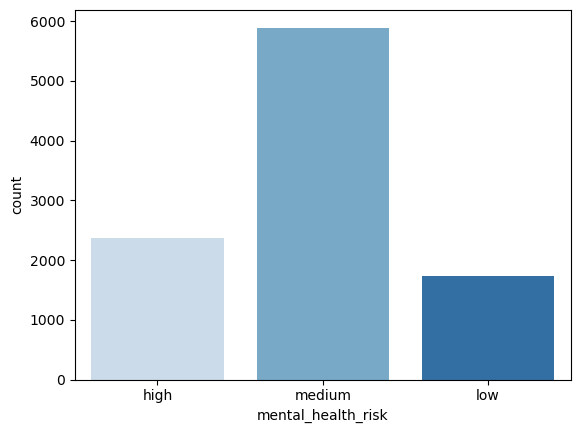

In [15]:

# plotiing class distribution for the target variable
# count plot
import seaborn as sns
sns.countplot(x='mental_health_risk', data=df, palette="Blues")



Observation:

target variable has three classes: High, Medium, Low
here we can see that medium risk has the most count among all the classes, high and low have frequency difference somewhere around 600.

Data Visualization

In [16]:
# Creating two seperate lists for numerical and categorical columns
num_df= df.select_dtypes(include=[int,float]).columns.to_list()
cat_df= df.select_dtypes(include=[object]).columns.to_list()

In [17]:
print(num_df)
print()
print(cat_df)

['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']

['gender', 'employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment', 'mental_health_risk']


In [18]:
# checking for skewness of the data
df.skew(numeric_only=True)

age                      -0.002027
stress_level             -0.019861
sleep_hours              -0.001903
physical_activity_days   -0.003336
depression_score          0.001152
anxiety_score            -0.023548
social_support_score     -0.004376
productivity_score       -0.079468
dtype: float64

Univariate Analysis
Univariate analysis focuses on analyzing each feature in the dataset independently.

Distribution analysis: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

Identifying potential issues: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:
Normal Distribution: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

Skewed Distribution: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

Bimodal Distribution: A distribution with two peaks or modes.

Uniform Distribution: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

Dispersion is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.
There are several measures of dispersion, including:

Range: The difference between the largest and smallest values in a data set.

Variance: The average of the squared deviations of each value from the mean of the data set.

Standard Deviation: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

Interquartile range (IQR): The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

Distribution of the data

Univariate analysis of numerical columns

Box Plot


age                          Axes(0.125,0.786098;0.168478x0.0939024)
stress_level              Axes(0.327174,0.786098;0.168478x0.0939024)
sleep_hours               Axes(0.529348,0.786098;0.168478x0.0939024)
physical_activity_days    Axes(0.731522,0.786098;0.168478x0.0939024)
depression_score             Axes(0.125,0.673415;0.168478x0.0939024)
anxiety_score             Axes(0.327174,0.673415;0.168478x0.0939024)
social_support_score      Axes(0.529348,0.673415;0.168478x0.0939024)
productivity_score        Axes(0.731522,0.673415;0.168478x0.0939024)
dtype: object

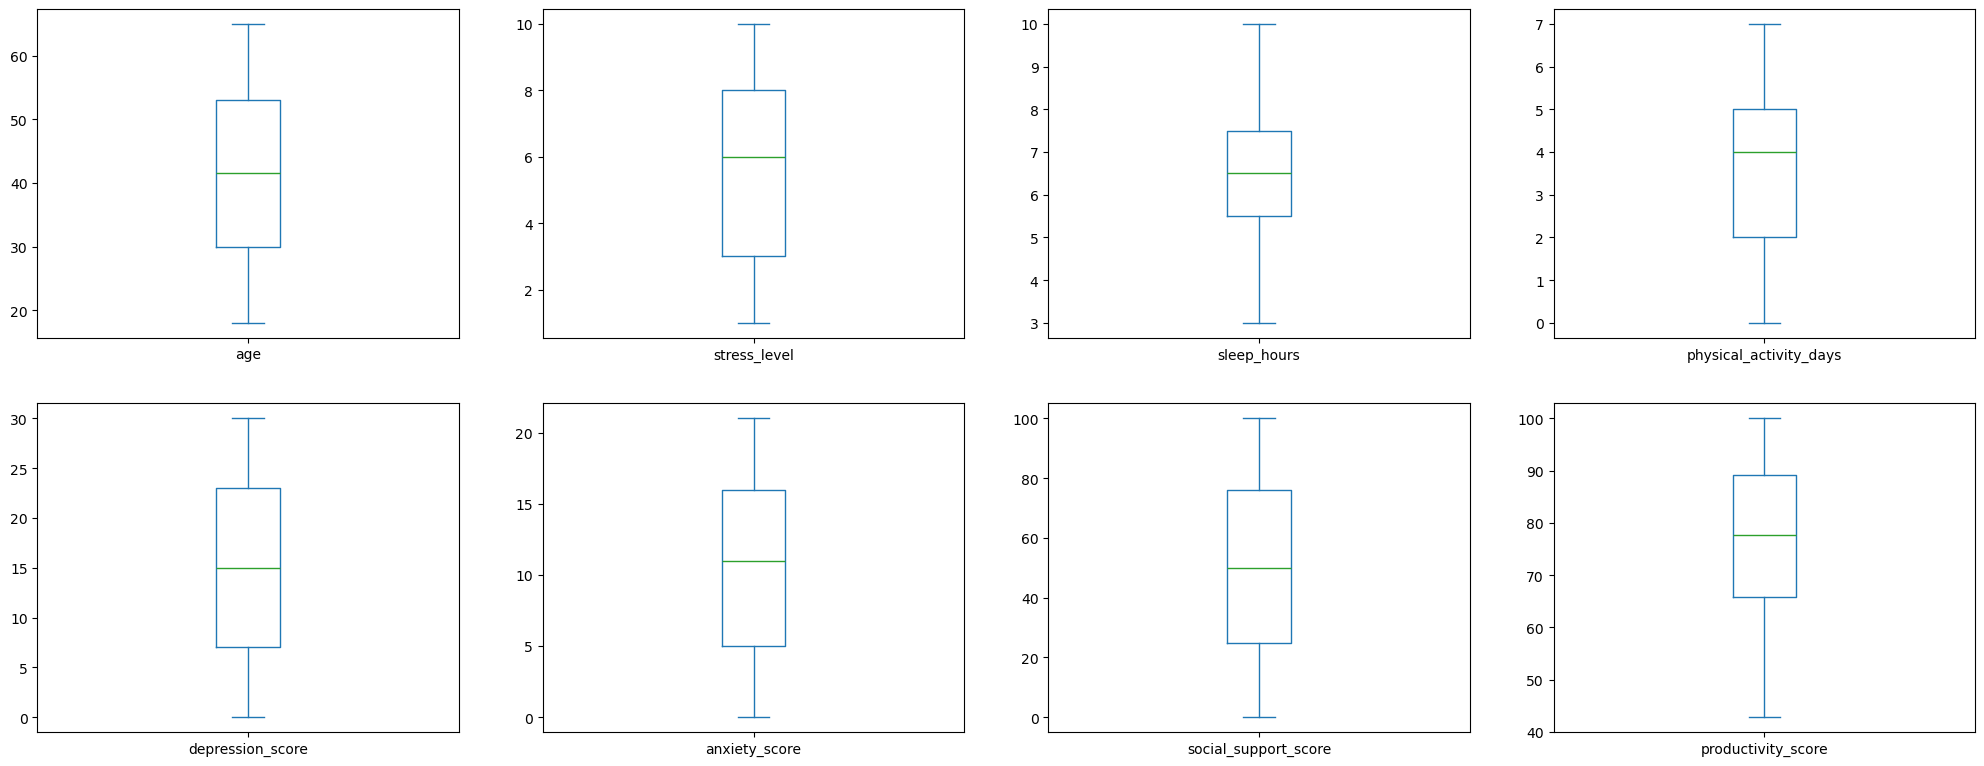

In [19]:
df[num_df].plot(kind="box", subplots=True, figsize=(25,35), layout= (7,4))

Observation:
There are no outliers present in our dataset

Histogram

In [15]:
num_df

['age',
 'stress_level',
 'sleep_hours',
 'physical_activity_days',
 'depression_score',
 'anxiety_score',
 'social_support_score',
 'productivity_score']

In [20]:

# collect each column from the list of num_df

age= num_df[0]
stress_level= num_df[1]
sleep_hours= num_df[2]
physical_activity_days= num_df[3]
depression_score= num_df[4]
anxiety_score= num_df[5]
social_support_score= num_df[6]
productivity_score= num_df[7]

In [21]:

# function to plot histogram 
def plot_histogram(df,column):
    plt.figure(figsize= (4,5))
    sns.histplot(data=df[column], bins=5, stat= "percent", color= "#9467bd")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.tight_layout()

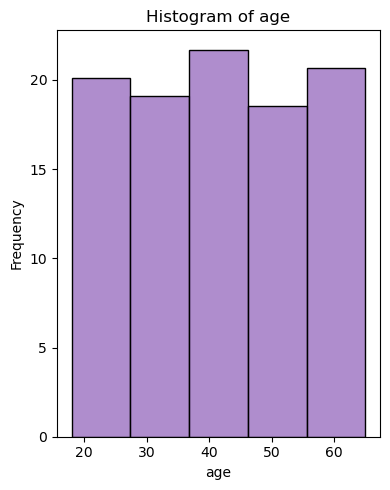

In [22]:
plot_histogram(df, age)

observation:

the persons has 42 to 64 age has the highest frequency in the datset
youngers has nearly same frequncy as comapred to mid age
50's aged persons has less frerquency comparitvely all ages

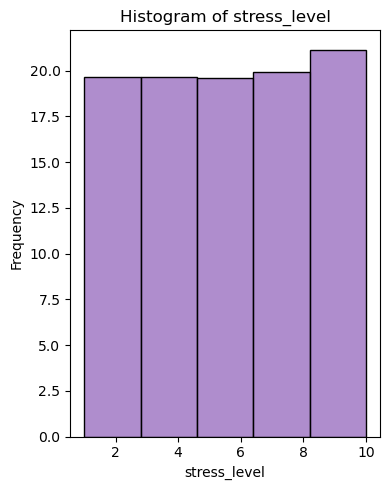

In [23]:
plot_histogram(df, stress_level)


observation:

on the scale of 10, 2 to 4 has same frequency
9-10 has the highsest frequency as comapred to other range
and >4<6 has the medium frequency

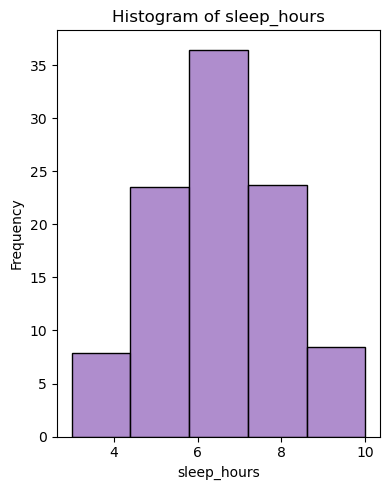

In [24]:

plot_histogram(df,sleep_hours)


observation:

6 to 8 sleep hours has the highest frequency
4 and 10 has the lowest while 5-6 has medium frequency

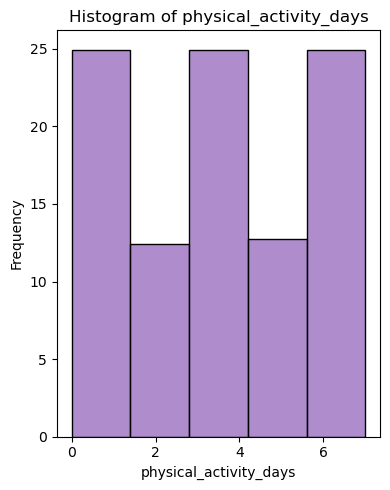

In [25]:

plot_histogram(df,physical_activity_days)

observation:

0-1, 3-2, 6 range has the highest frequency for physcial activity
so we can see, people prefers taking gap of one day to stay physically active

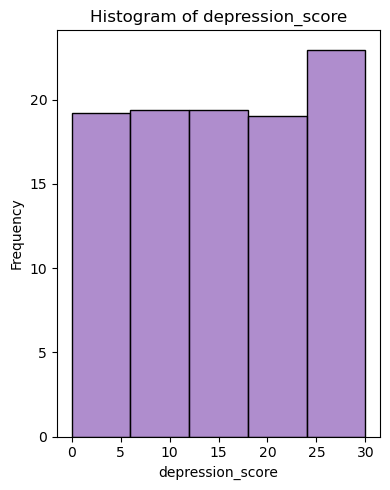

In [26]:
plot_histogram(df,depression_score)


observation:

approx 24-30 is the high range of depression
0-5 and 20-24 has the same level of depression frequency

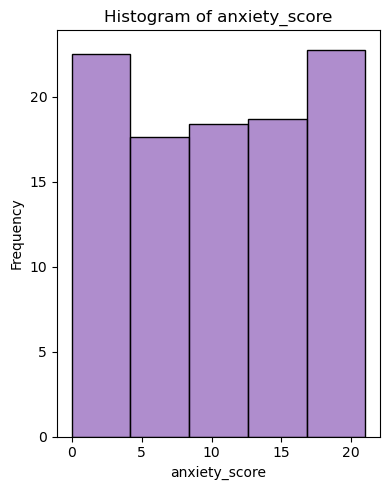

In [27]:
plot_histogram(df,anxiety_score)

observation:

0-5 and 17-20 has the highest, 10-15 nearly same frequency for anxiety score

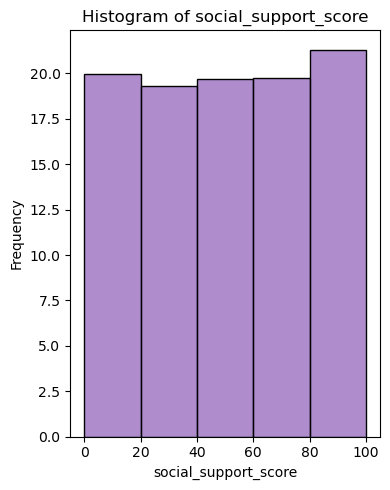

In [28]:

plot_histogram(df,social_support_score)

Observation:

80-100 has the highest frequncy here
40-80 range has nearly same frequency
20-40 has less comparitavely (but now low)

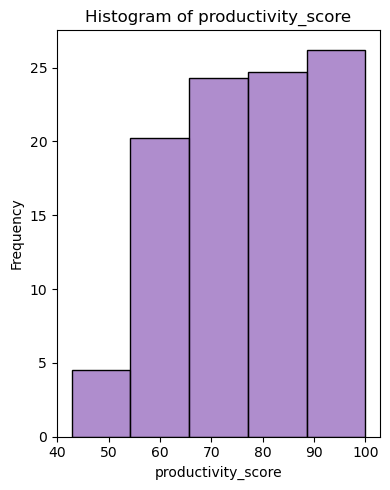

In [29]:

plot_histogram(df,productivity_score)

observation:

here we can see it's frequency increases as the range for productivity score increases


Univariate Analysis On Categorical Columns

In [30]:
cat_df

['gender',
 'employment_status',
 'work_environment',
 'mental_health_history',
 'seeks_treatment',
 'mental_health_risk']

In [31]:
# collect each column from the list of cat_df

gender= cat_df[0]
employment_status= cat_df[1]
work_environment= cat_df[2]
mental_health_history= cat_df[3]
seeks_treatment= cat_df[4]
mental_health_risk= cat_df[5]

In [32]:
def plot_pie_chart(df,column):
    df[column].value_counts().plot.pie(
    autopct="%1.1f%%", 
    colors=sns.color_palette("Reds"))

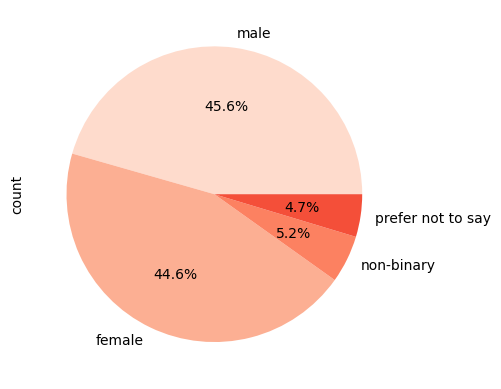

In [33]:
plot_pie_chart(df, gender)

Observation:

Here we can notice the count percentage of "male" and "female" are nearly same
"prefer not to say" and "non-binary" has very low count percenntage
we can say that engaement of male and females are more than other genders

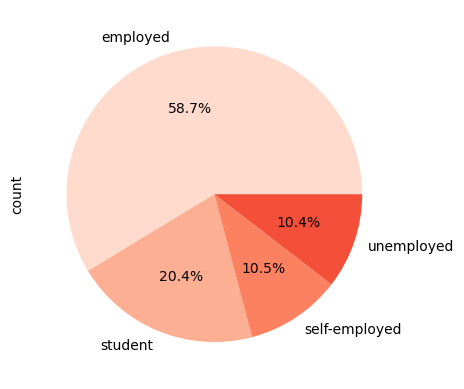

In [34]:
plot_pie_chart(df, employment_status)


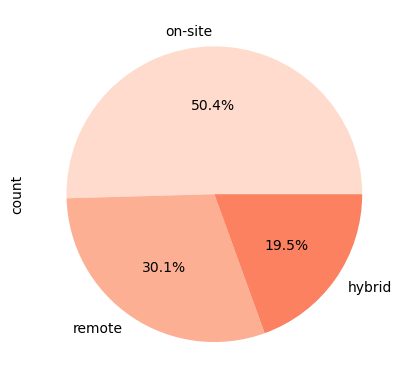

In [35]:
plot_pie_chart(df,work_environment)

observation:

here we can see more "On-site" employees has high percentage of count
remote has less than that and hybrid has the lowest amongst all

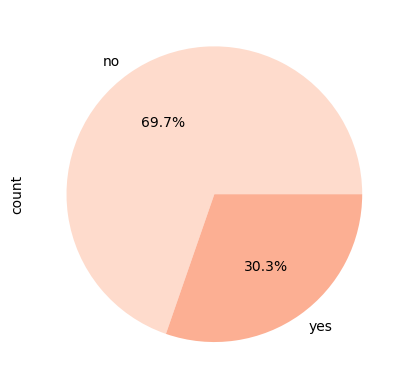

In [36]:

plot_pie_chart(df,mental_health_history)


observation:

here we can notice that 69.7% denotes "no" and 30.3% dentotes "yes" for historical data
no categrory is more as comapred to yes

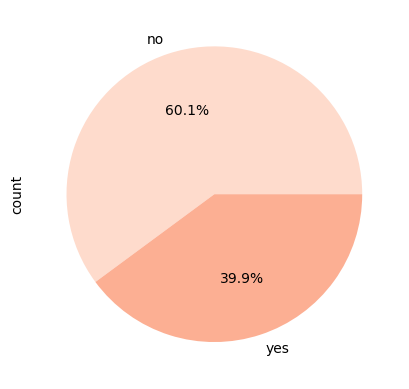

In [37]:
plot_pie_chart(df,seeks_treatment)

observation:

here we can notice that 60.1% denotes "no" and 39.9% dentotes "yes" for historical data
no categrory is more as comapred to yes

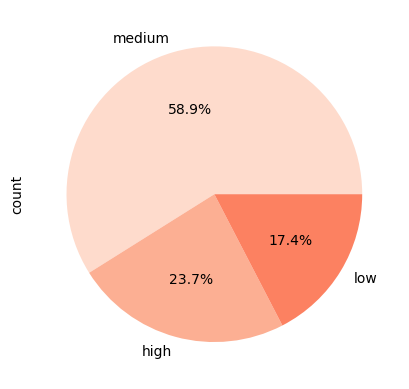

In [38]:

plot_pie_chart(df,mental_health_risk)


observation:

we can see the medium range has the highest percentage for mental health risk

Bivariate Analysis

Select 2 cols
Understand type of relationship
Numerical - Numerical
a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots
b. Check correlation coefficent to check linear relationship

Numerical - Categorical - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.
a. You can plot graphs like barplot, boxplot, kdeplot ,violinplot even scatterplots

Categorical - Categorical
a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.
b. You can plots like heatmap, stacked barplots, treemaps

Categorical vs Numerical

In [39]:
def cat_num(df , numerical_df , categorical_df):
    for num in numerical_df:
        plt.figure(figsize = (17,15))

        top10_categories = df[categorical_df].value_counts(ascending = False).index[:10]
        top10_df = df[df[categorical_df].isin(top10_categories)]
        #barplot
        plt.subplot(3,2,1)
        sns.barplot(data = top10_df , x = num , y = categorical_df, palette="Oranges")
        plt.title(f'Bar Plot of {num} vs {categorical_df}')
        
        #KDE Plot
        plt.subplot(3,2,2)
        sns.kdeplot(data = top10_df , x = num , hue = categorical_df, palette="magma")
        plt.title(f'KDE Plot of {num} vs {categorical_df}')

        #Scatter Plot
        plt.subplot(3,2,3)
        sns.scatterplot(data = top10_df , x = num , y = categorical_df,palette="Blues")
        plt.title(f'Scatter Plot of {num} vs {categorical_df}')

    
        plt.tight_layout()

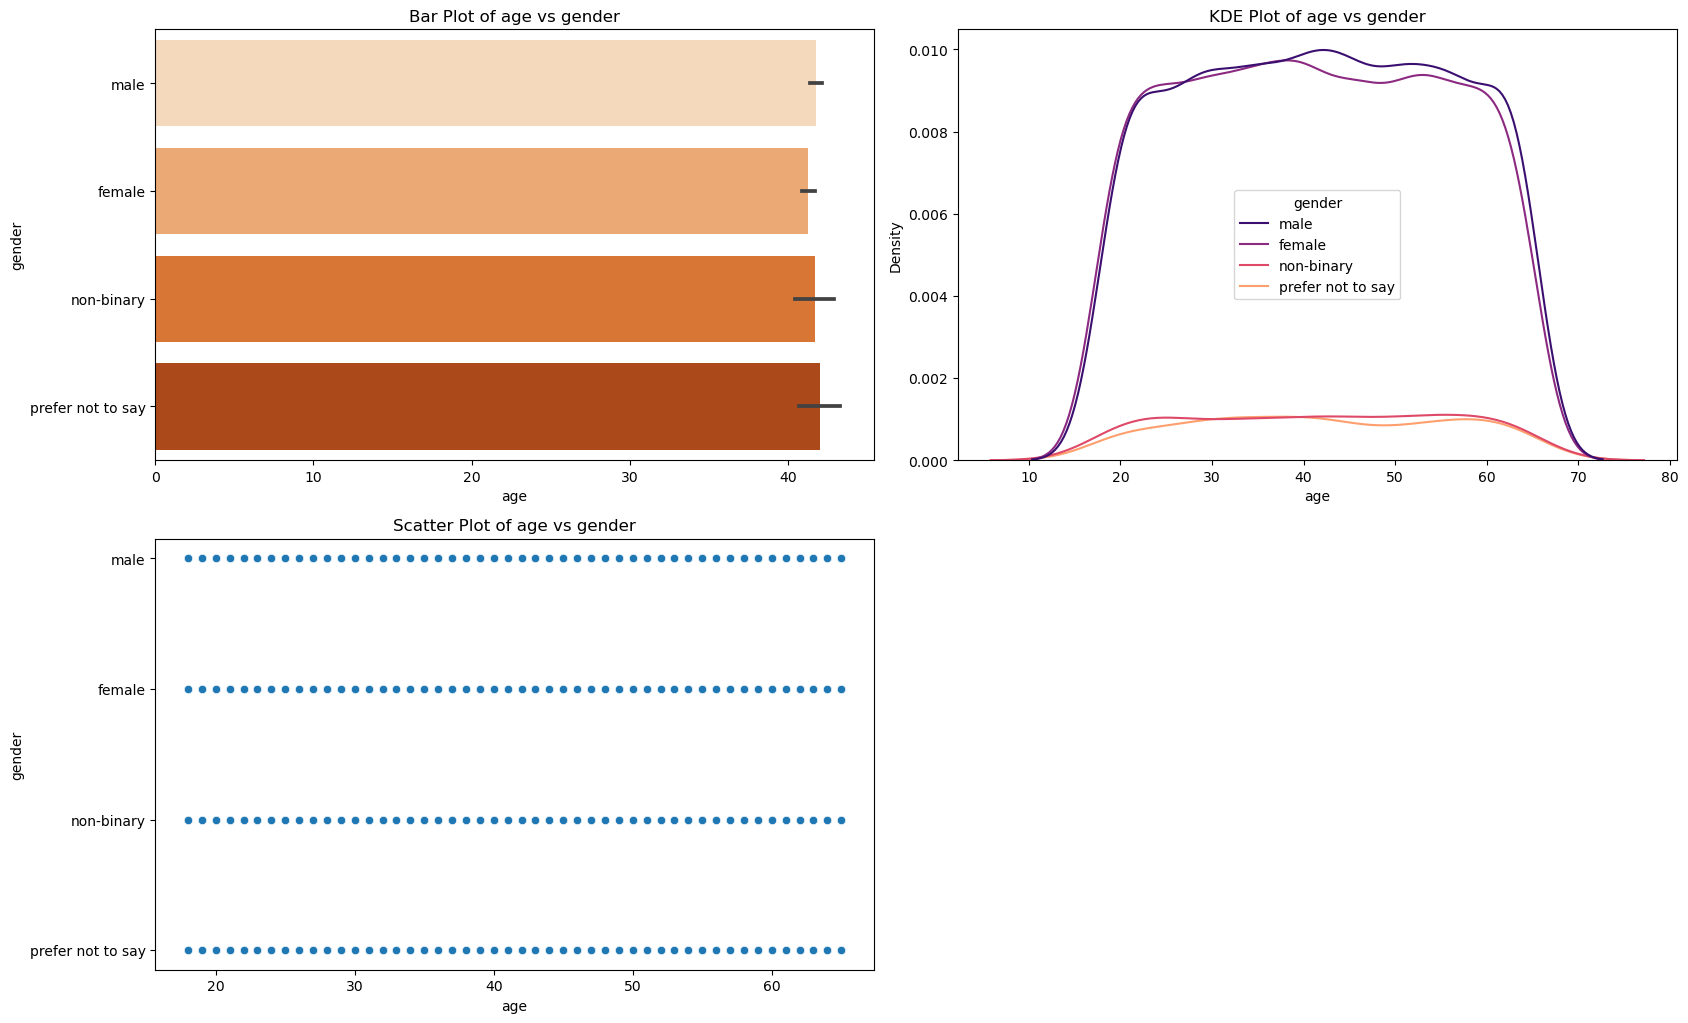

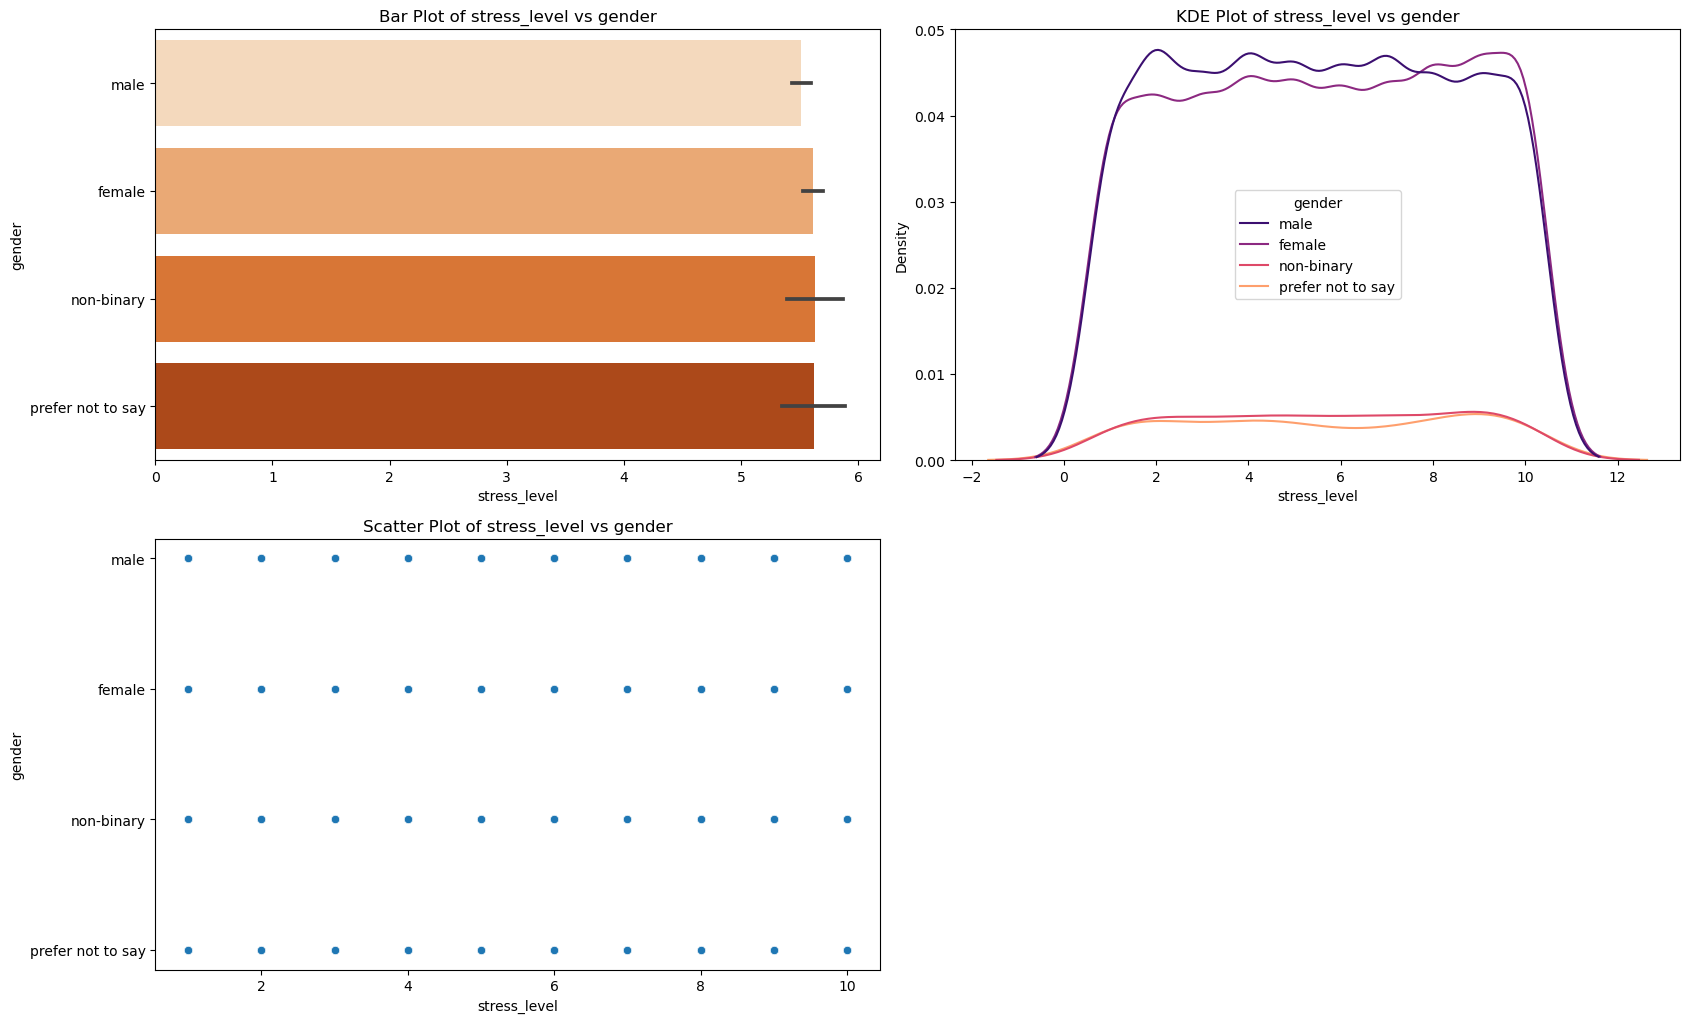

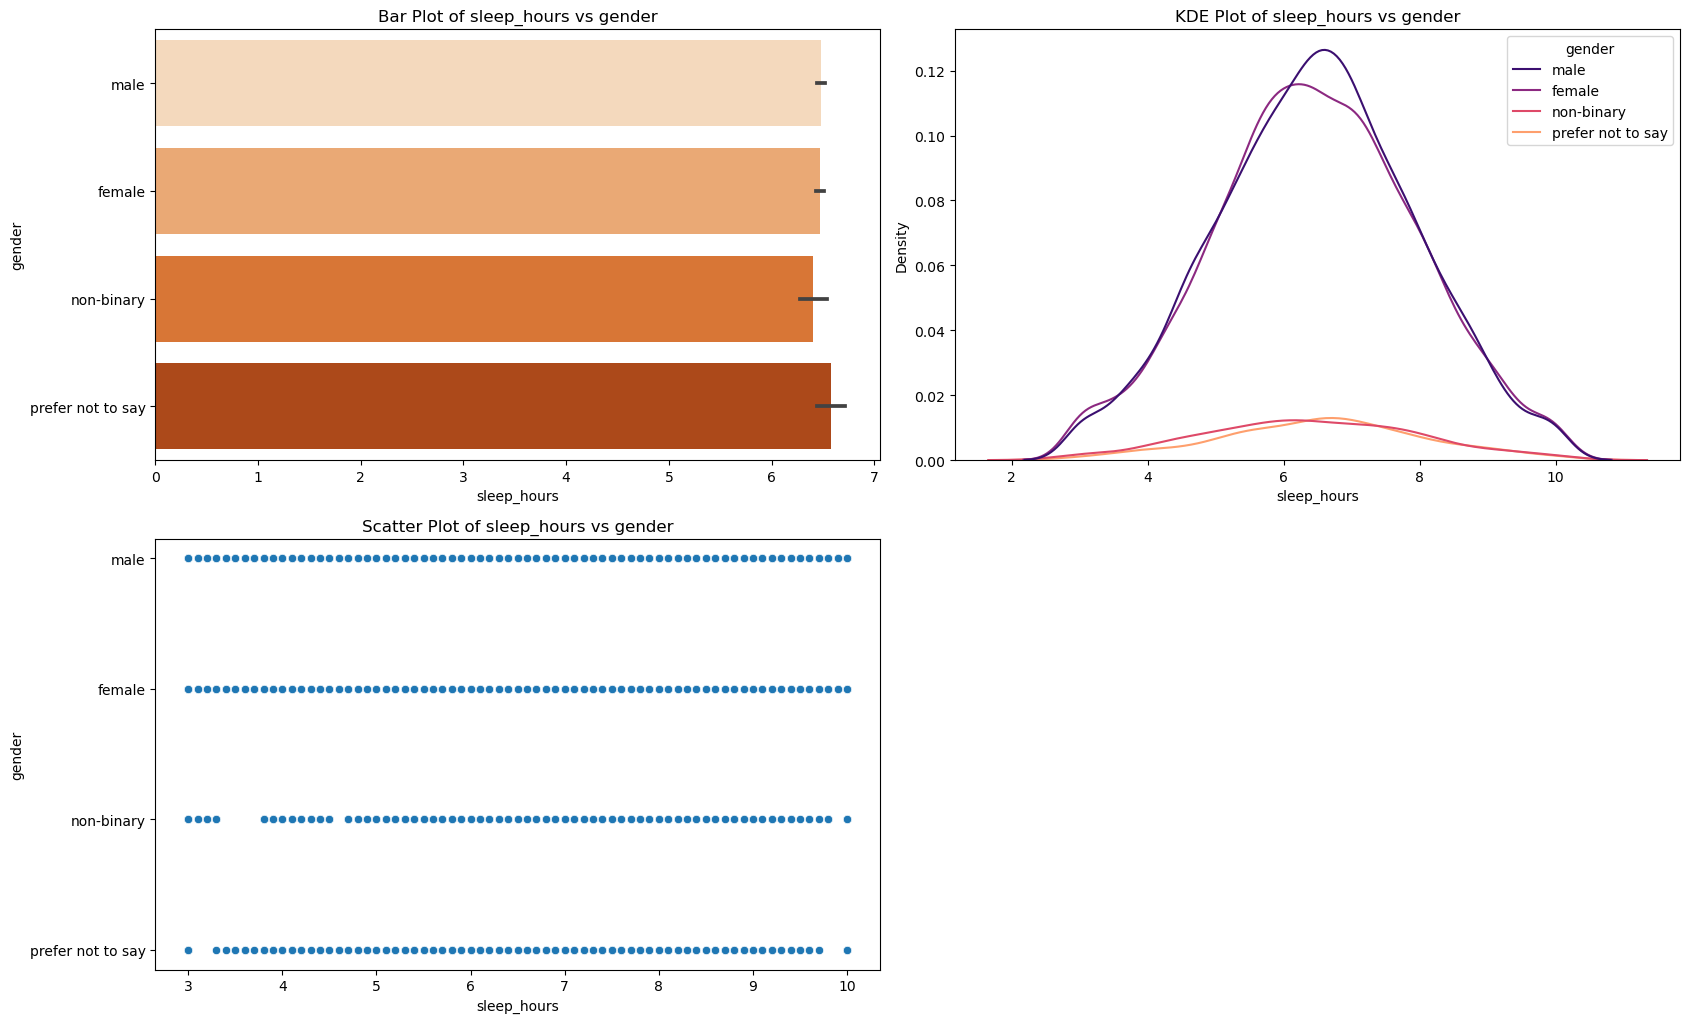

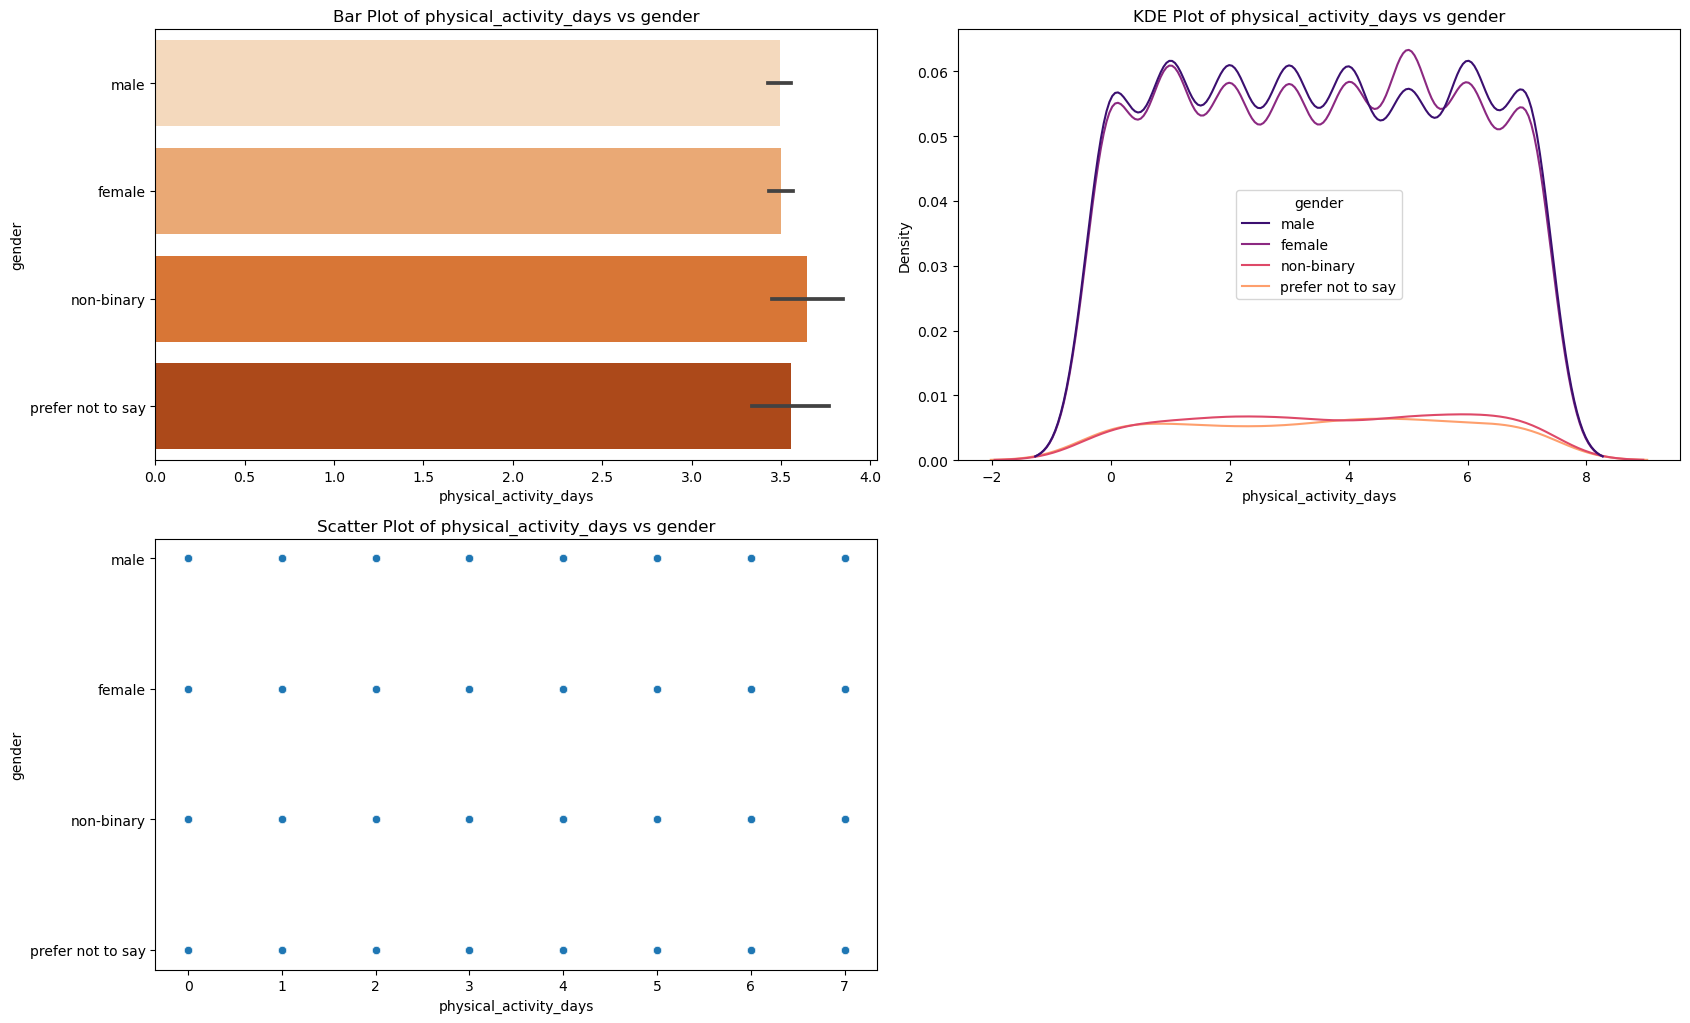

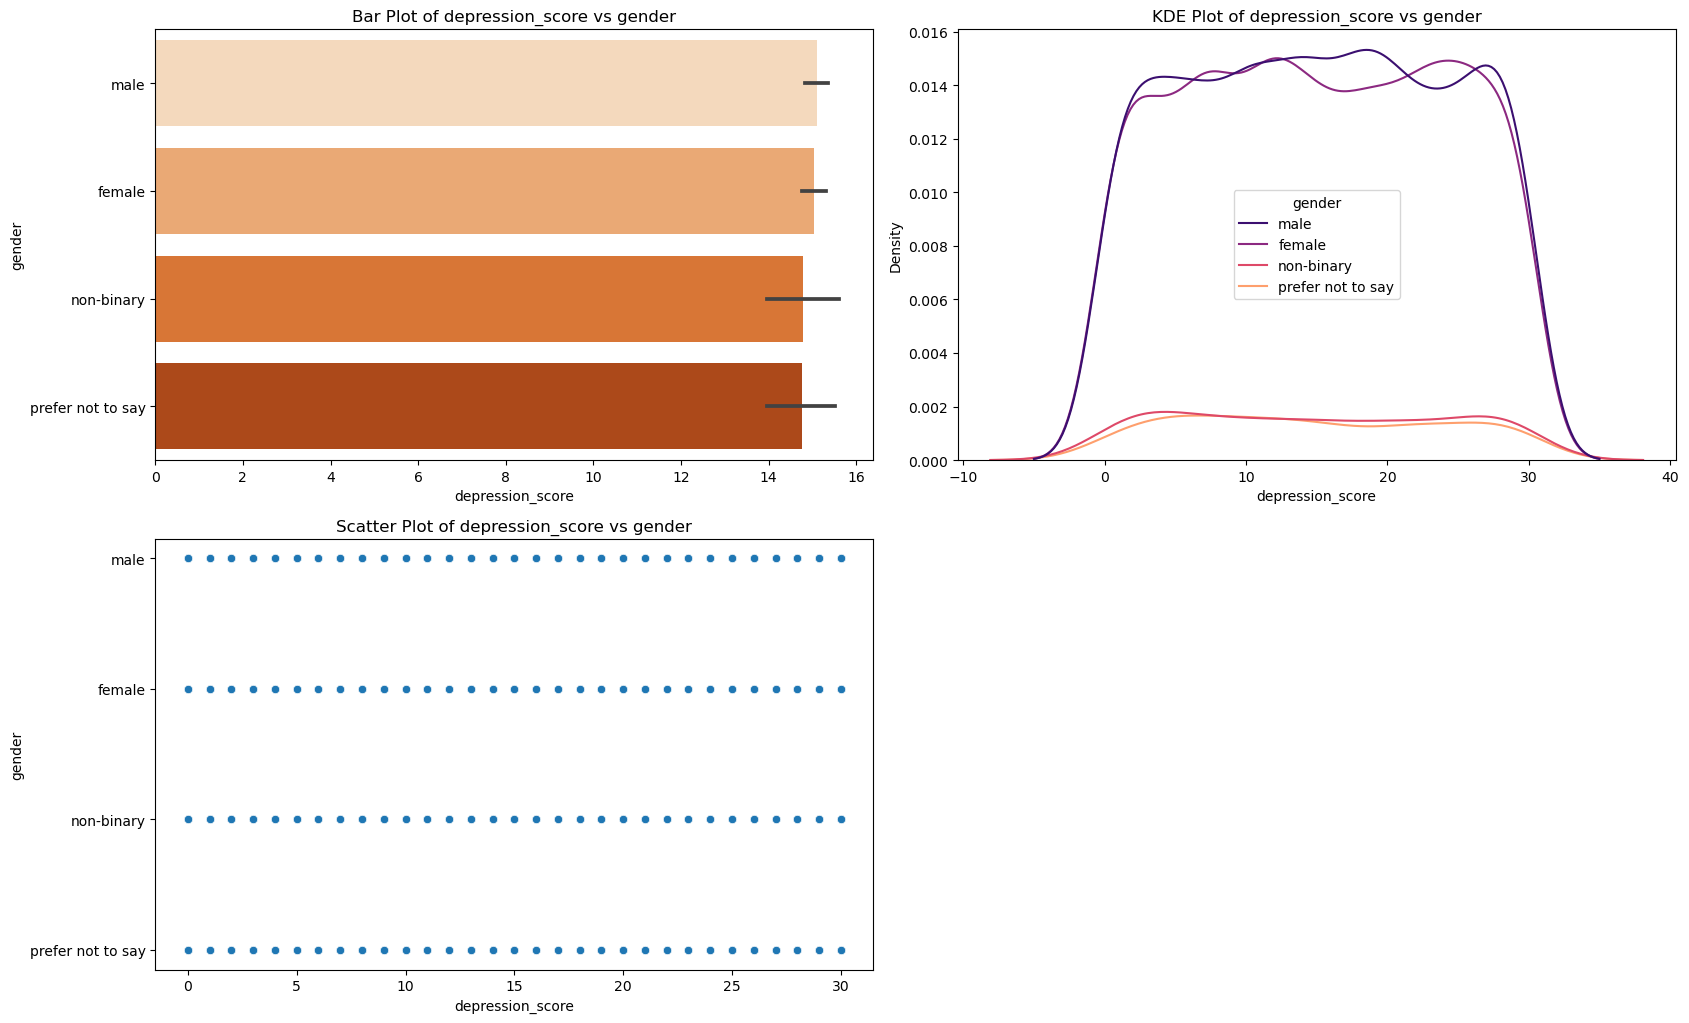

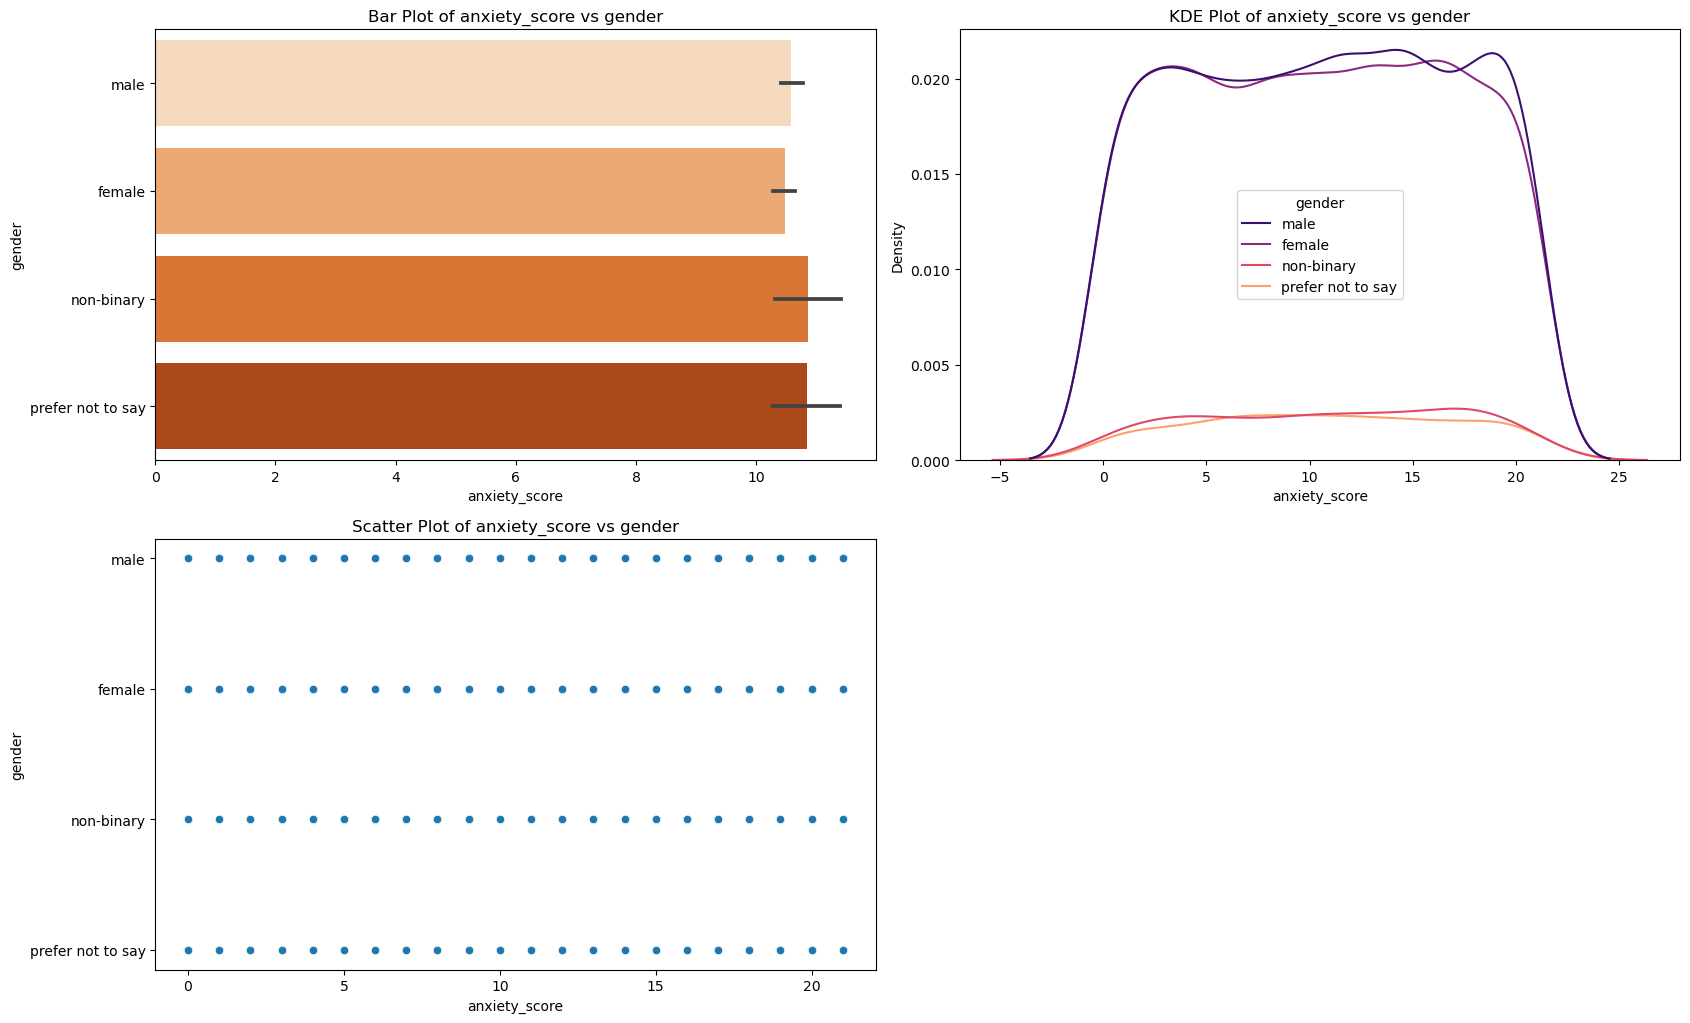

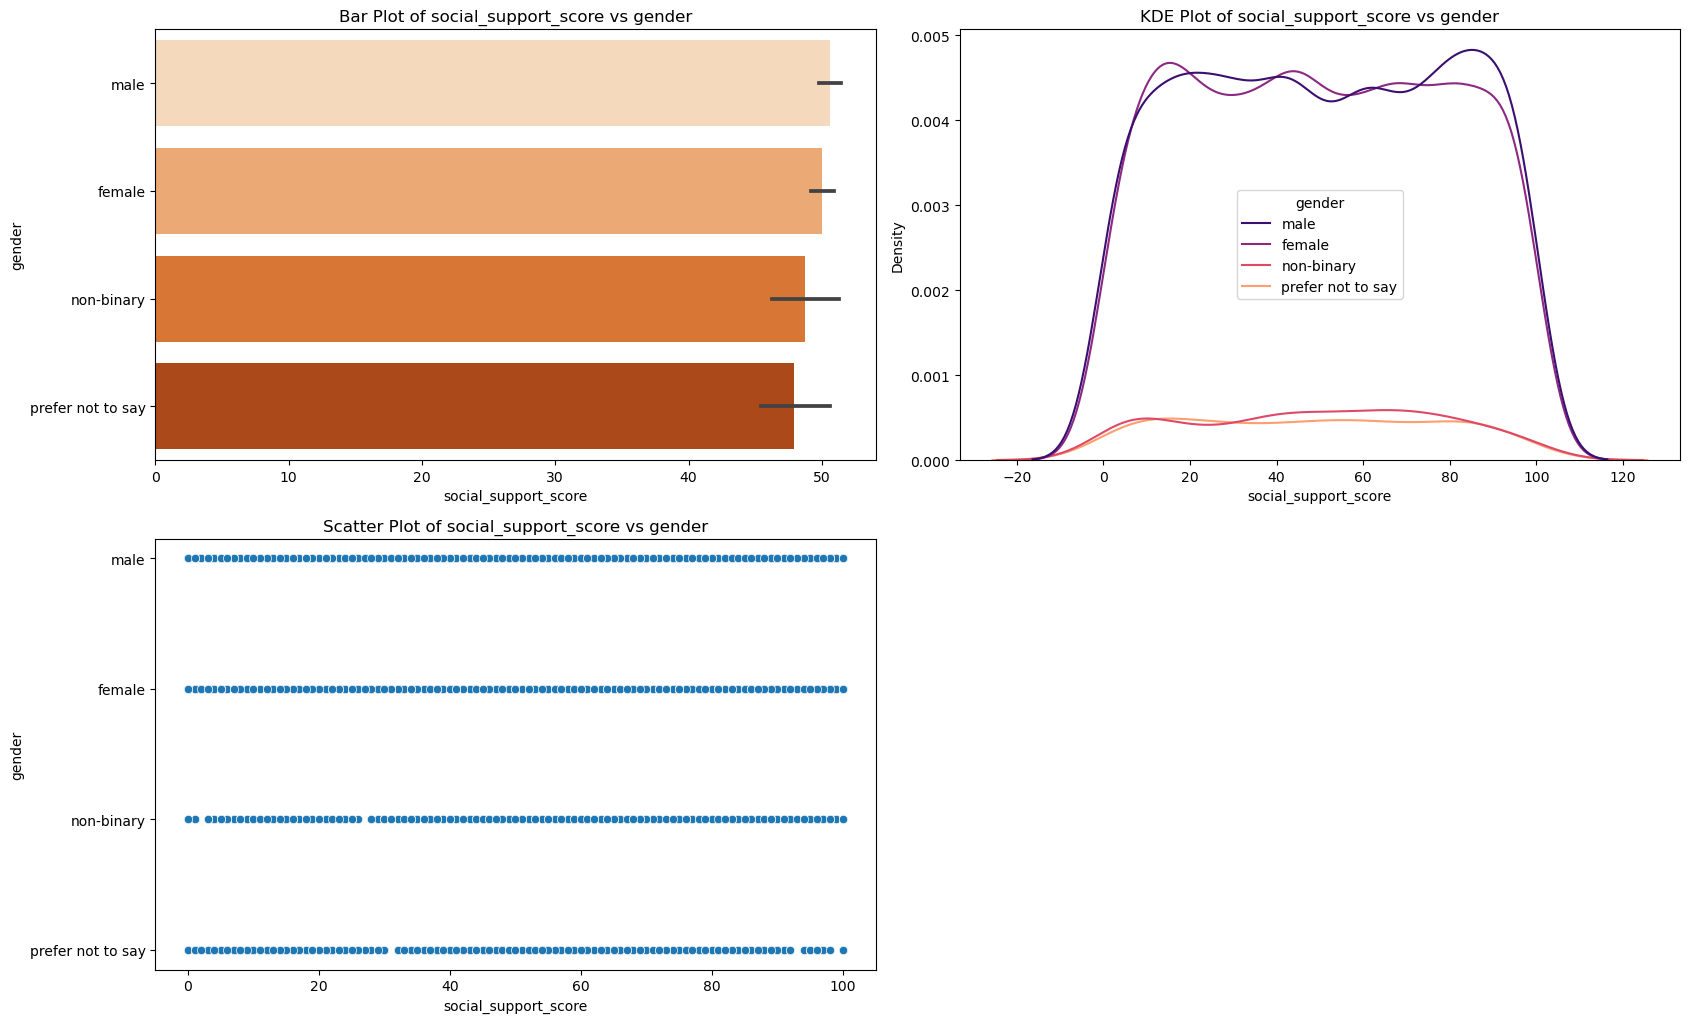

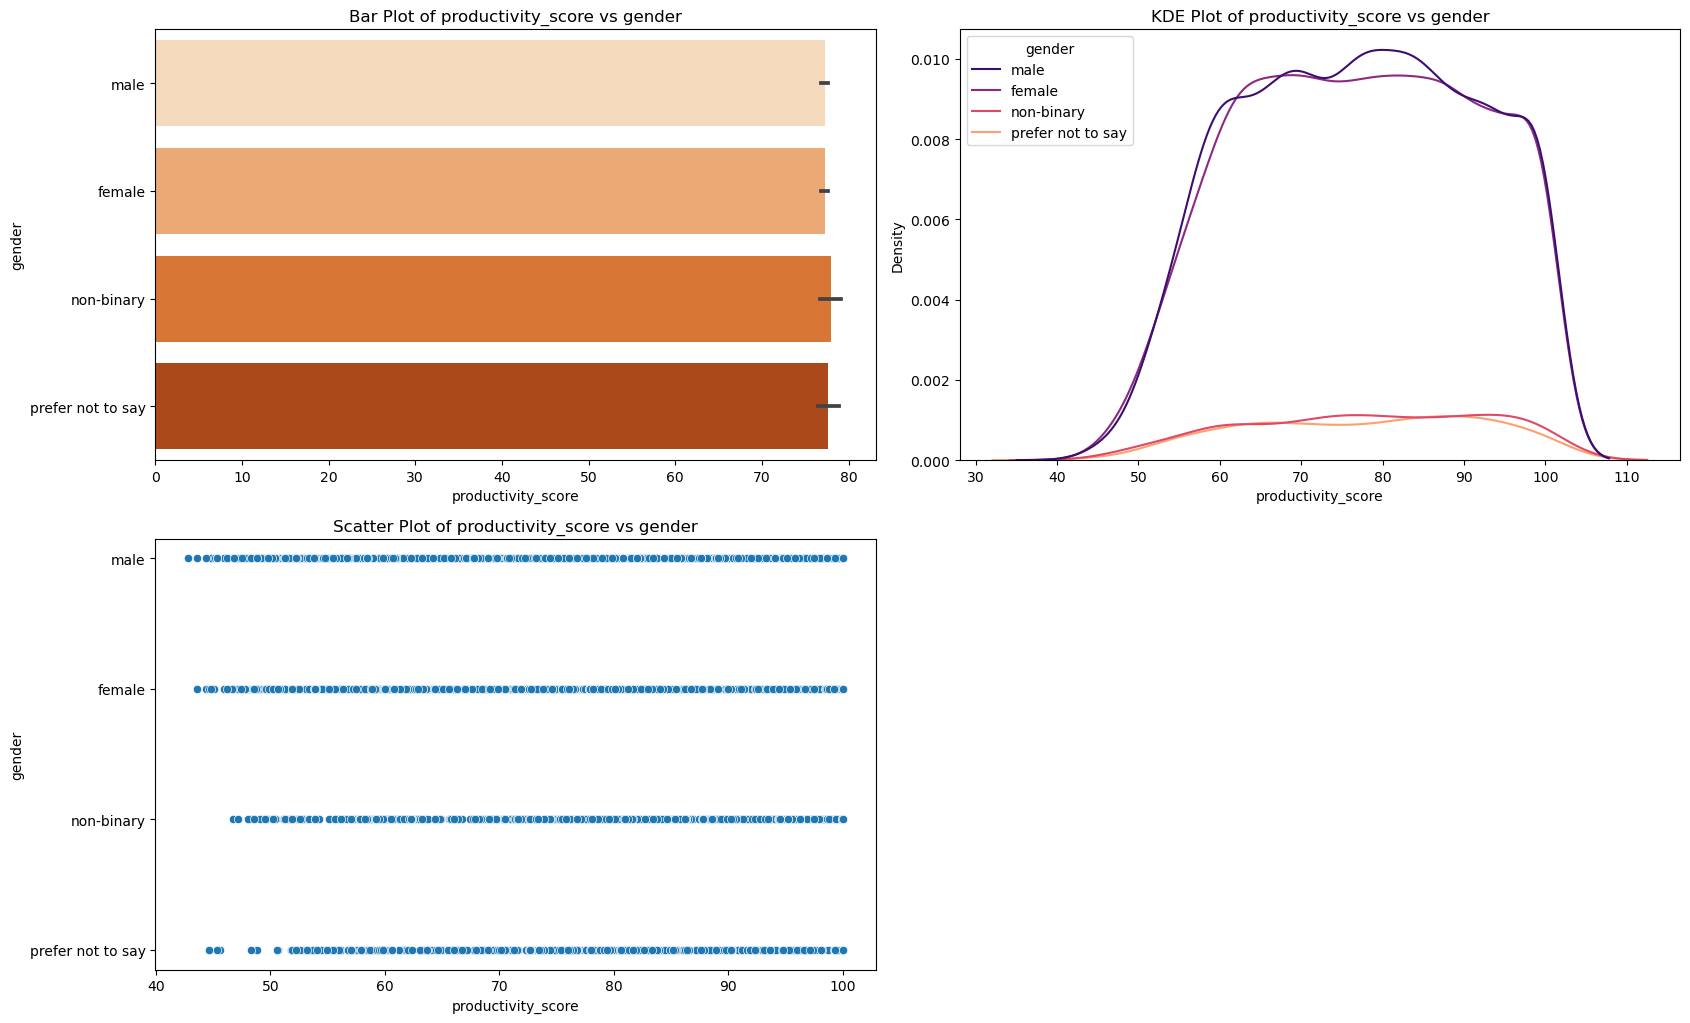

In [40]:
cat_num(df,num_df, "gender")

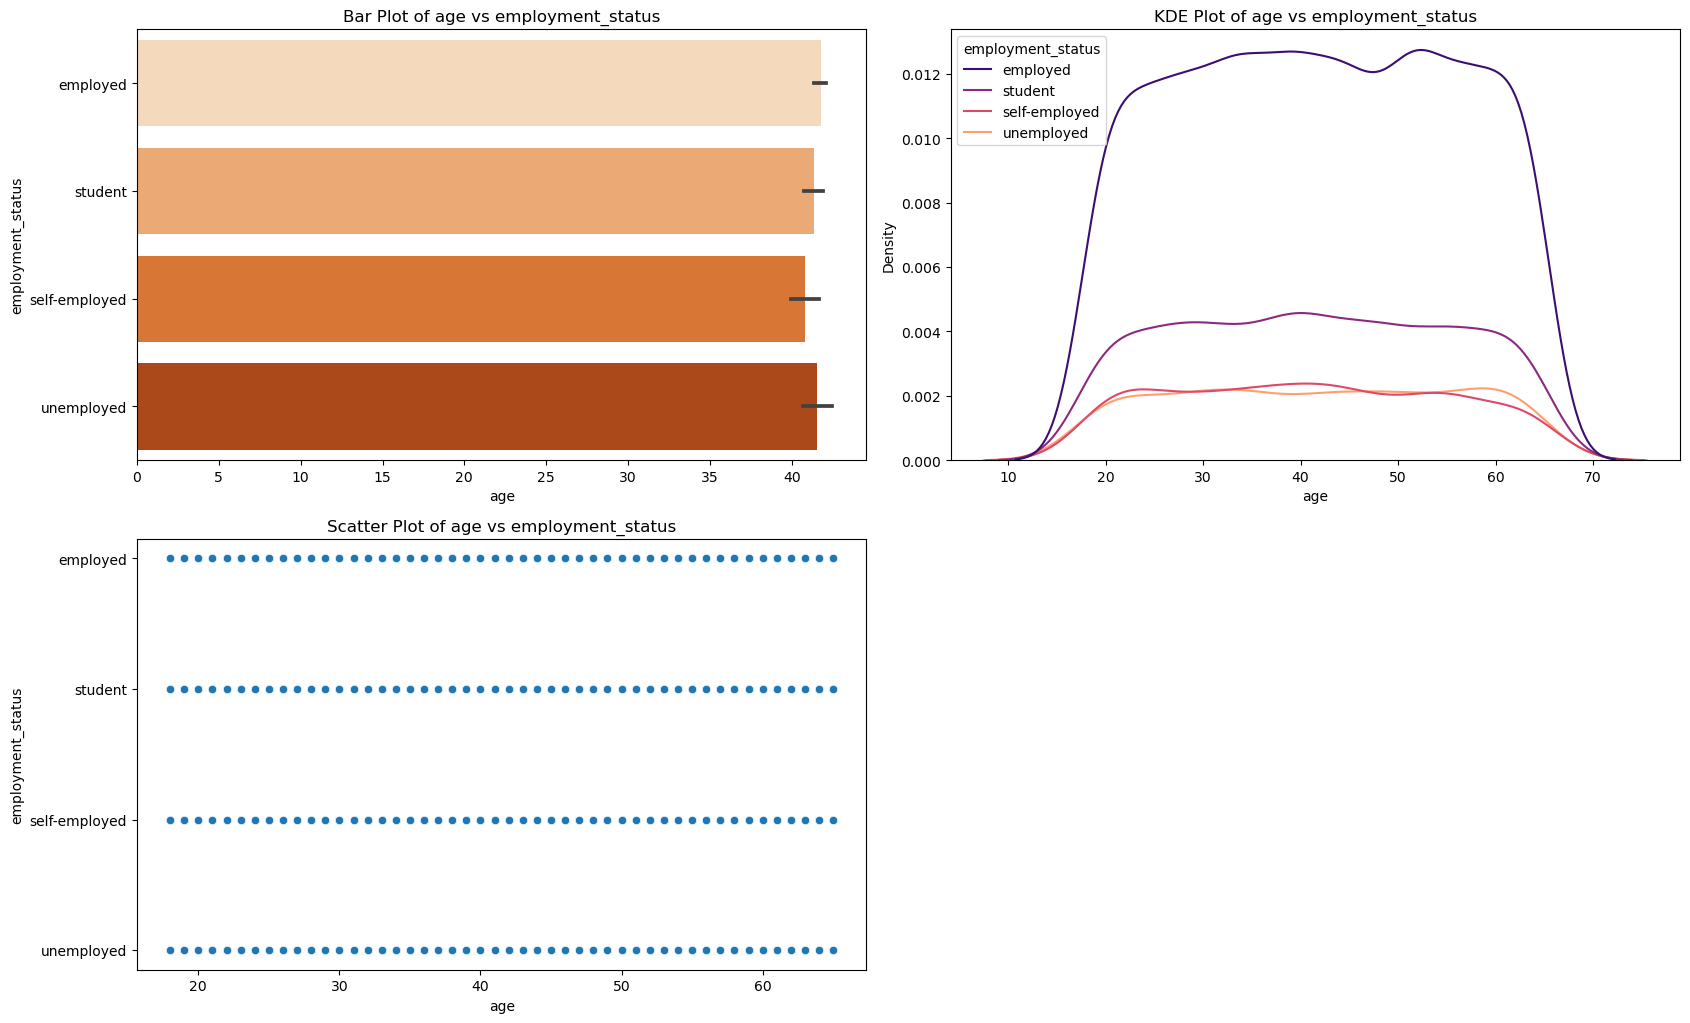

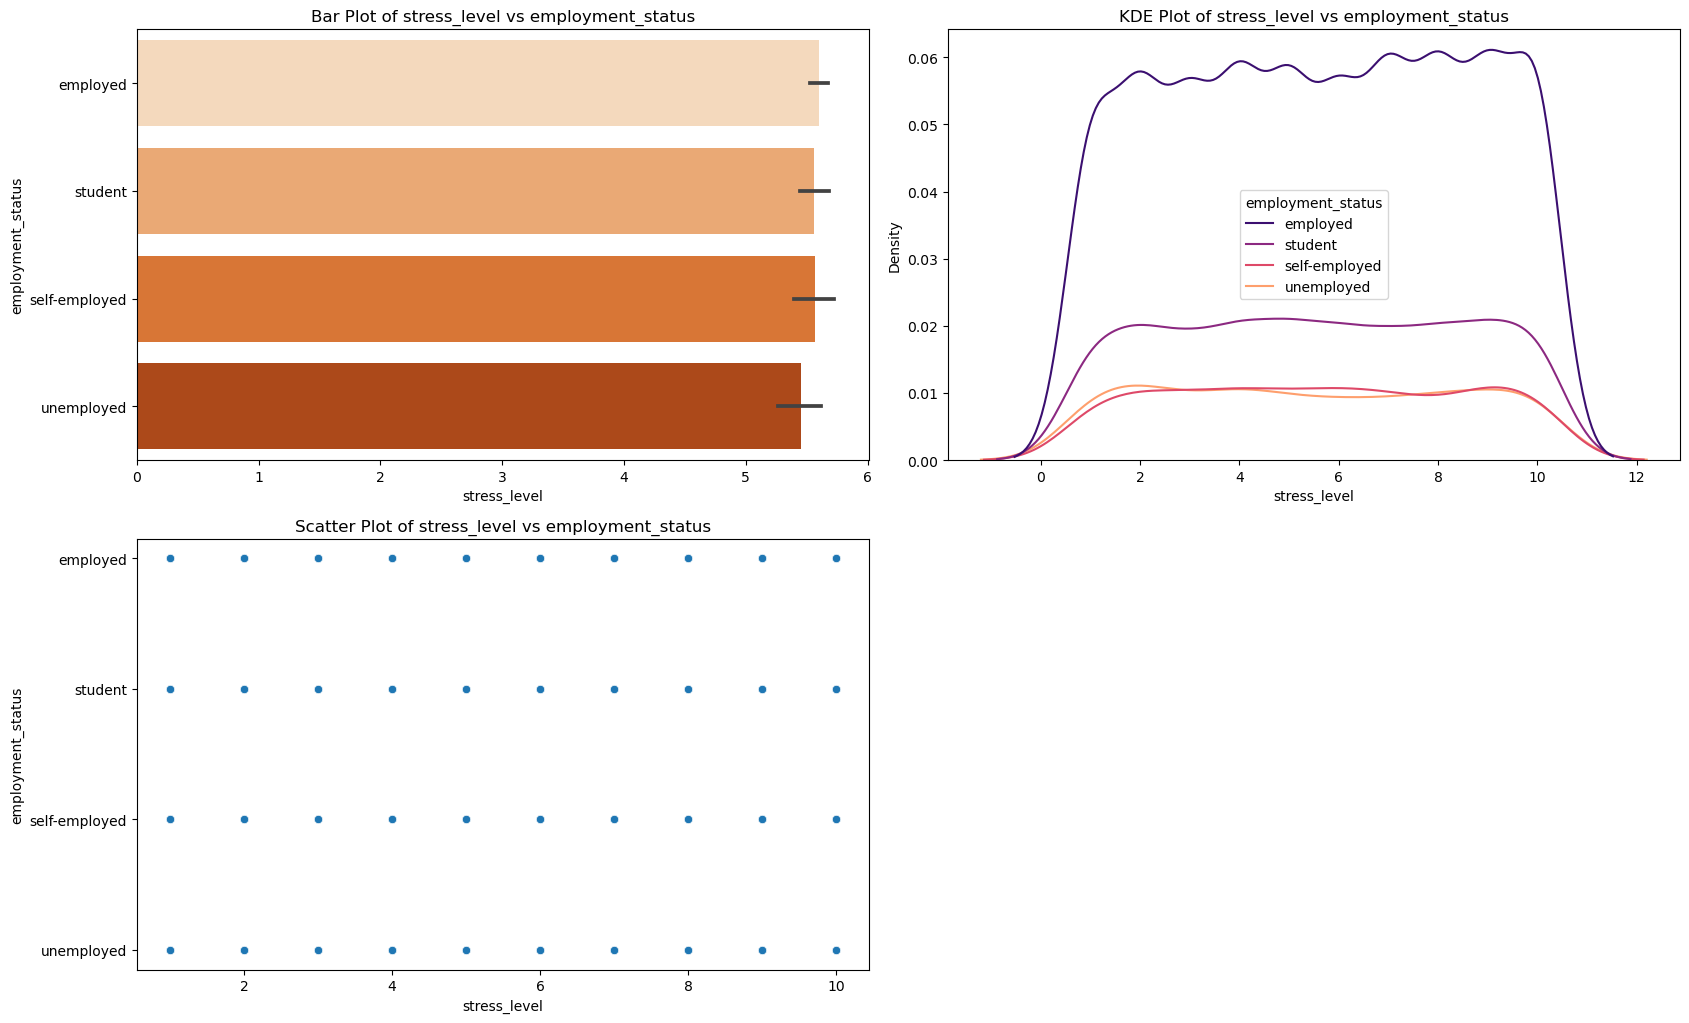

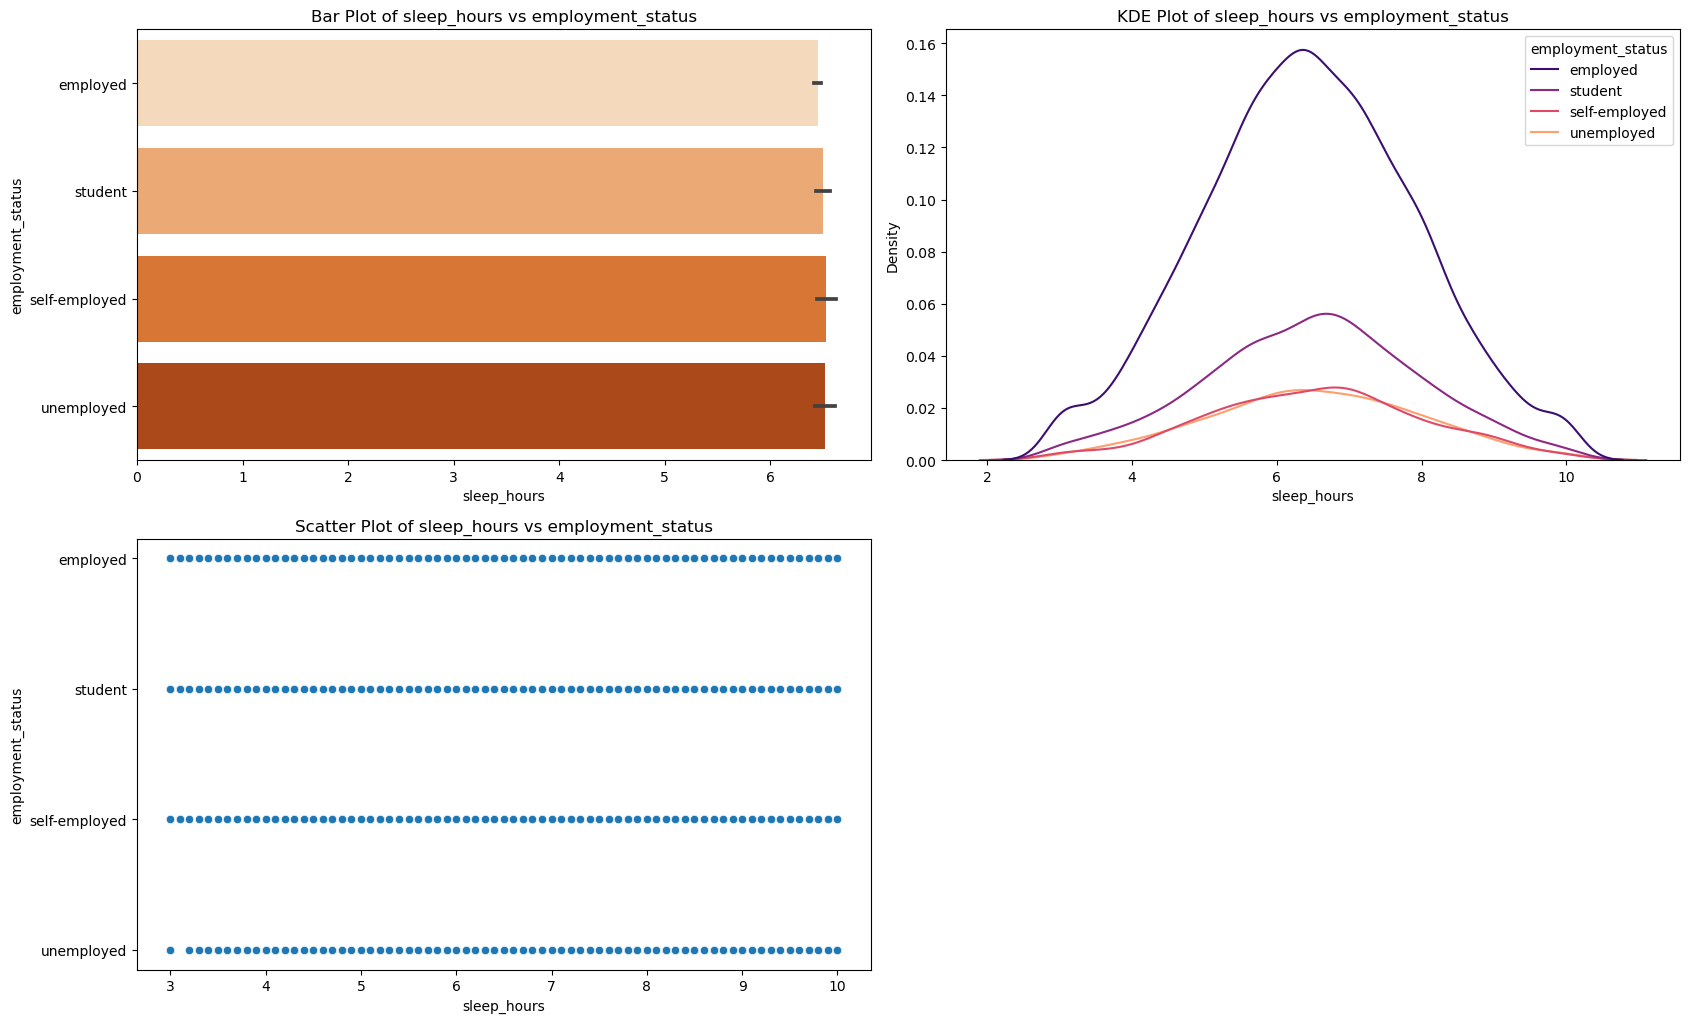

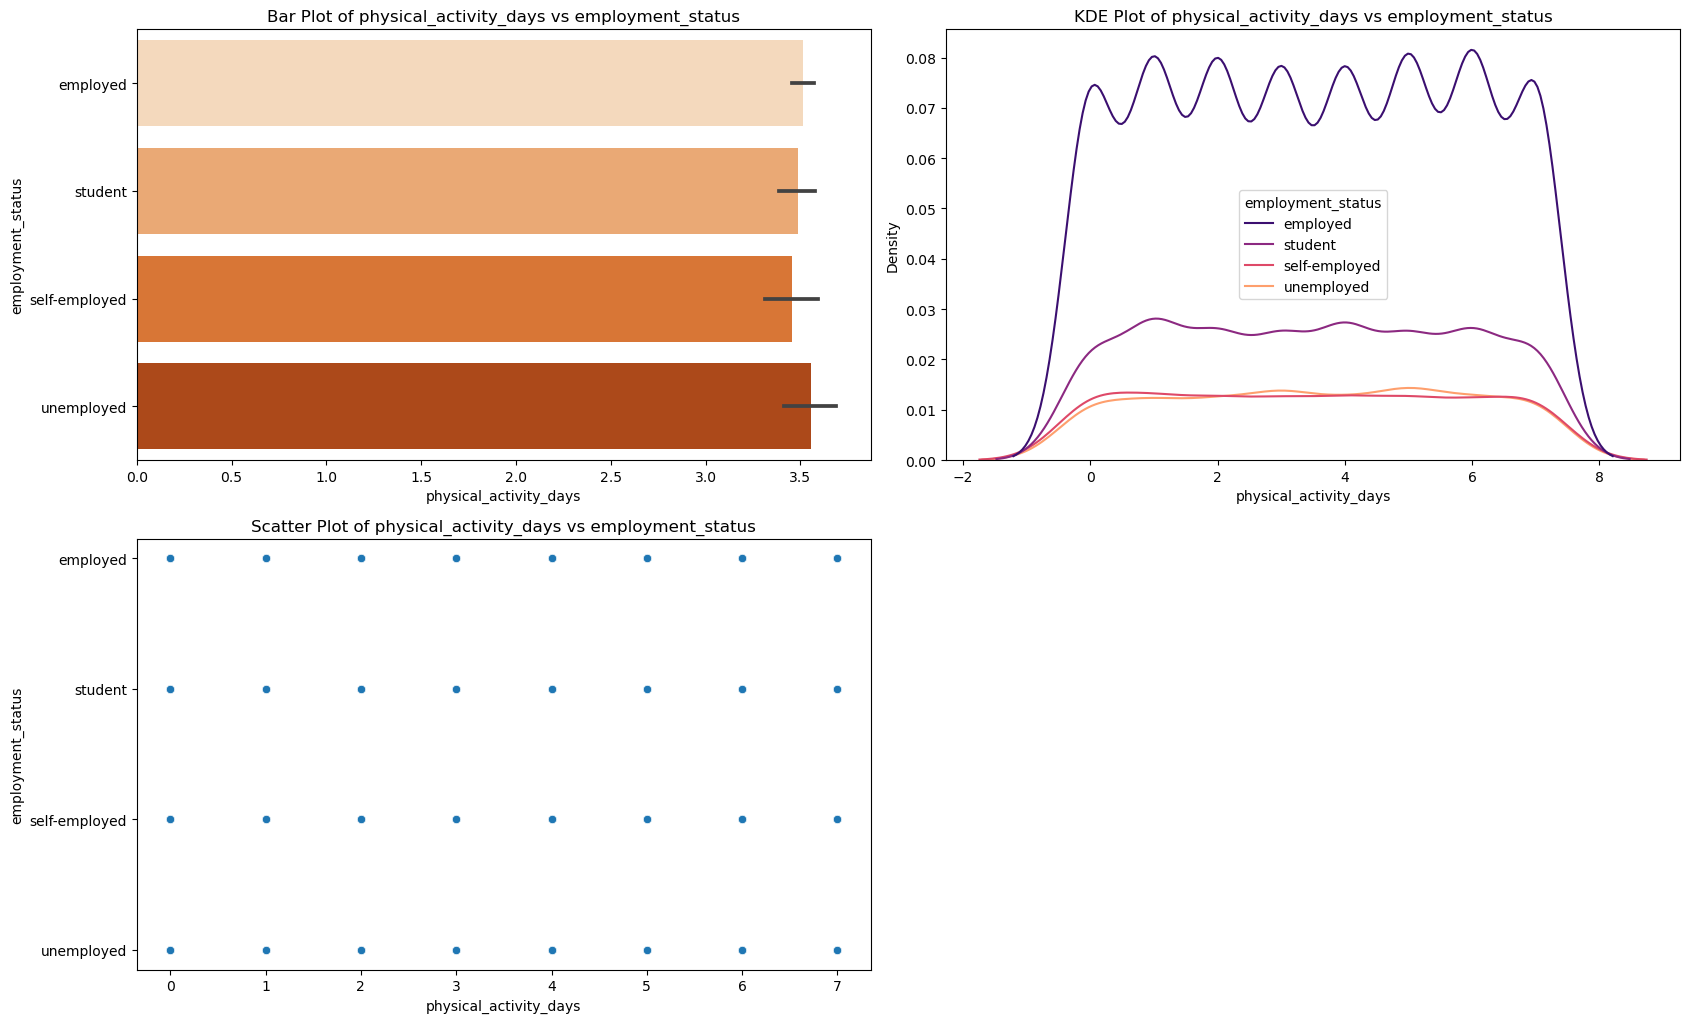

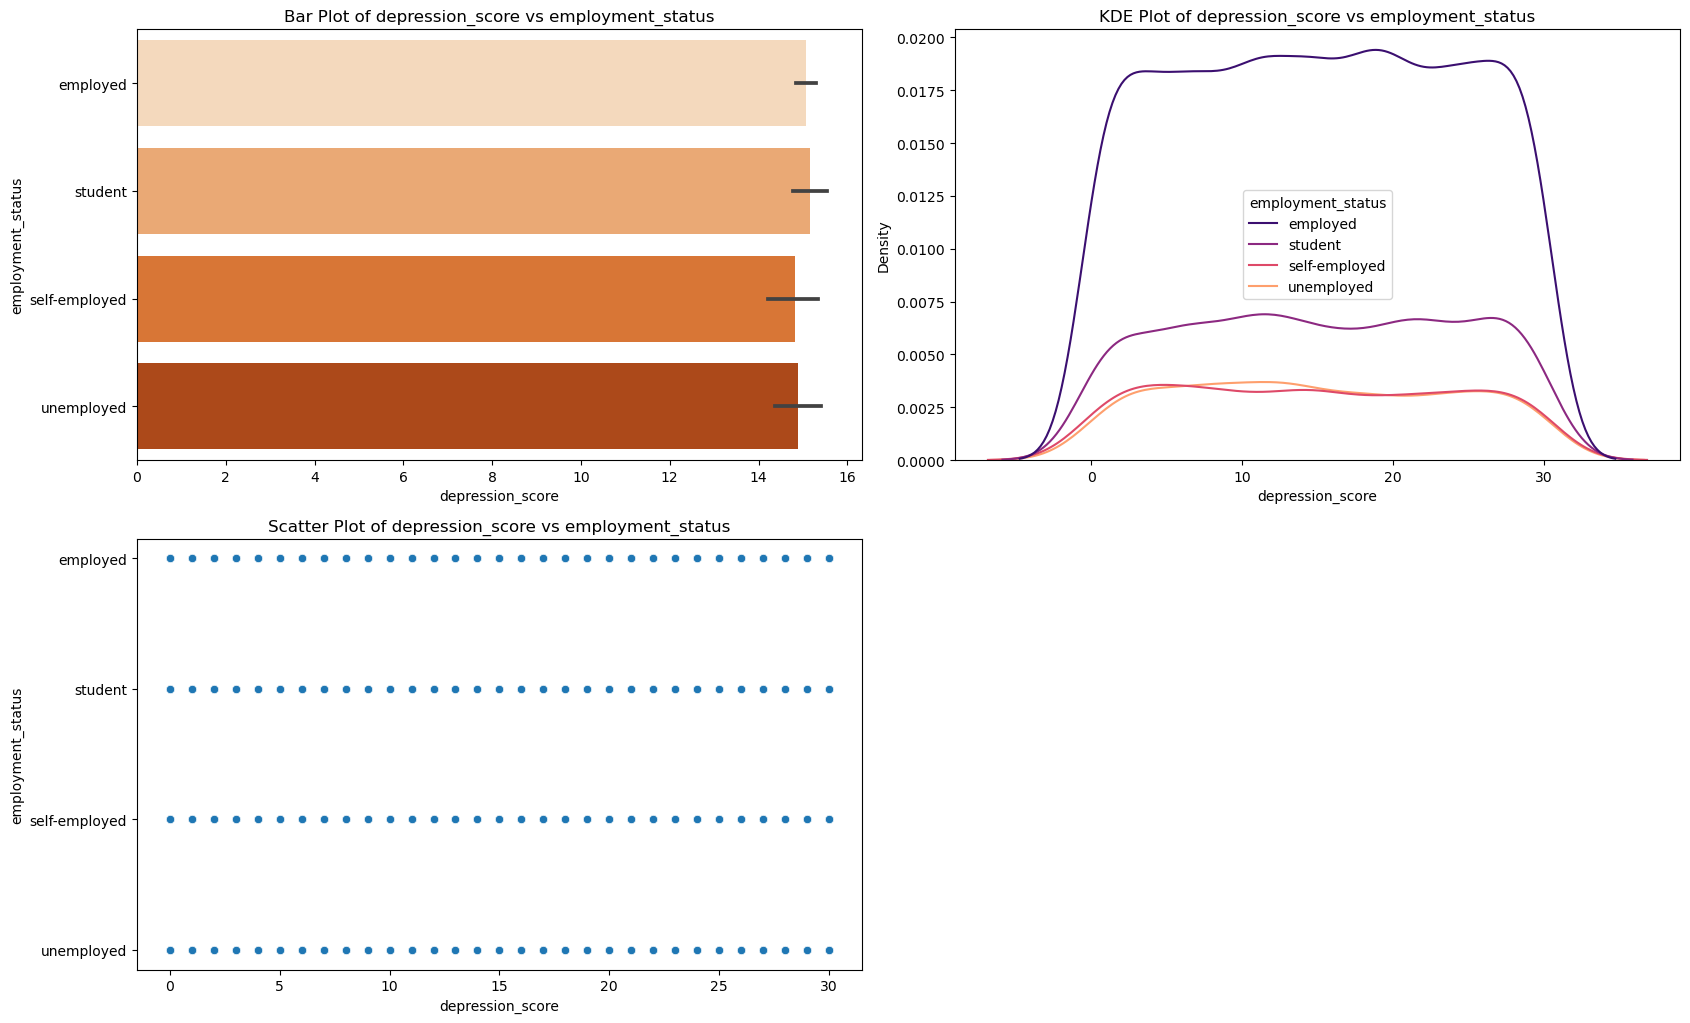

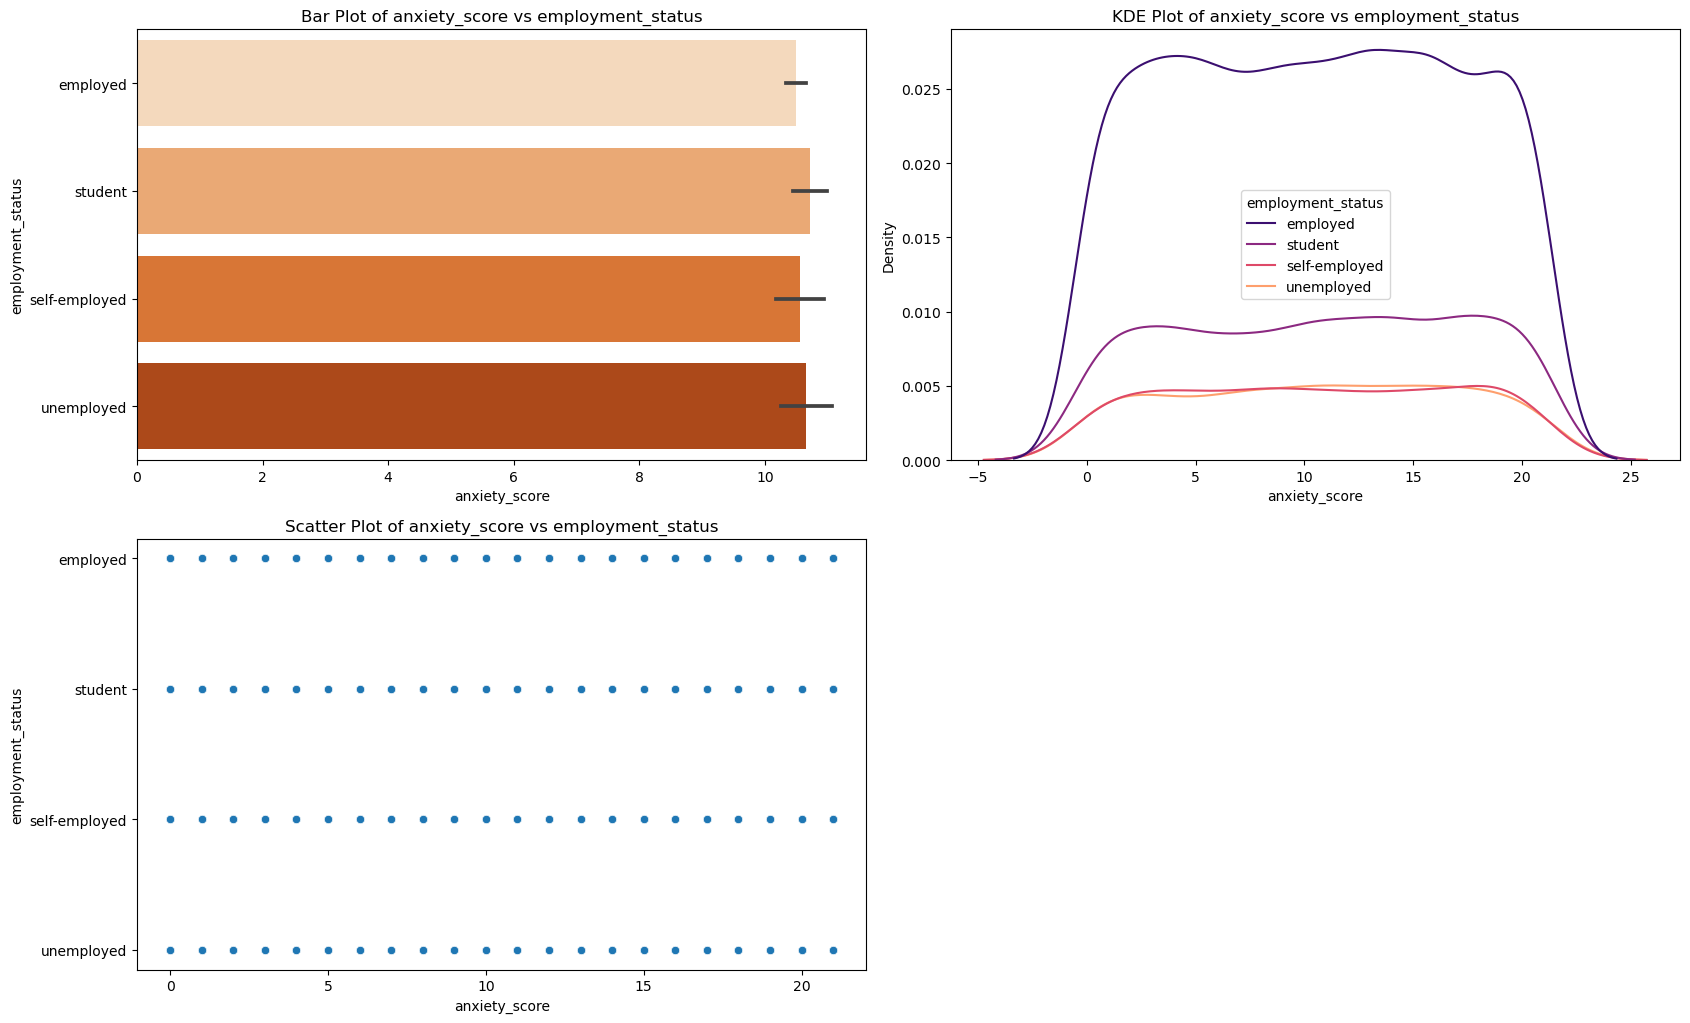

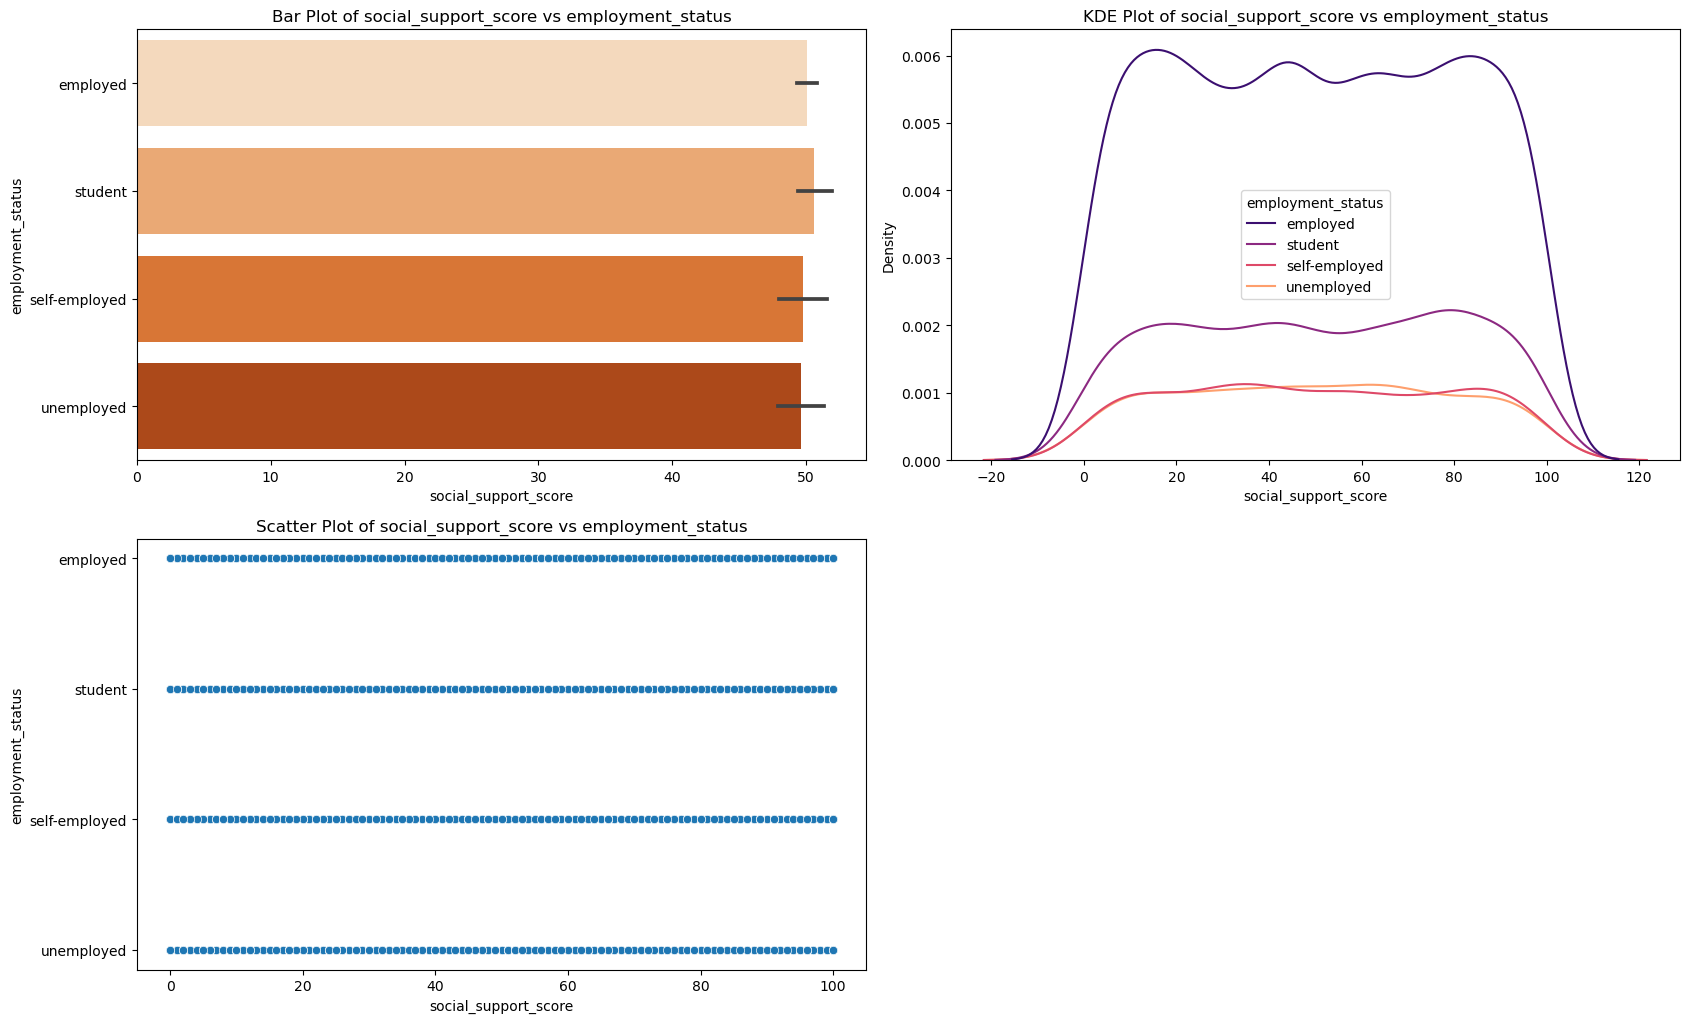

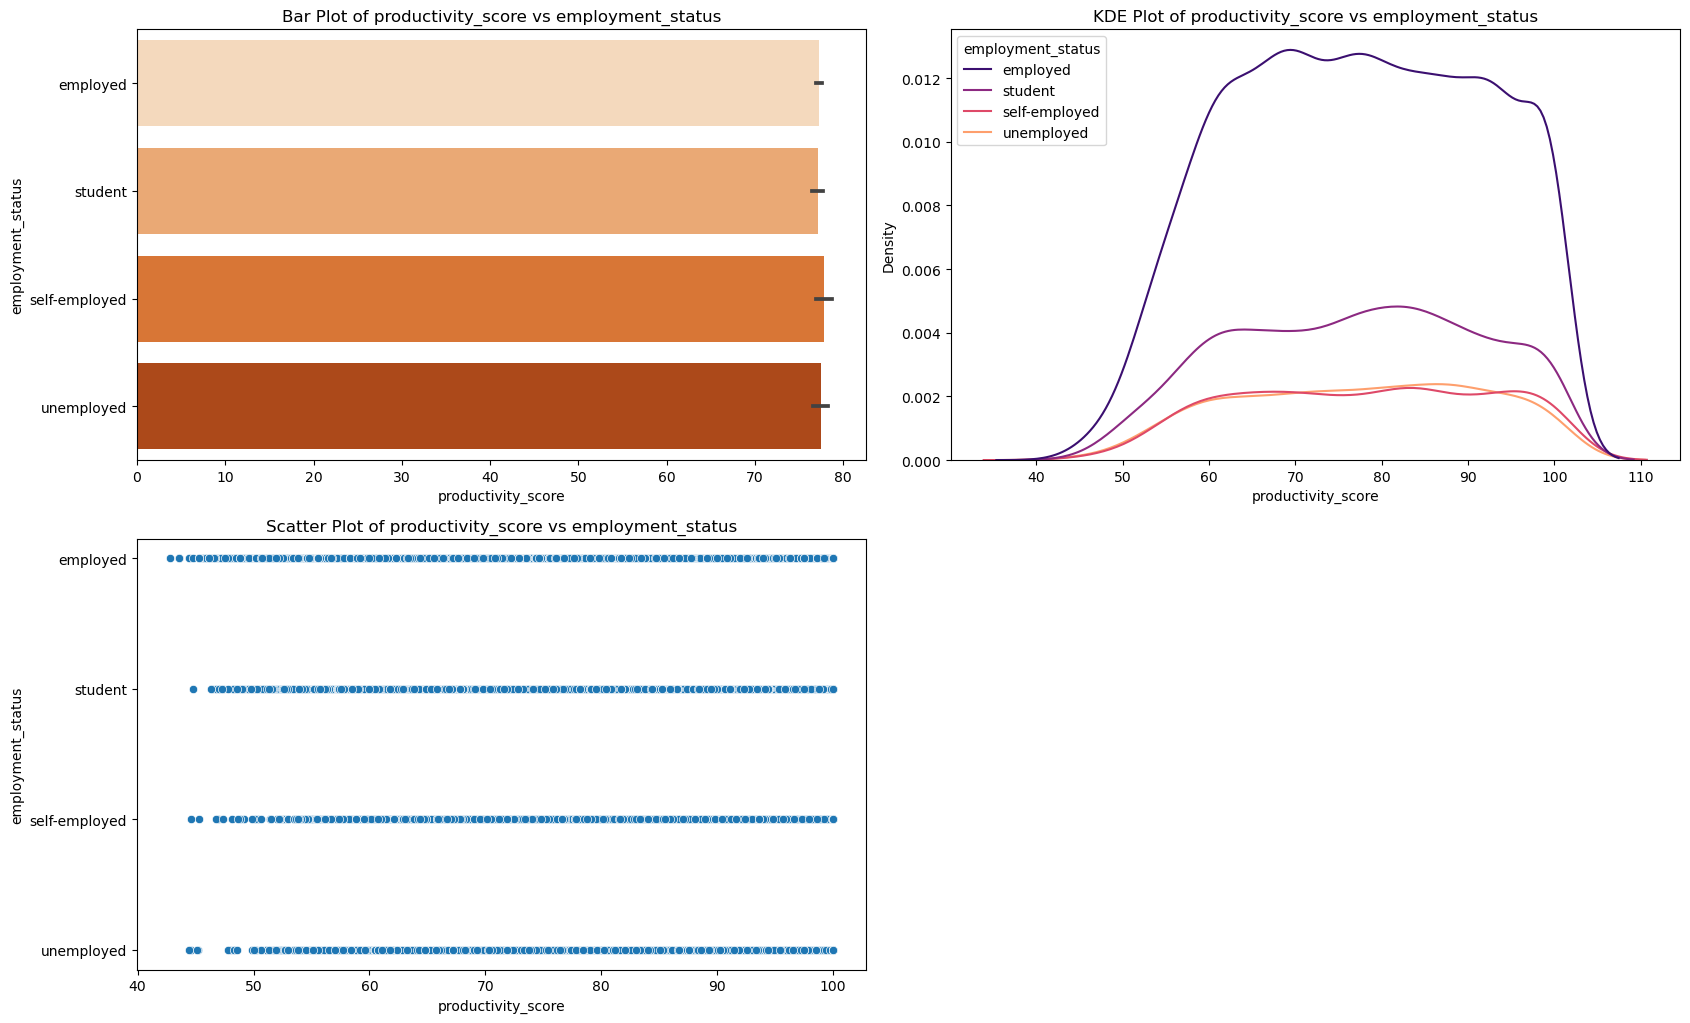

In [41]:

cat_num(df,num_df, "employment_status")

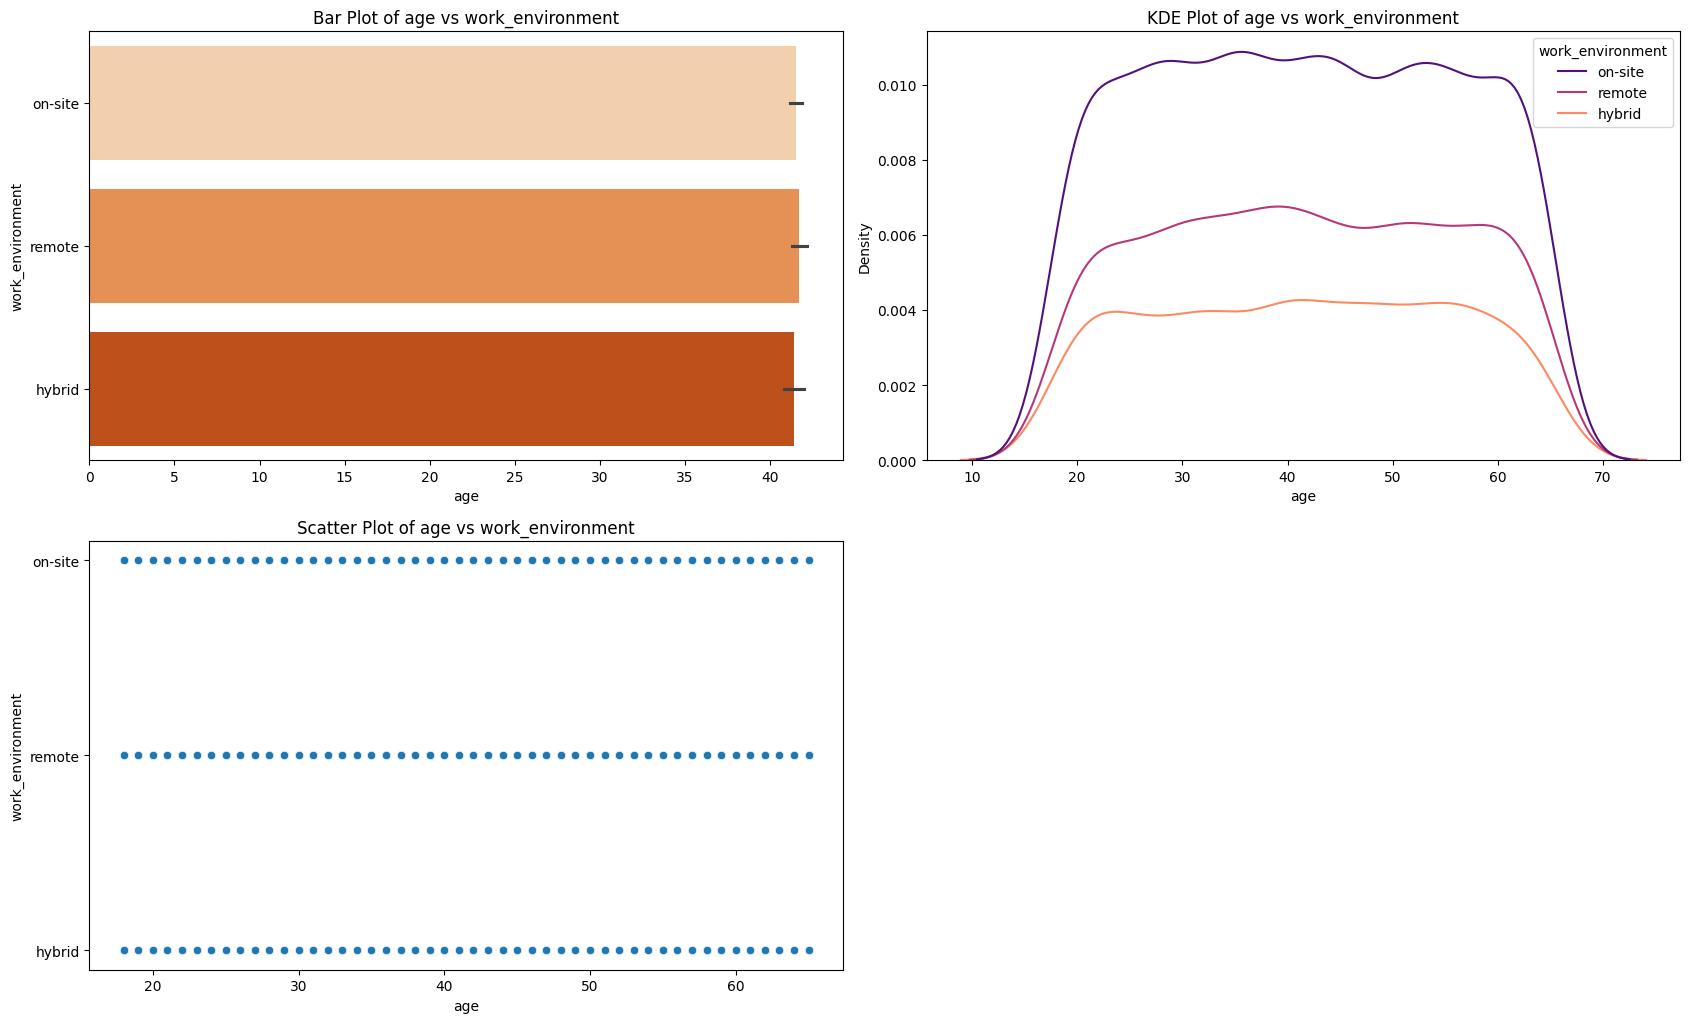

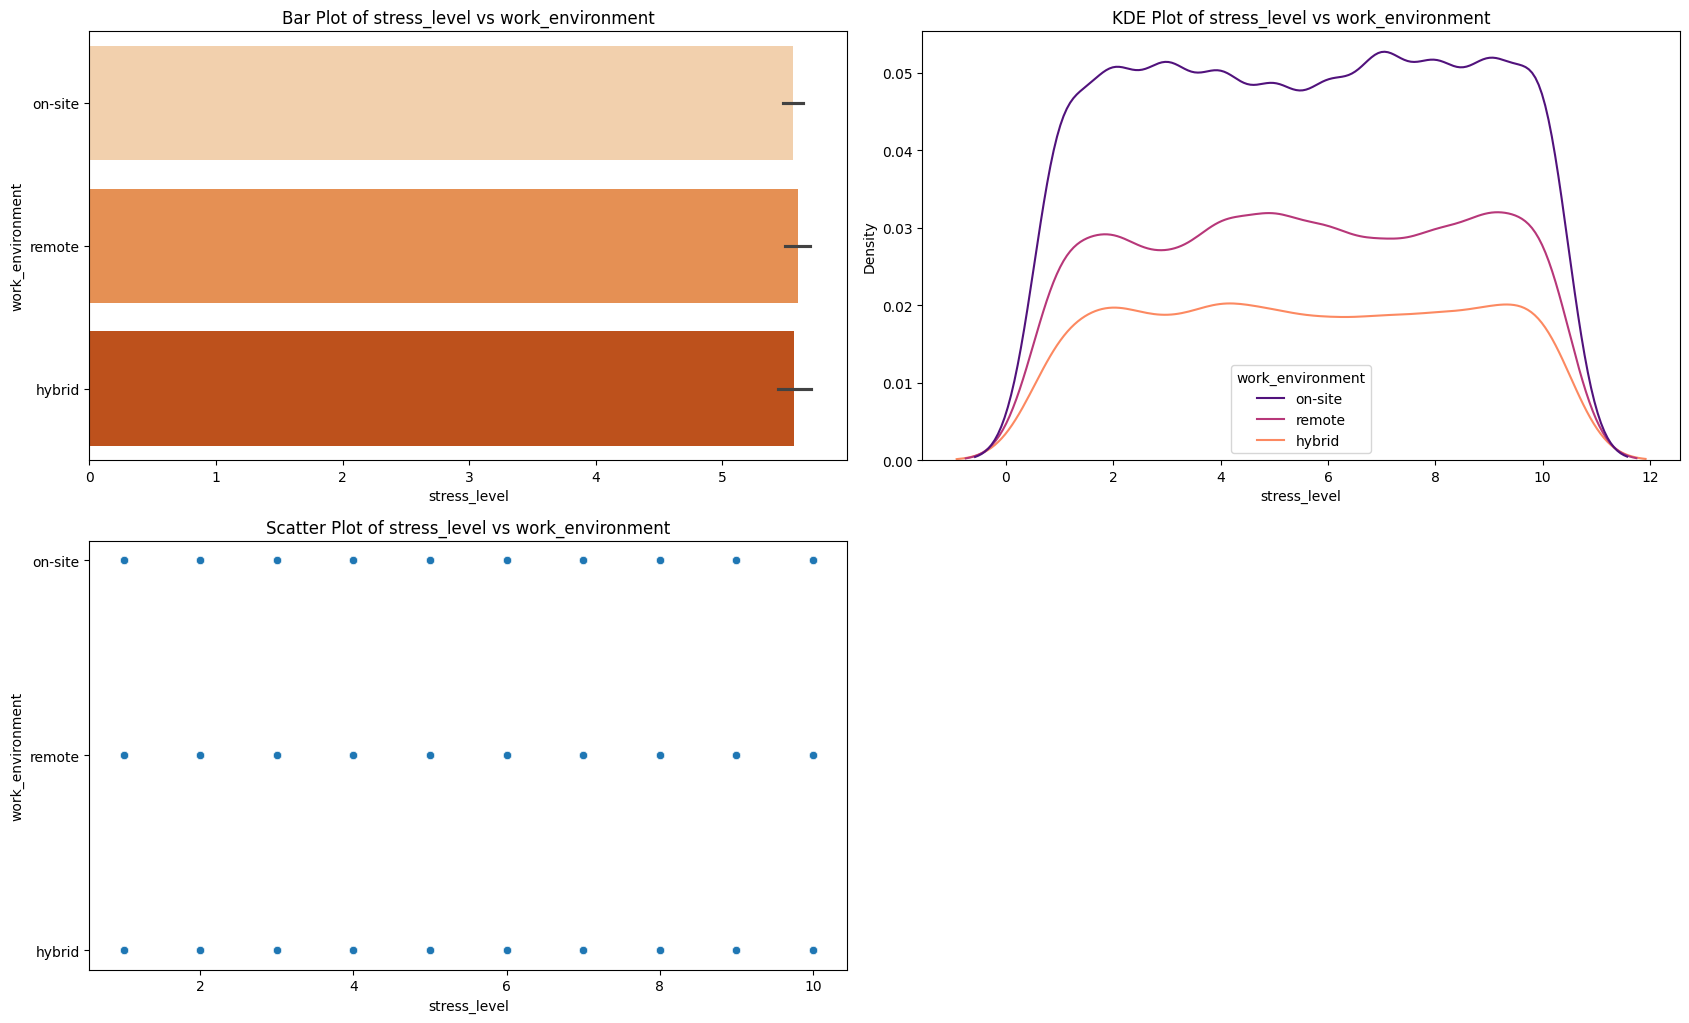

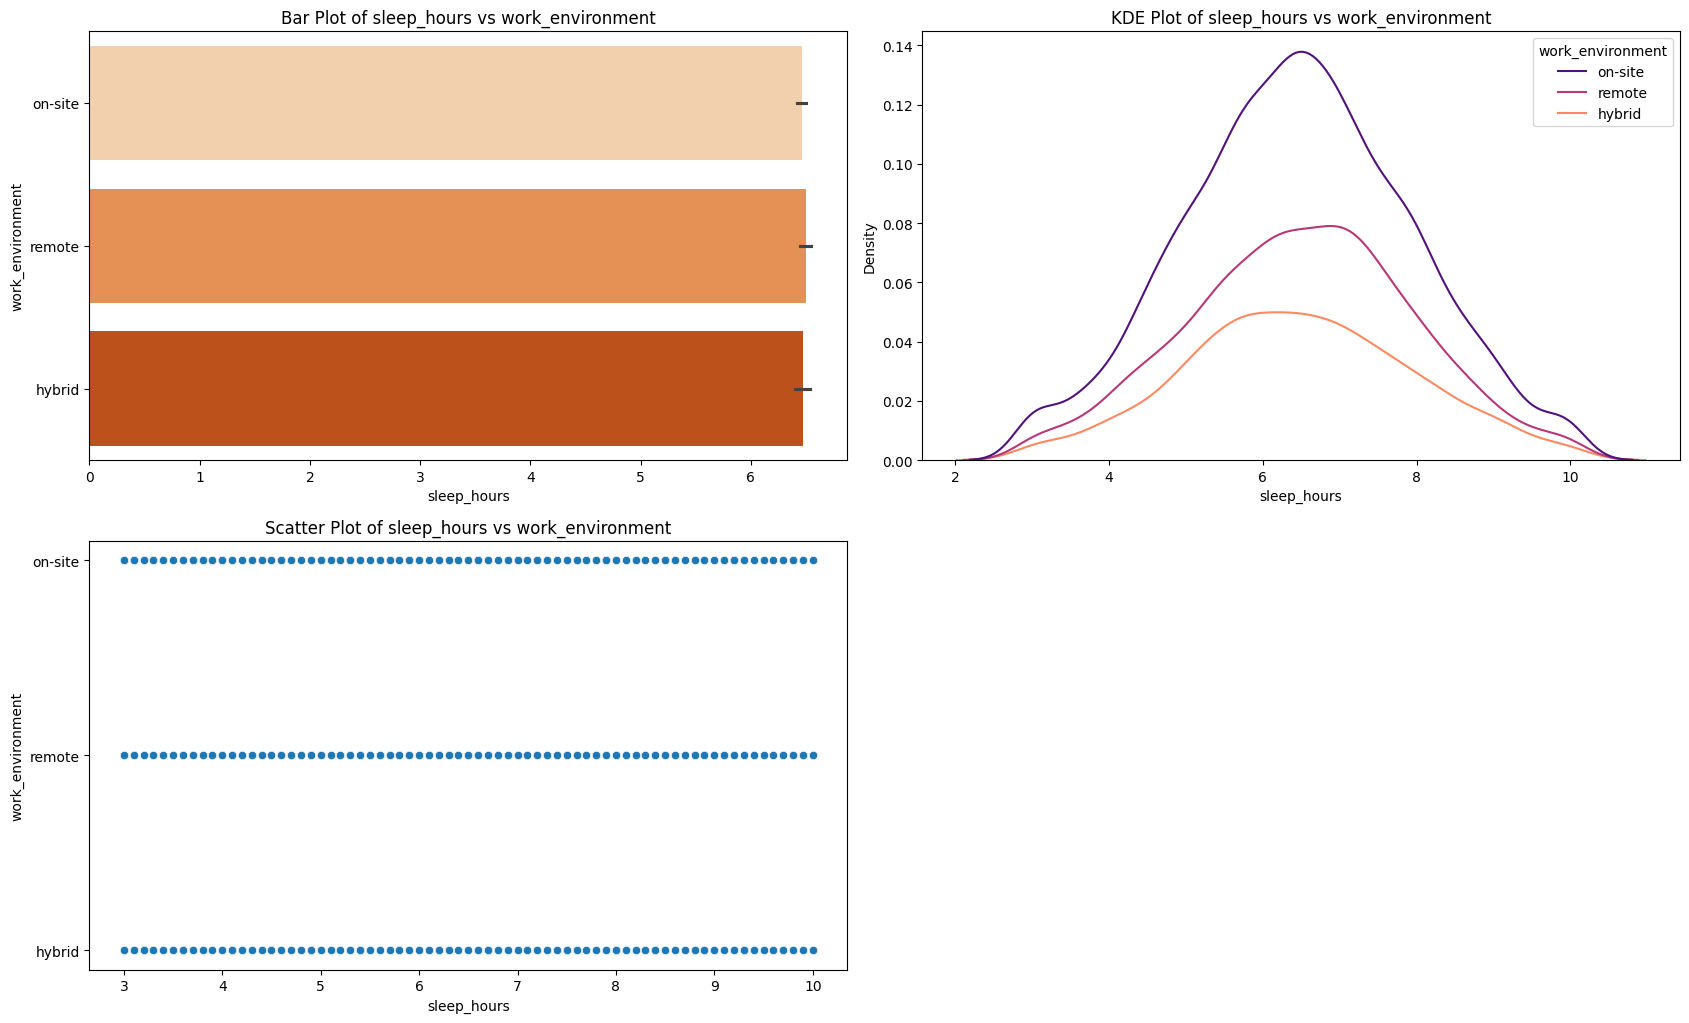

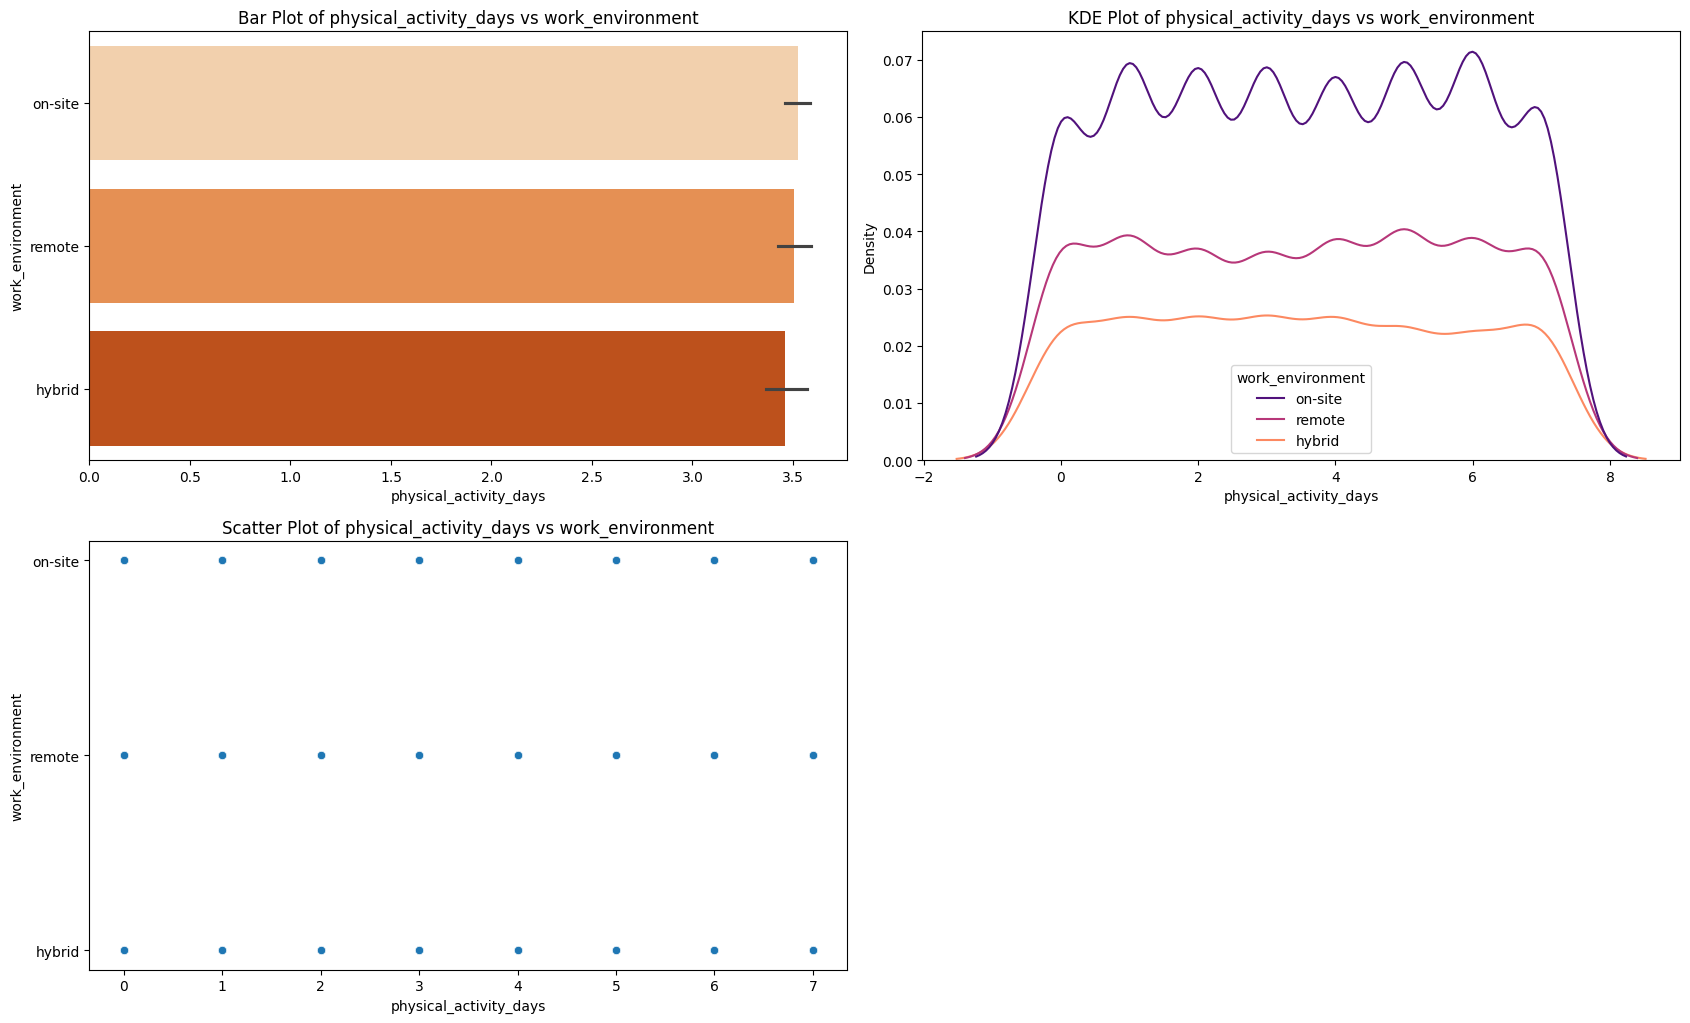

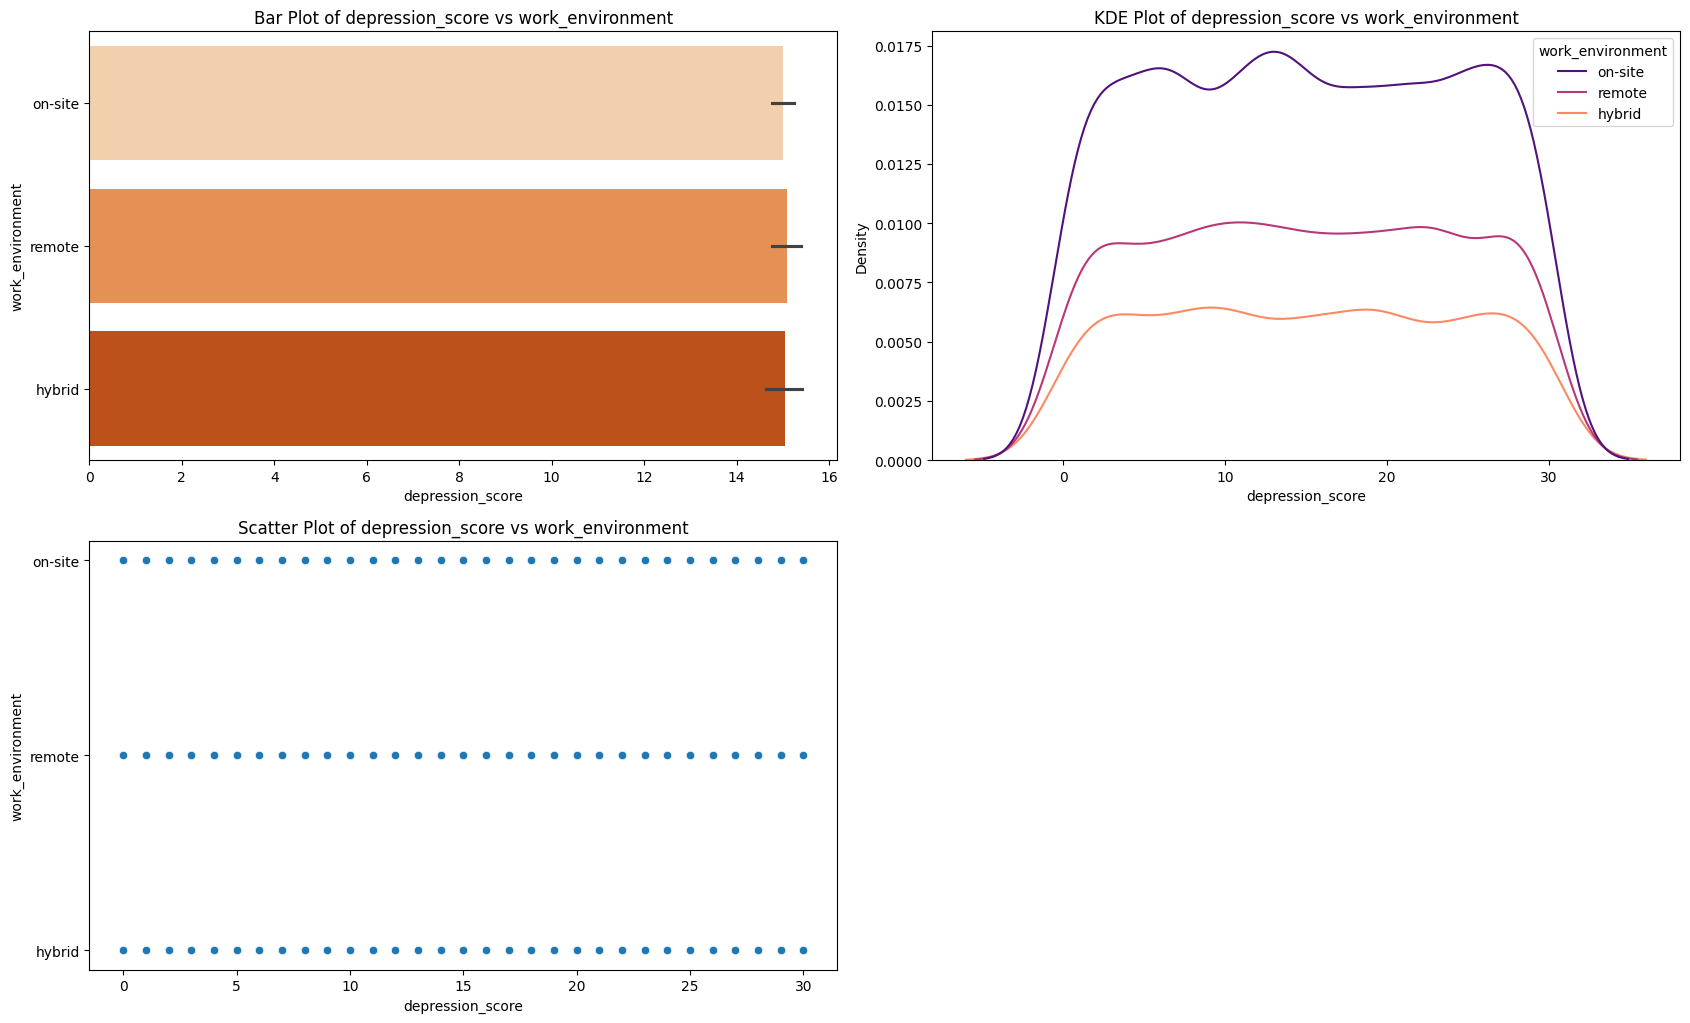

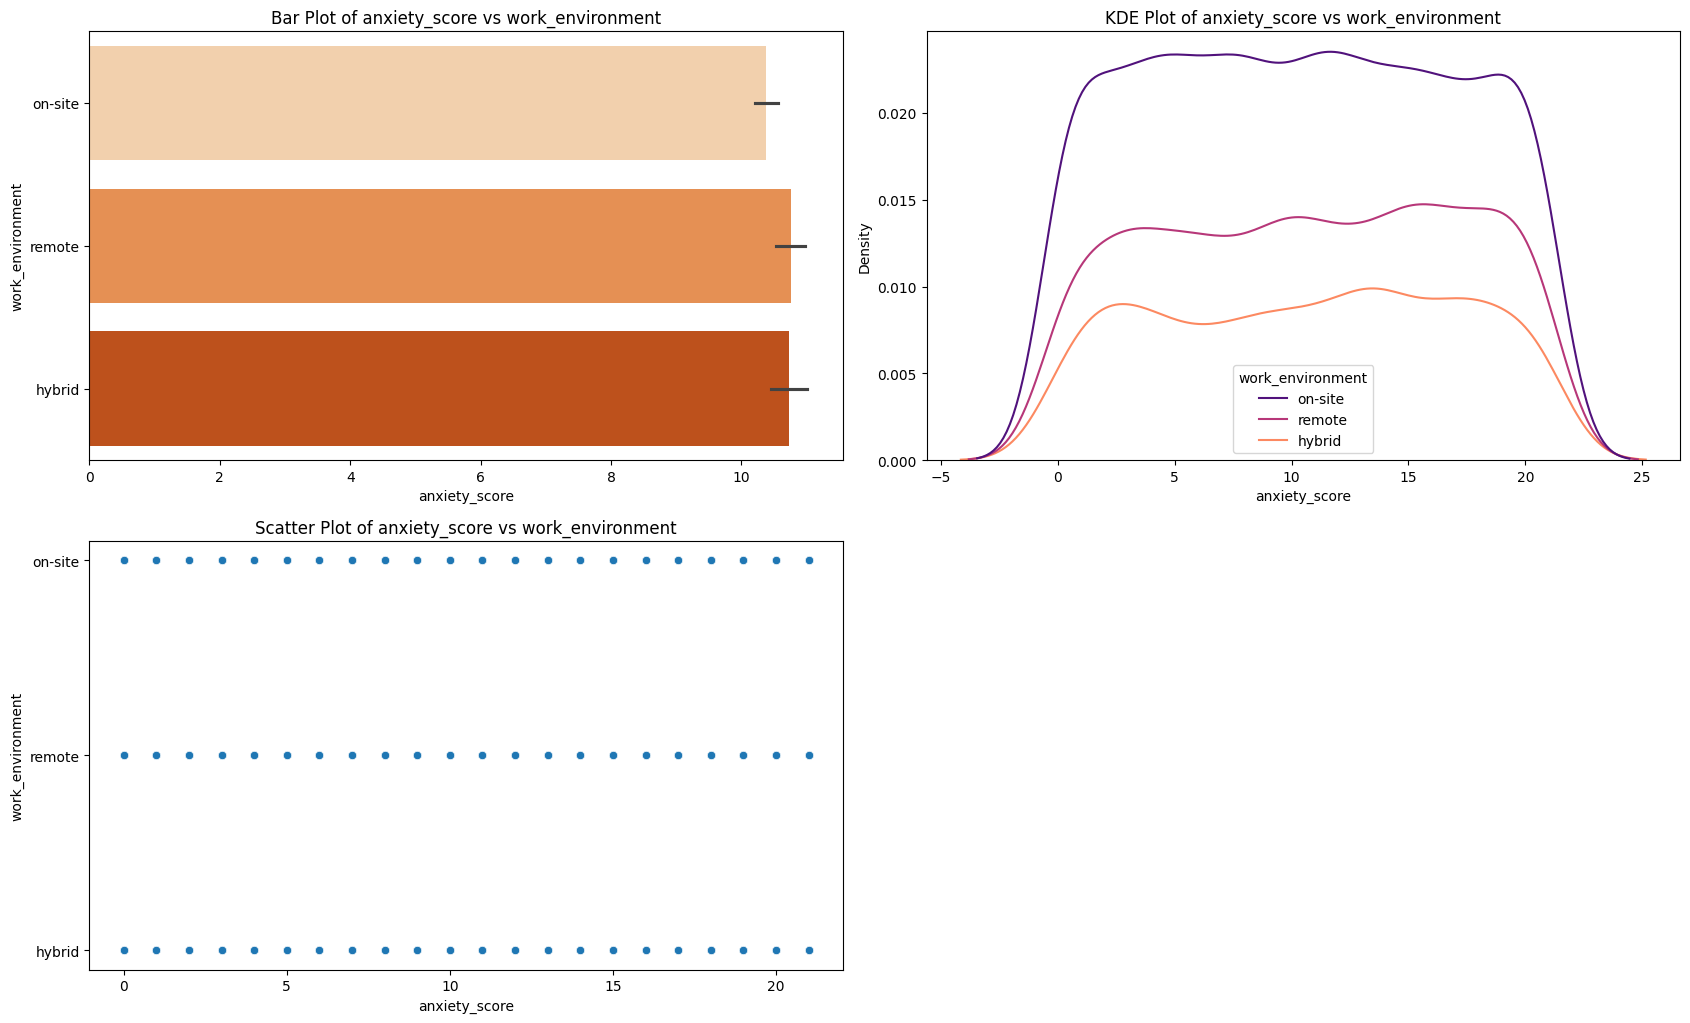

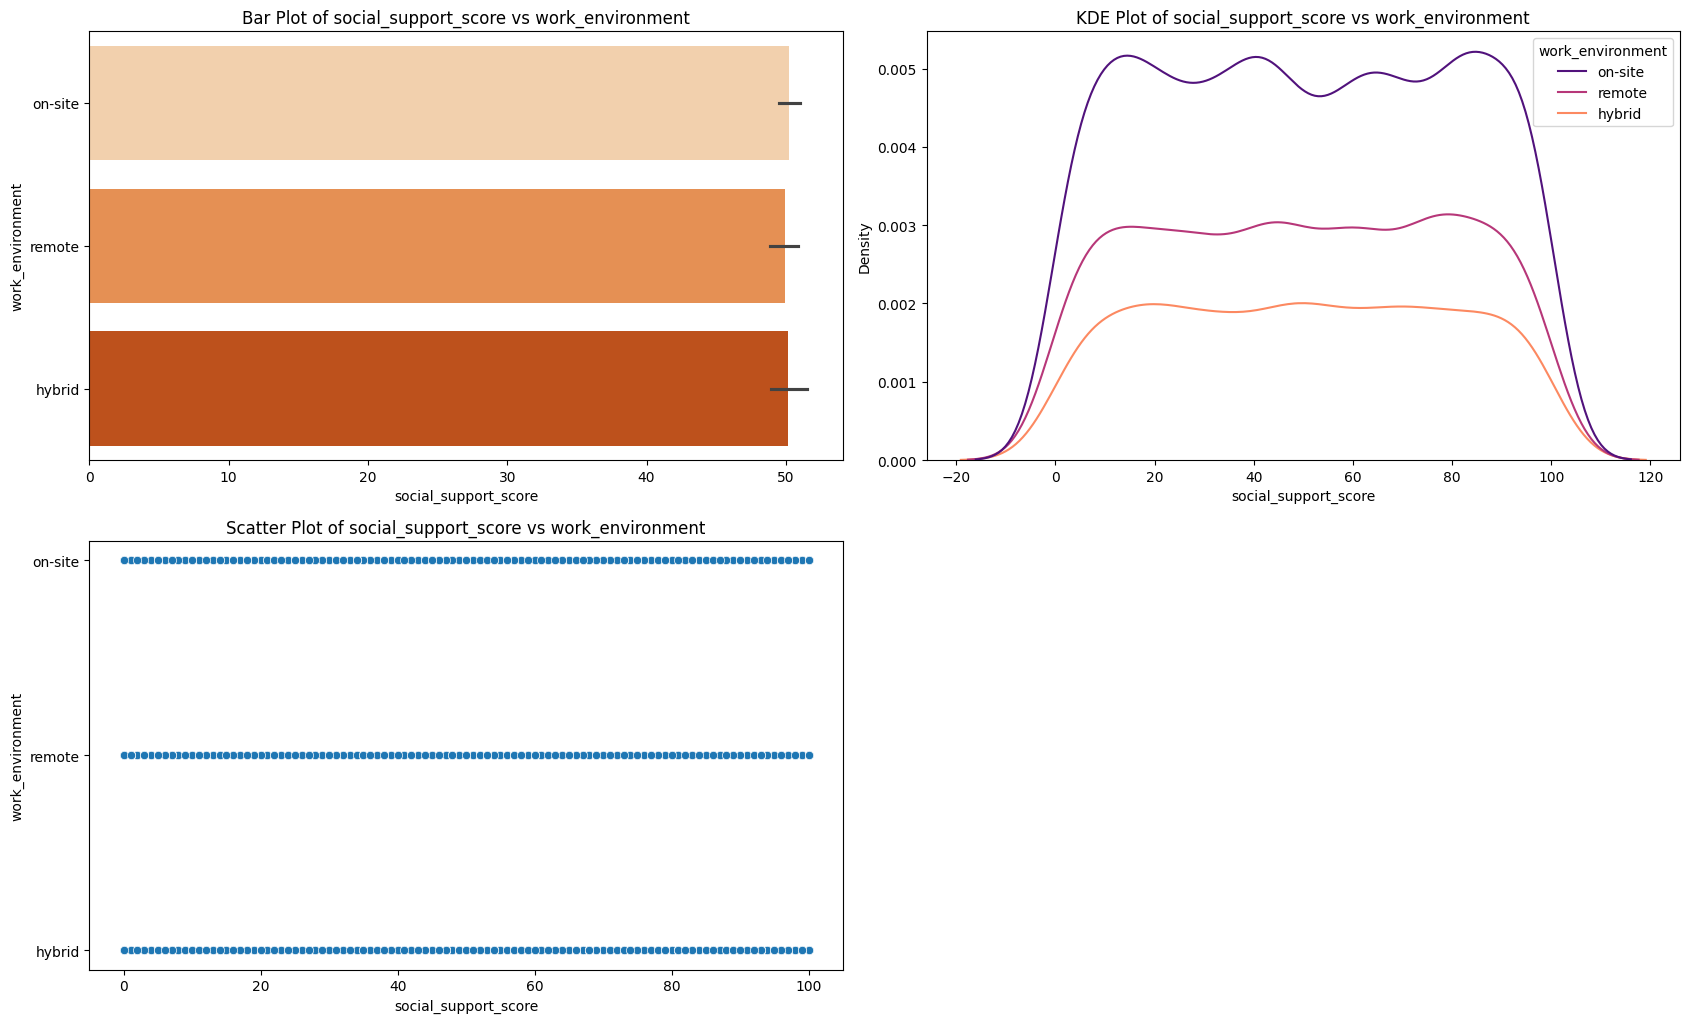

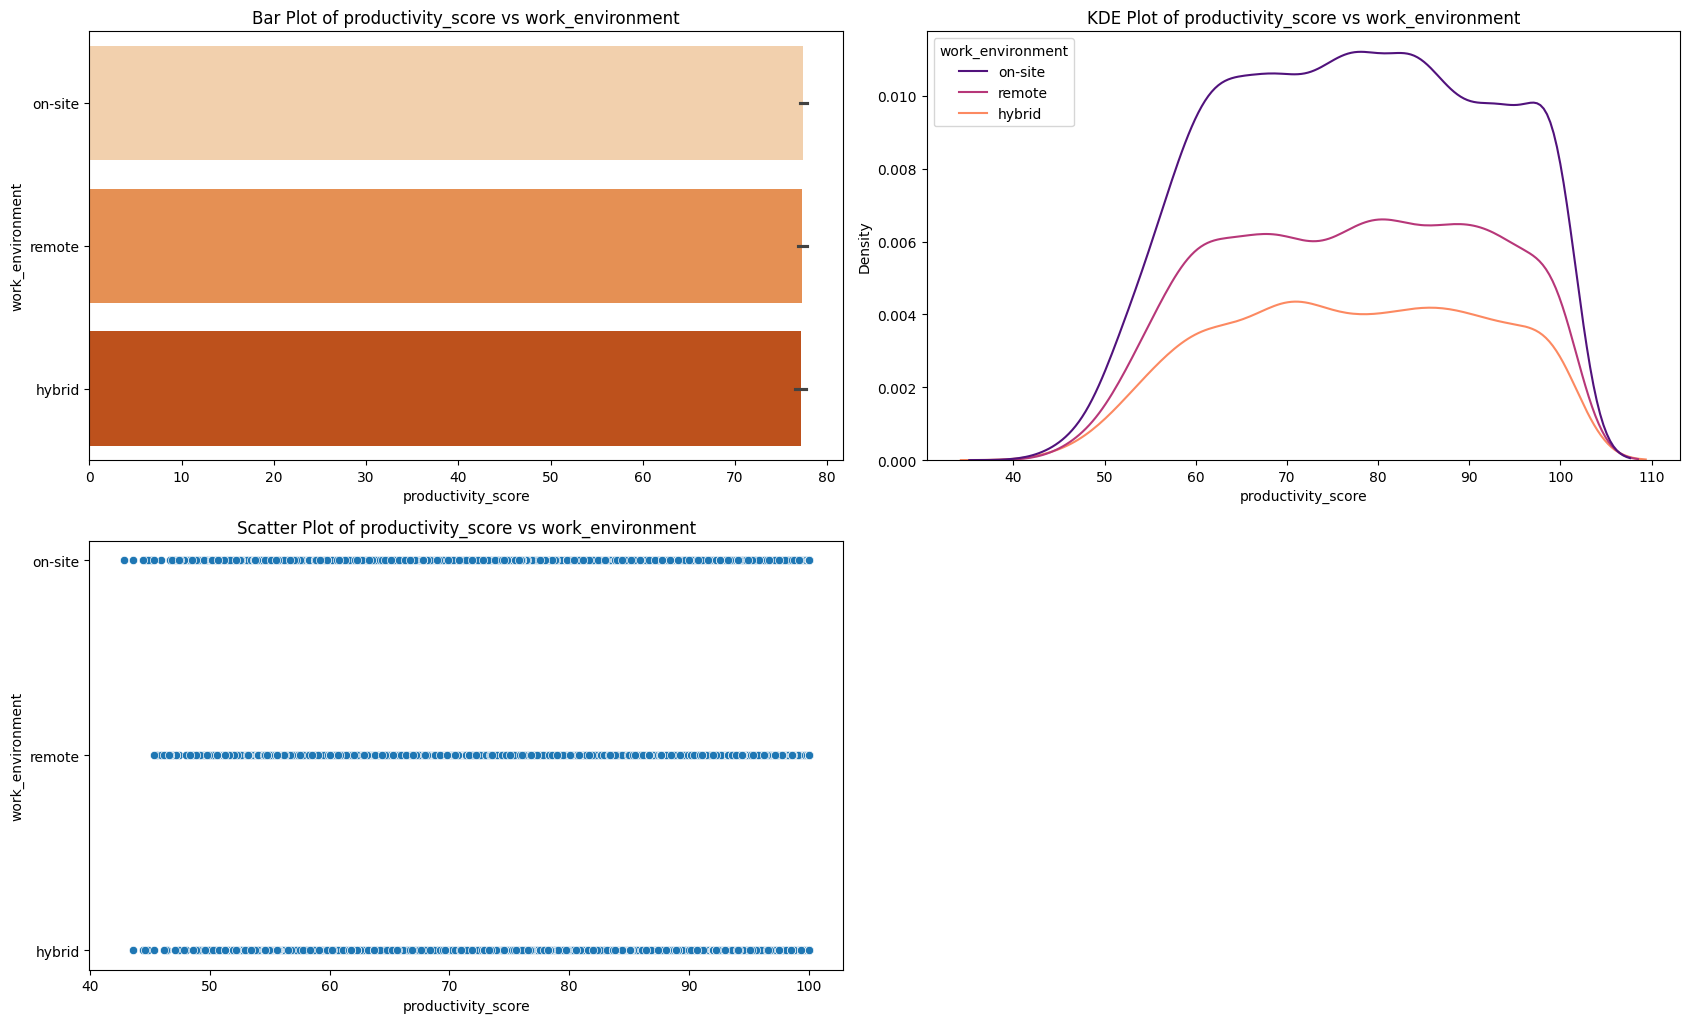

In [38]:
cat_num(df,num_df, "work_environment")

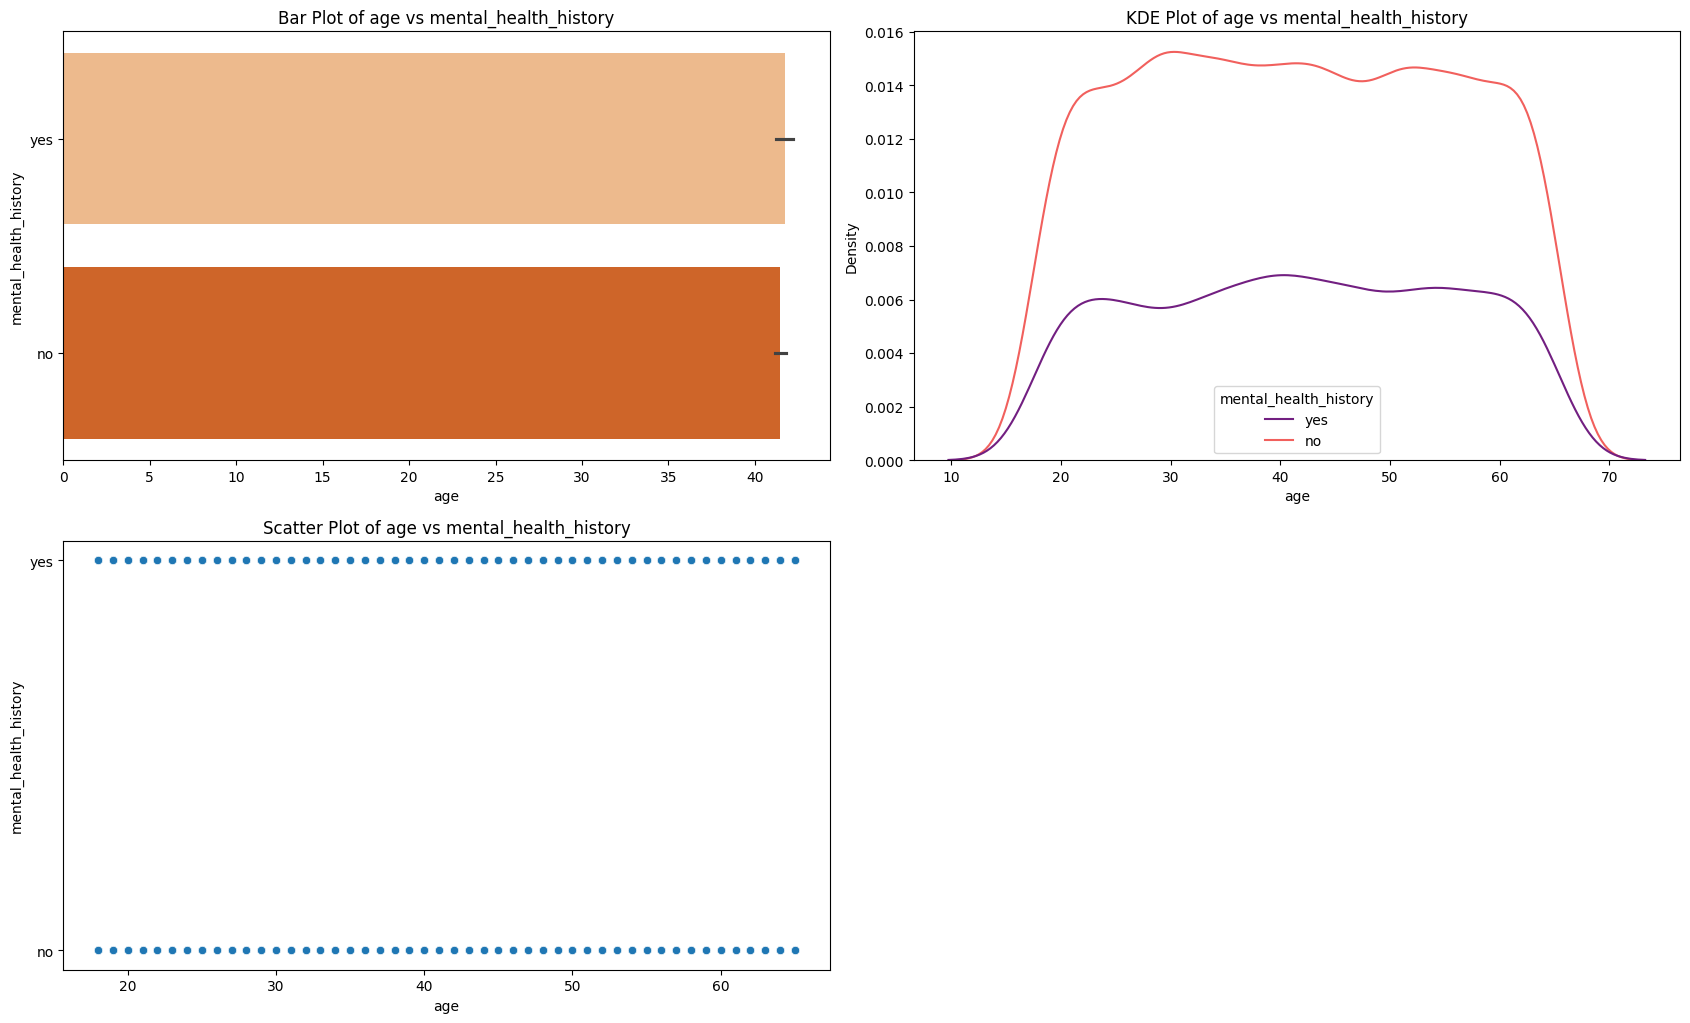

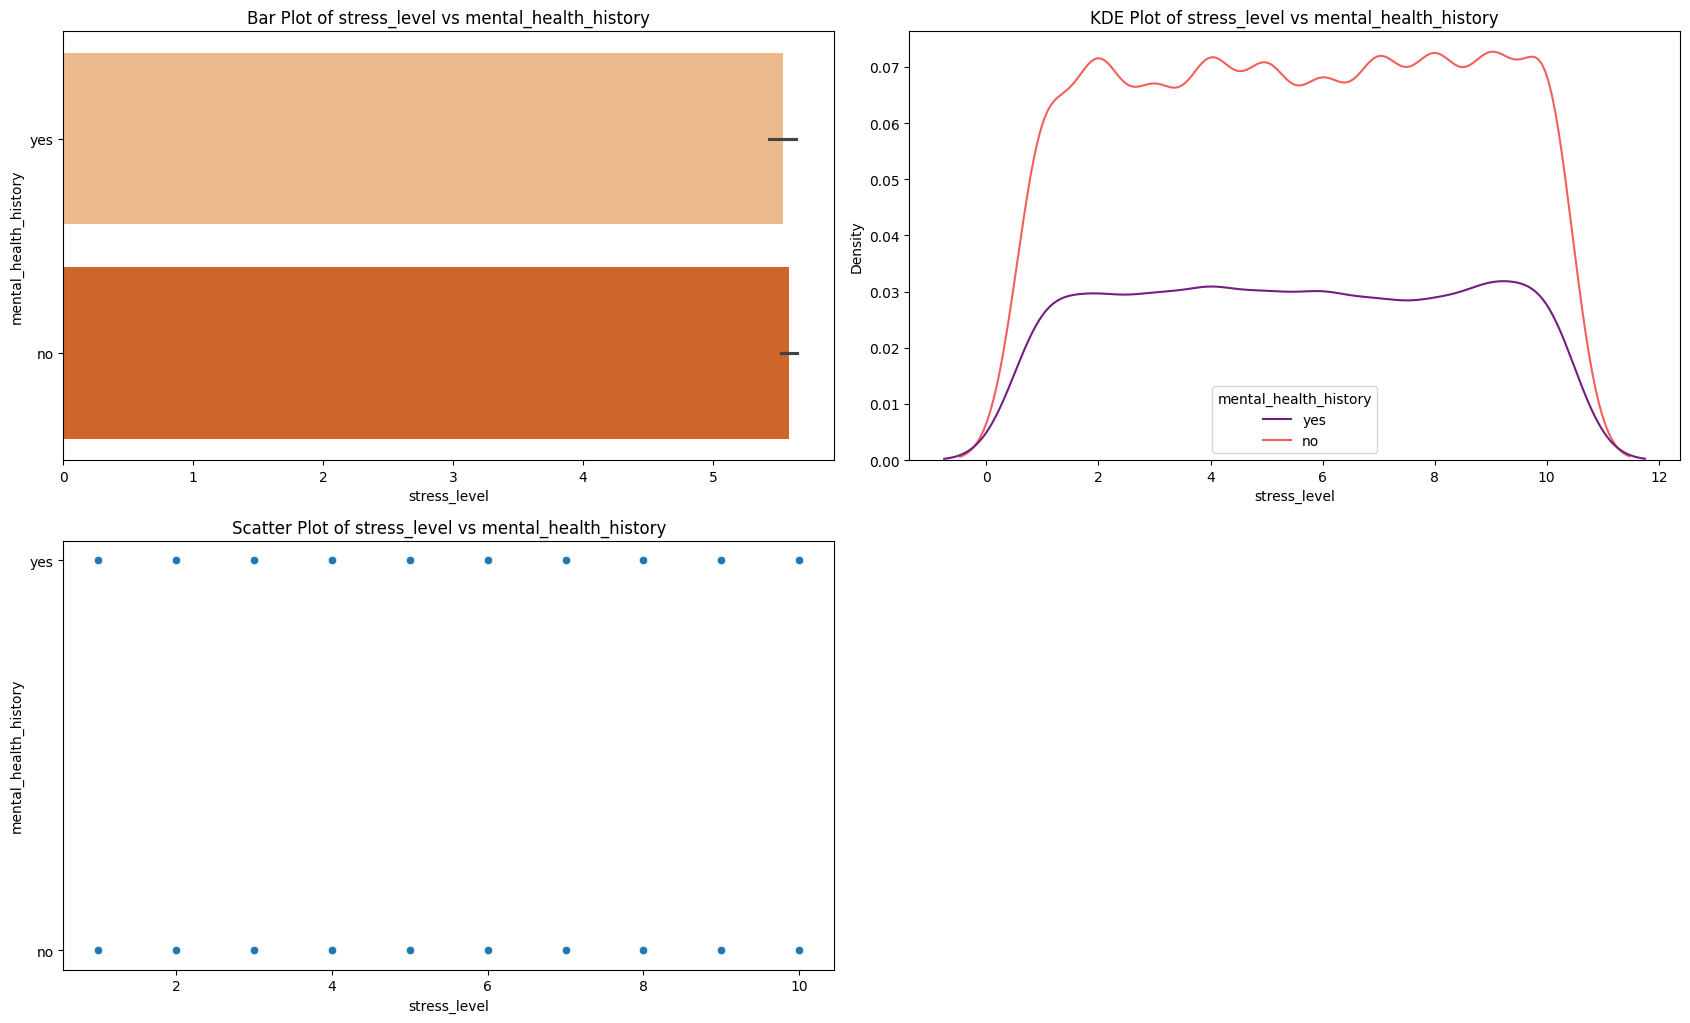

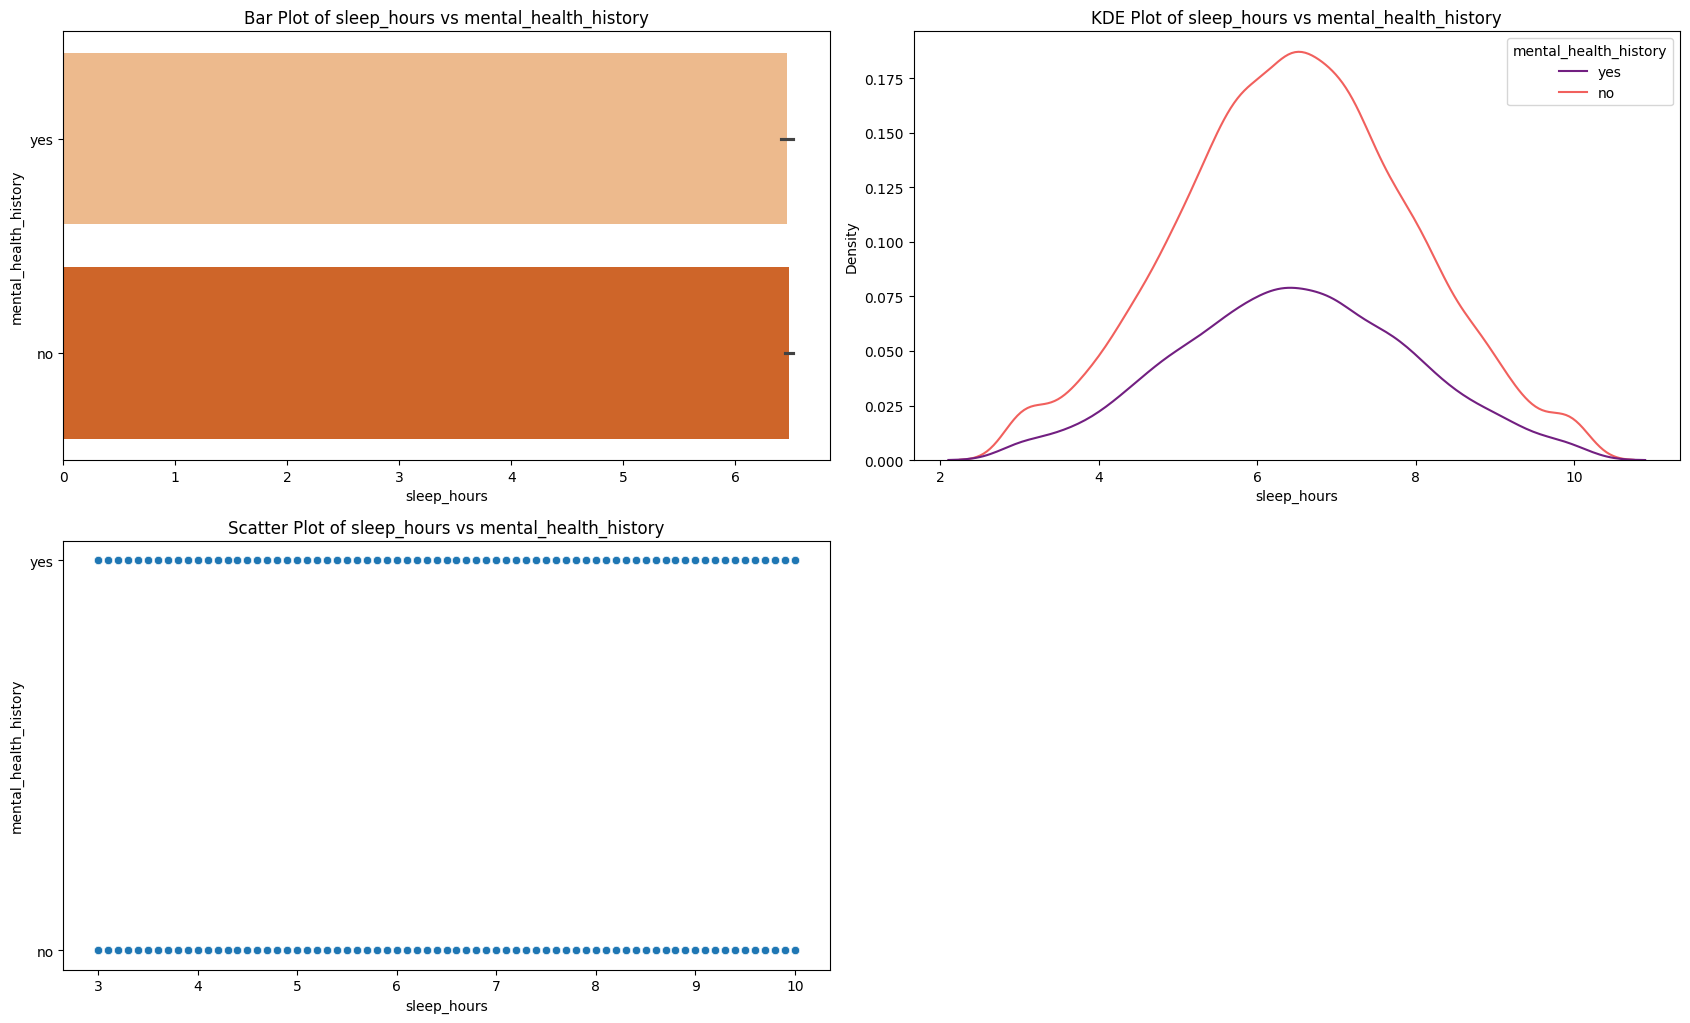

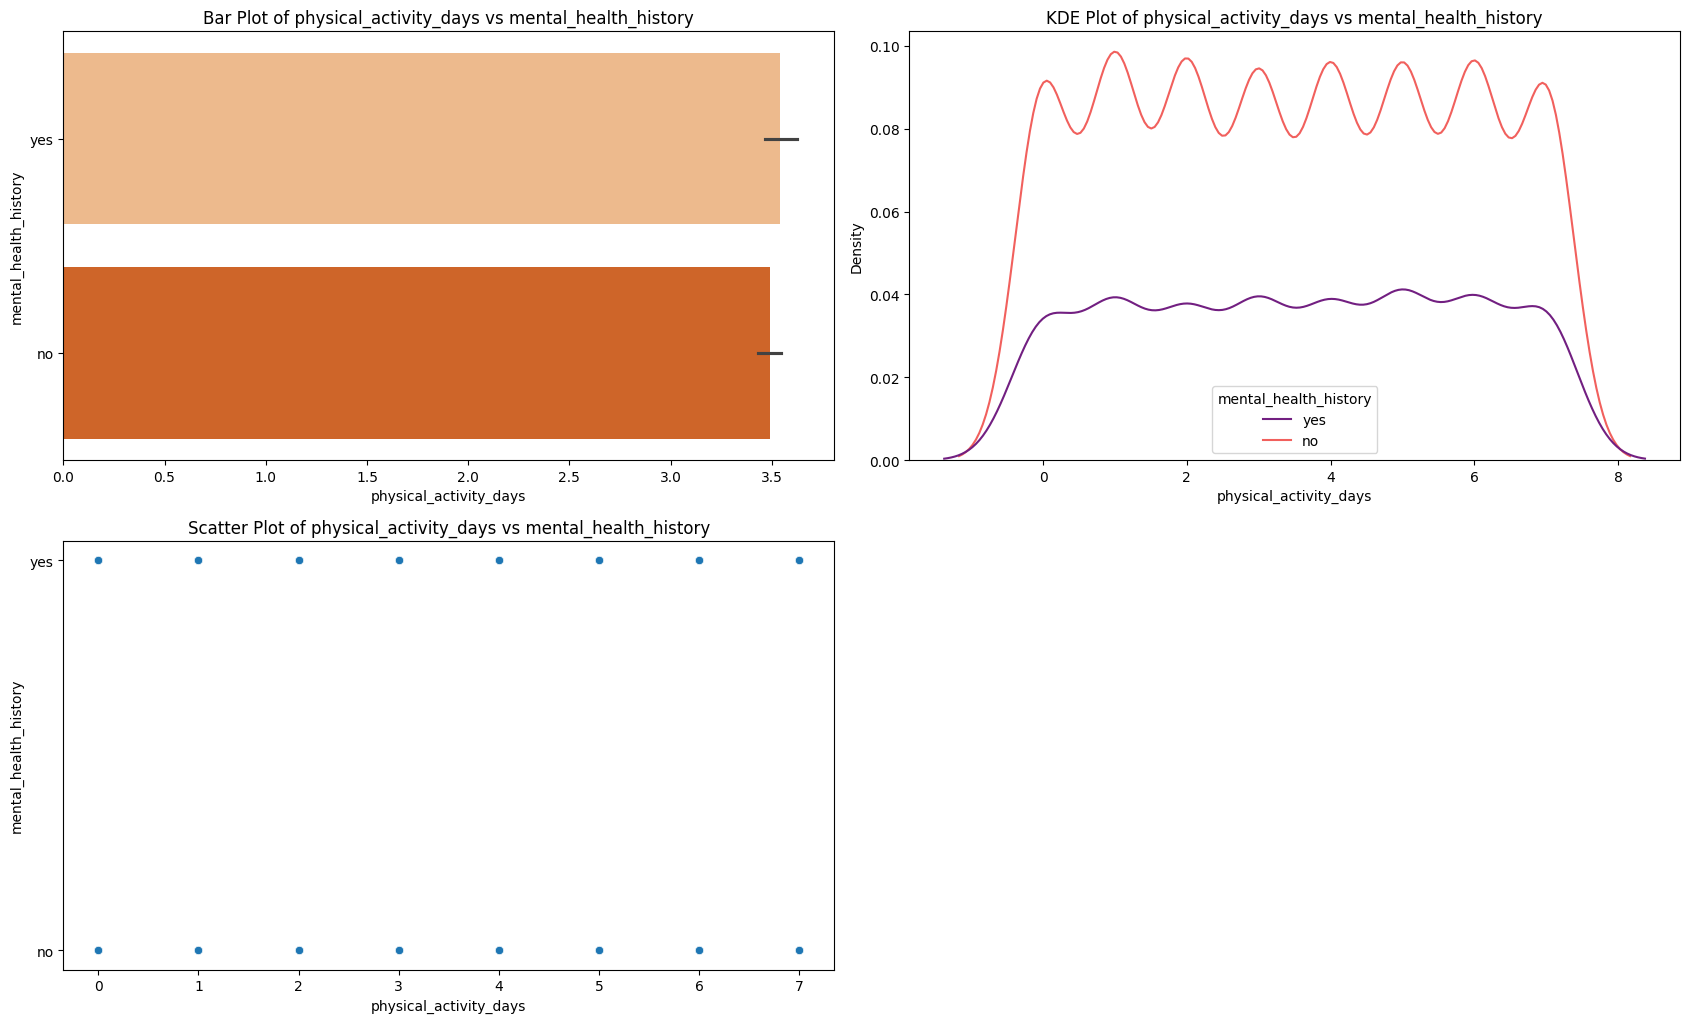

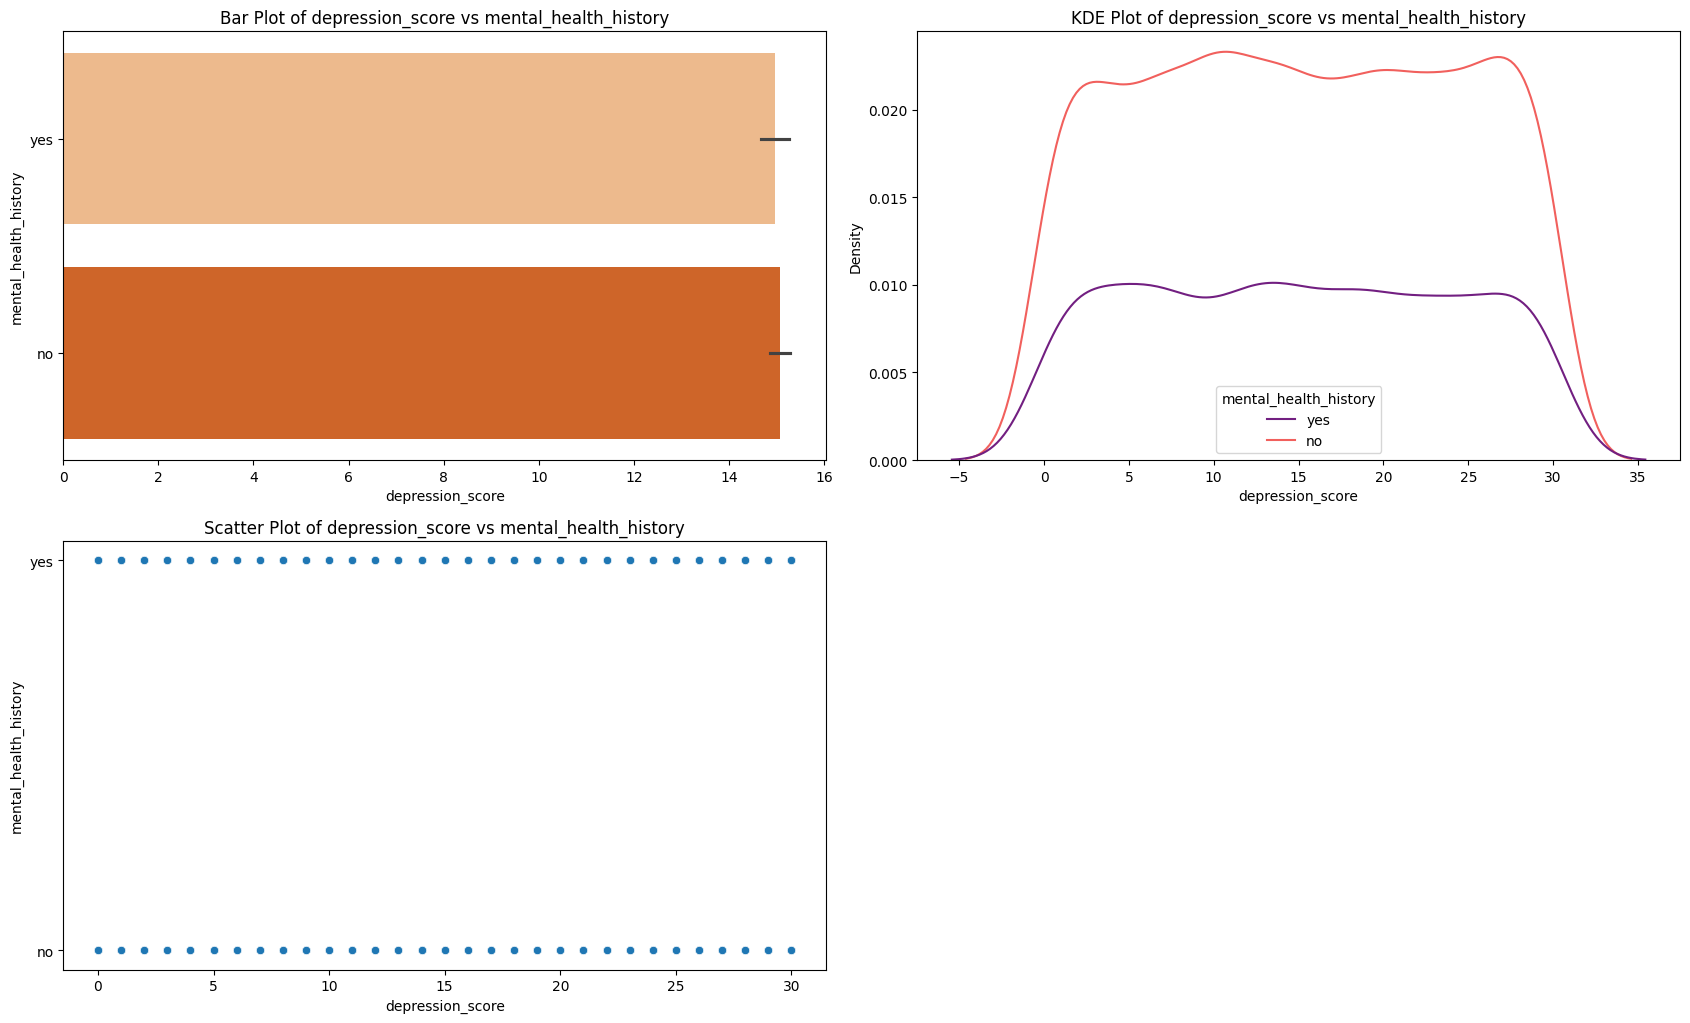

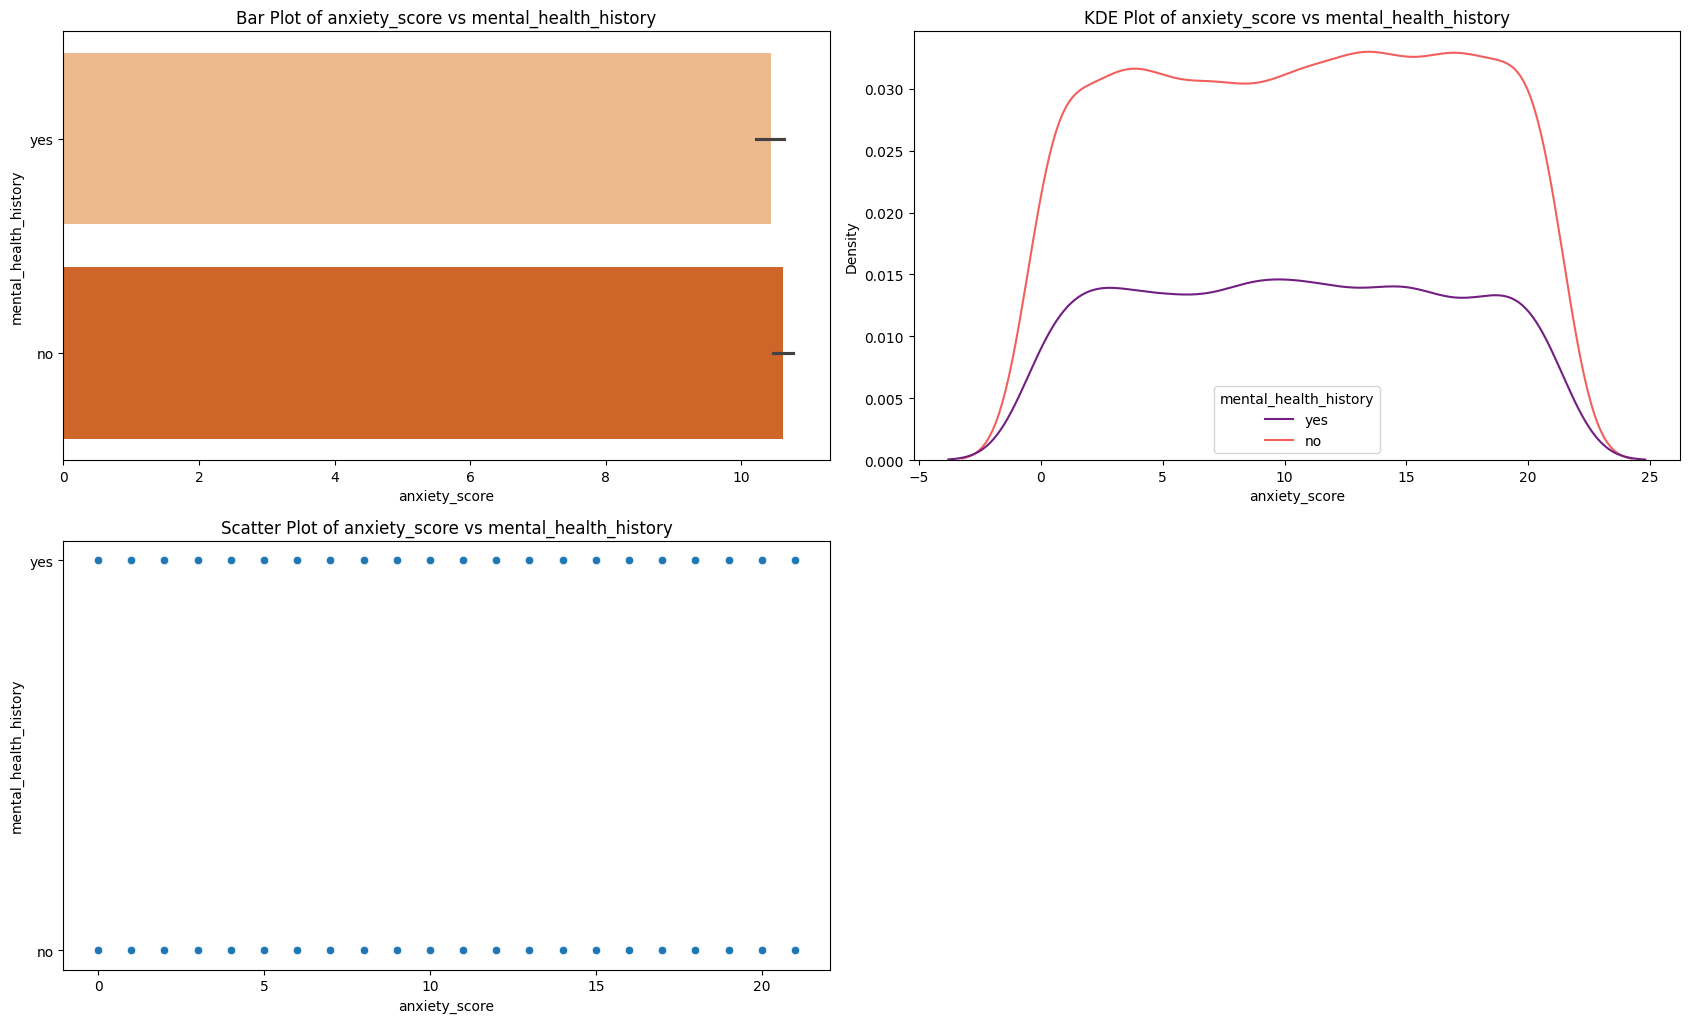

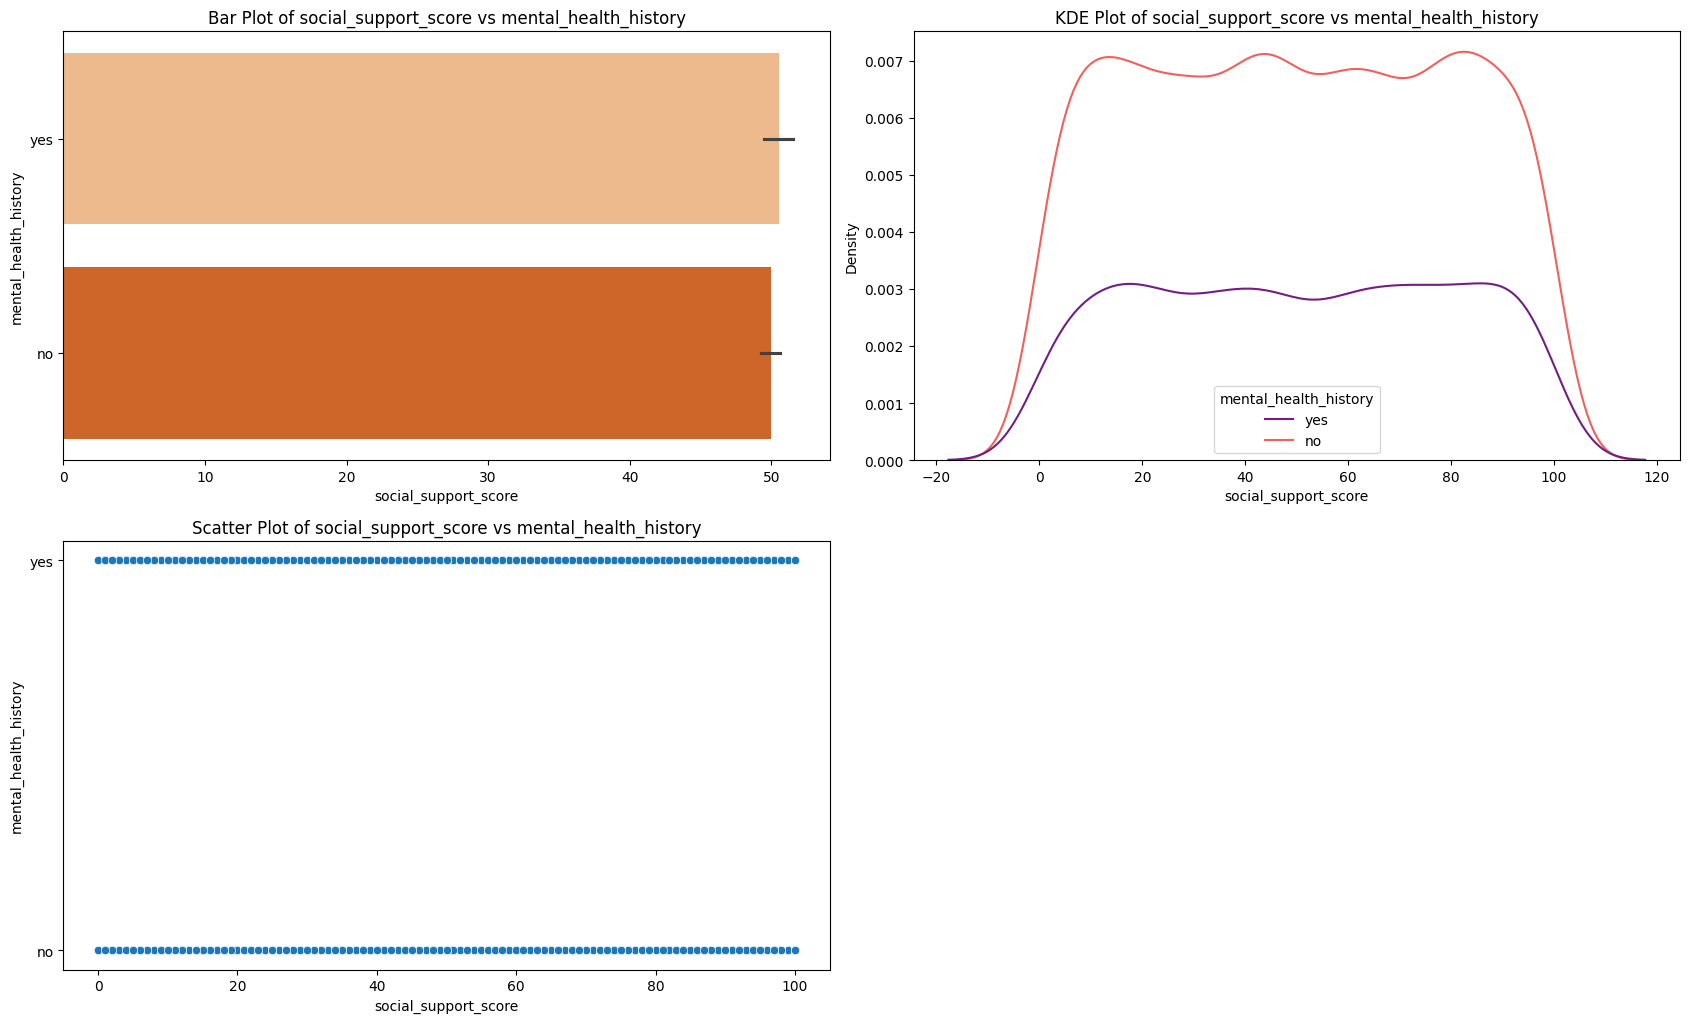

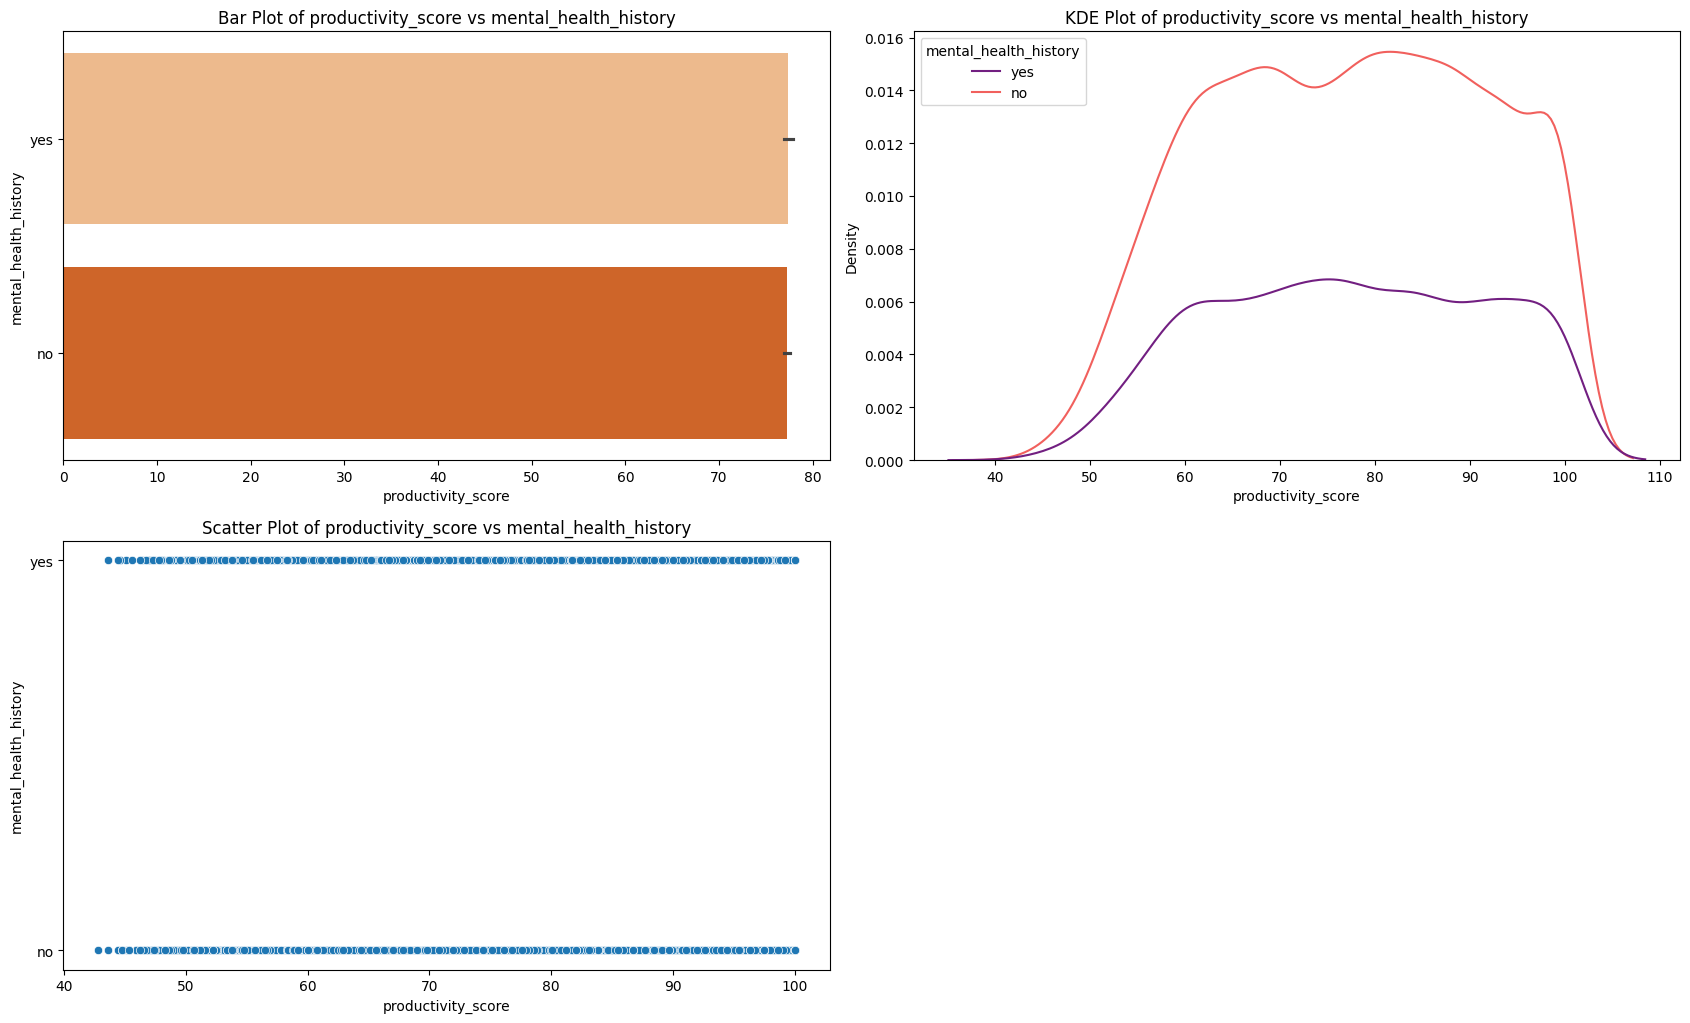

In [39]:

cat_num(df,num_df, "mental_health_history")

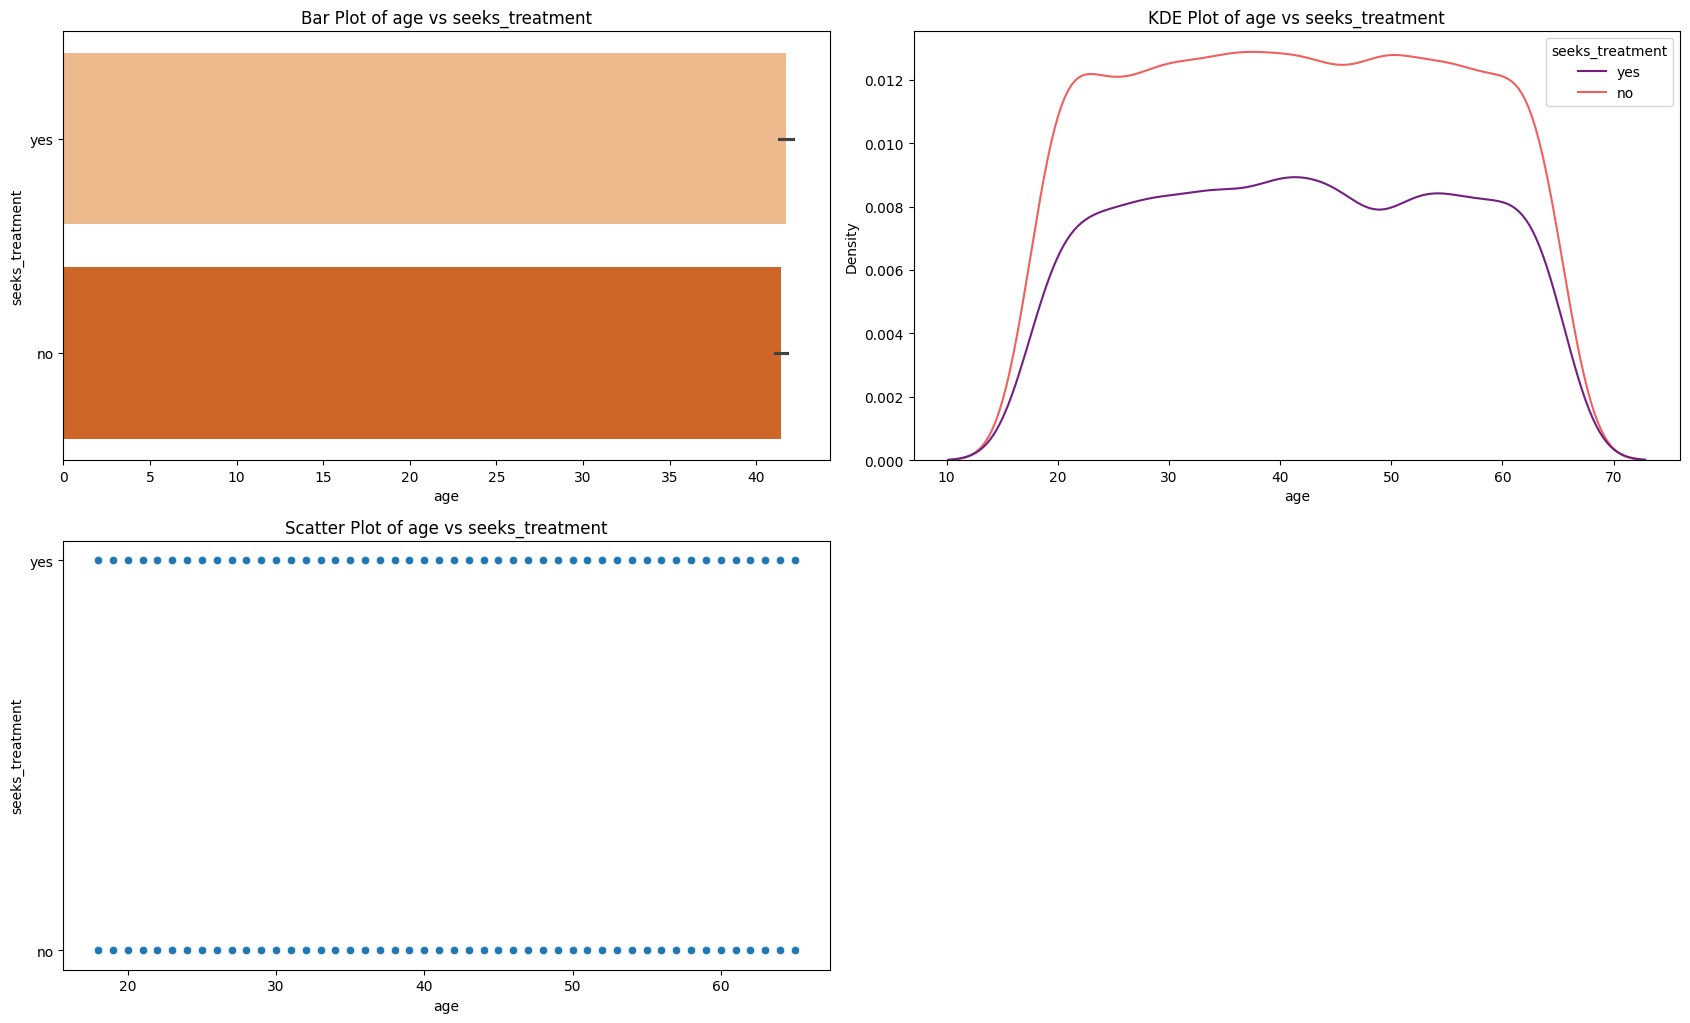

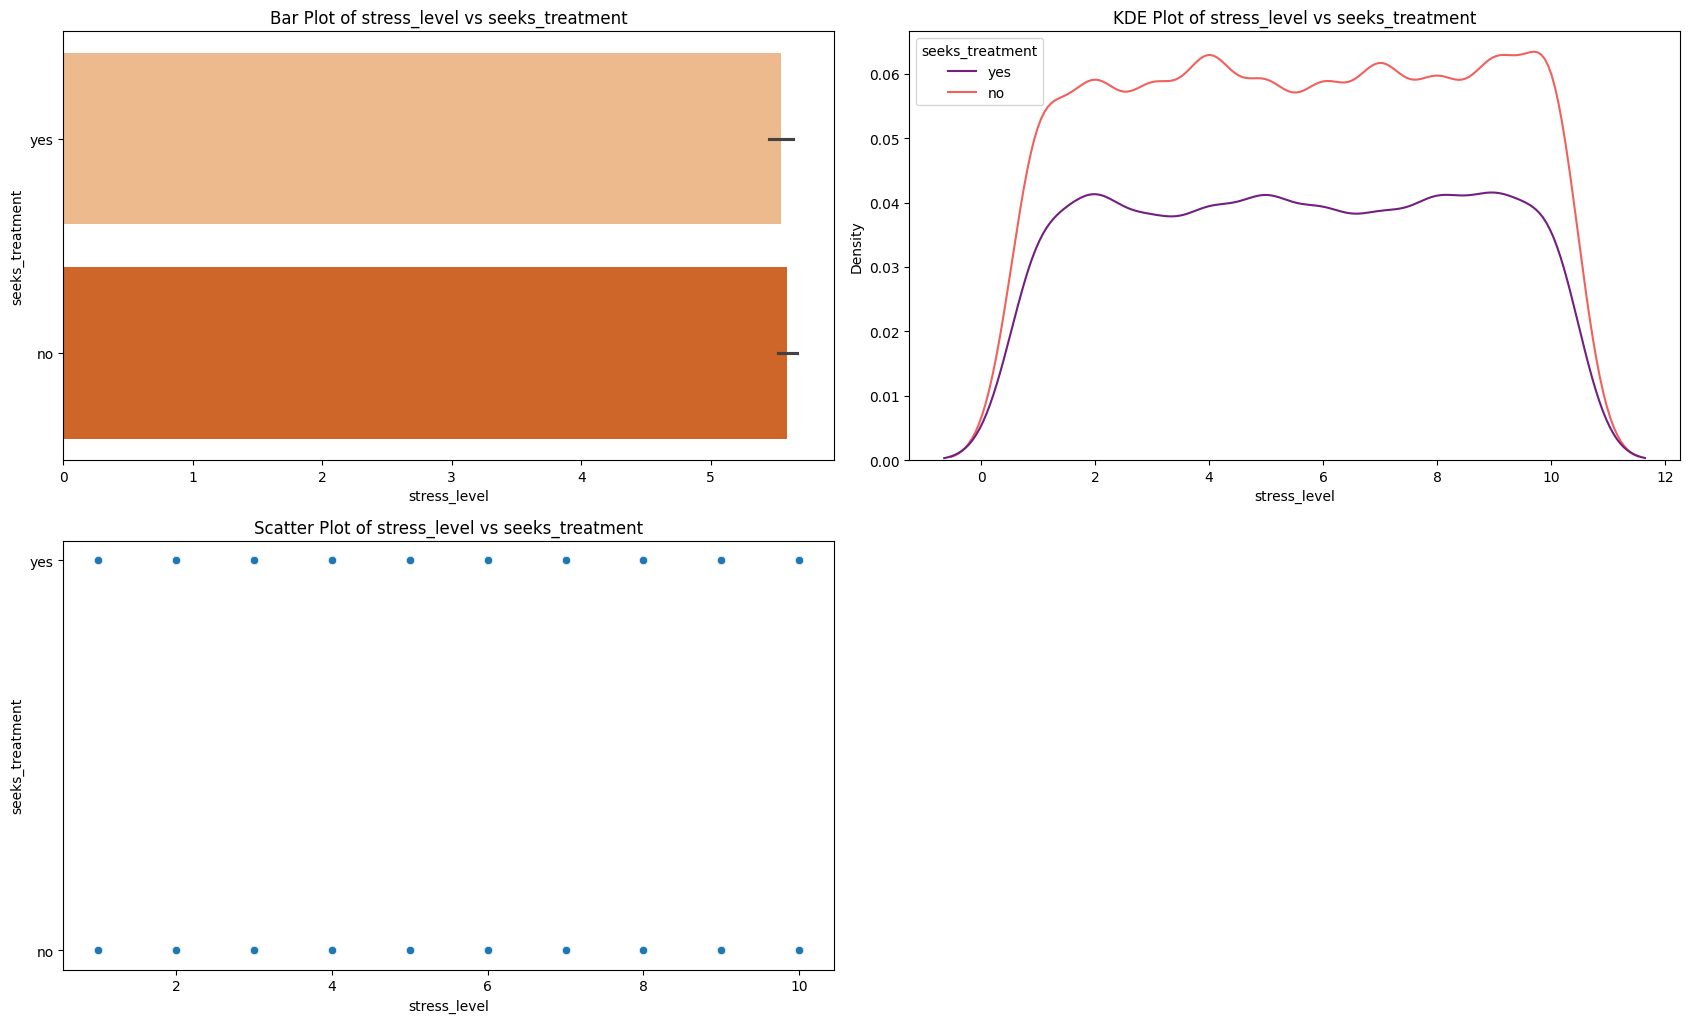

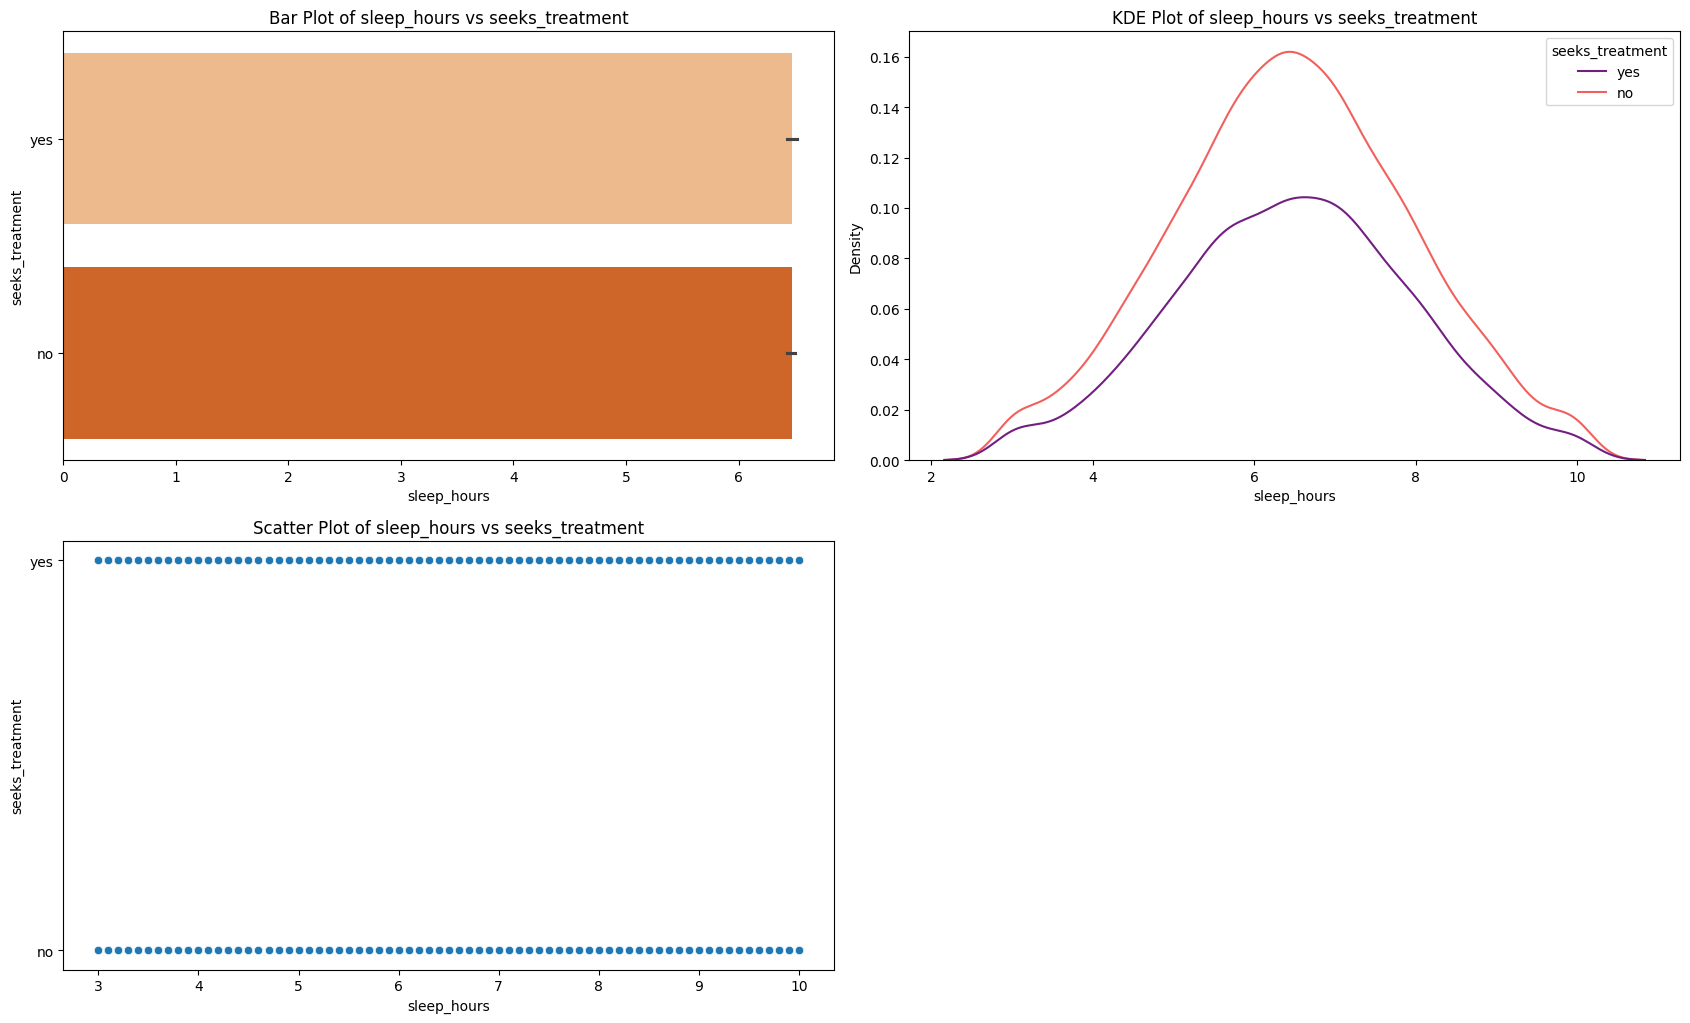

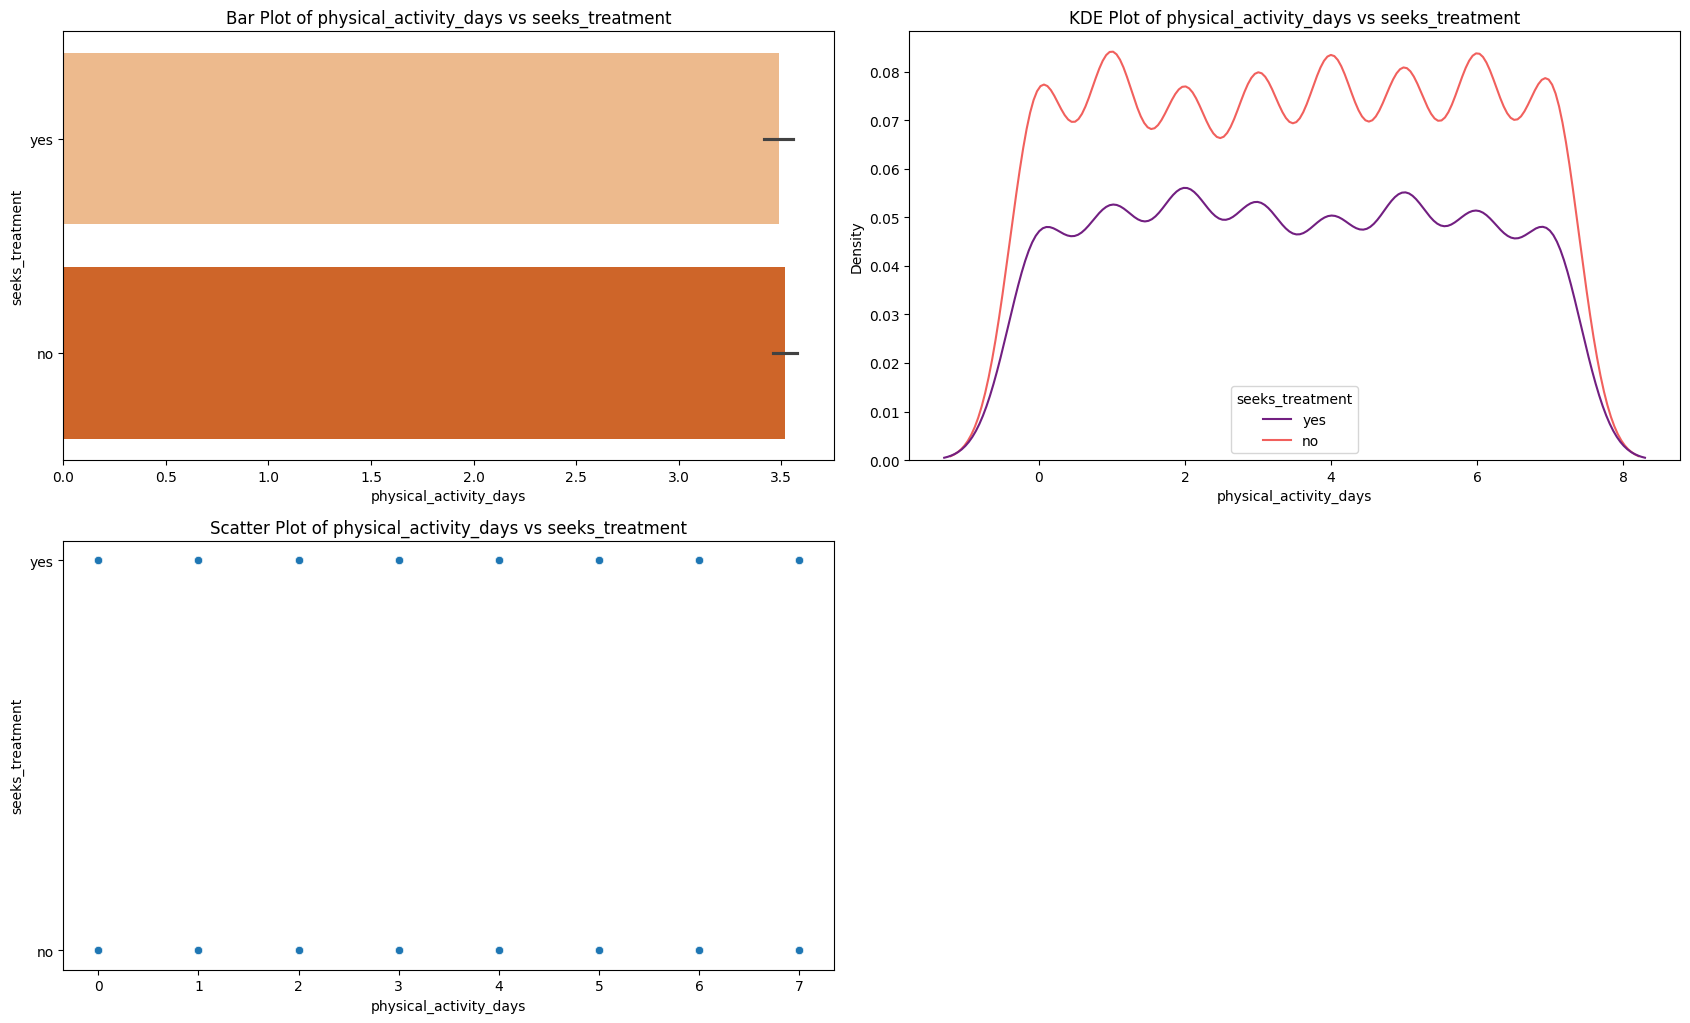

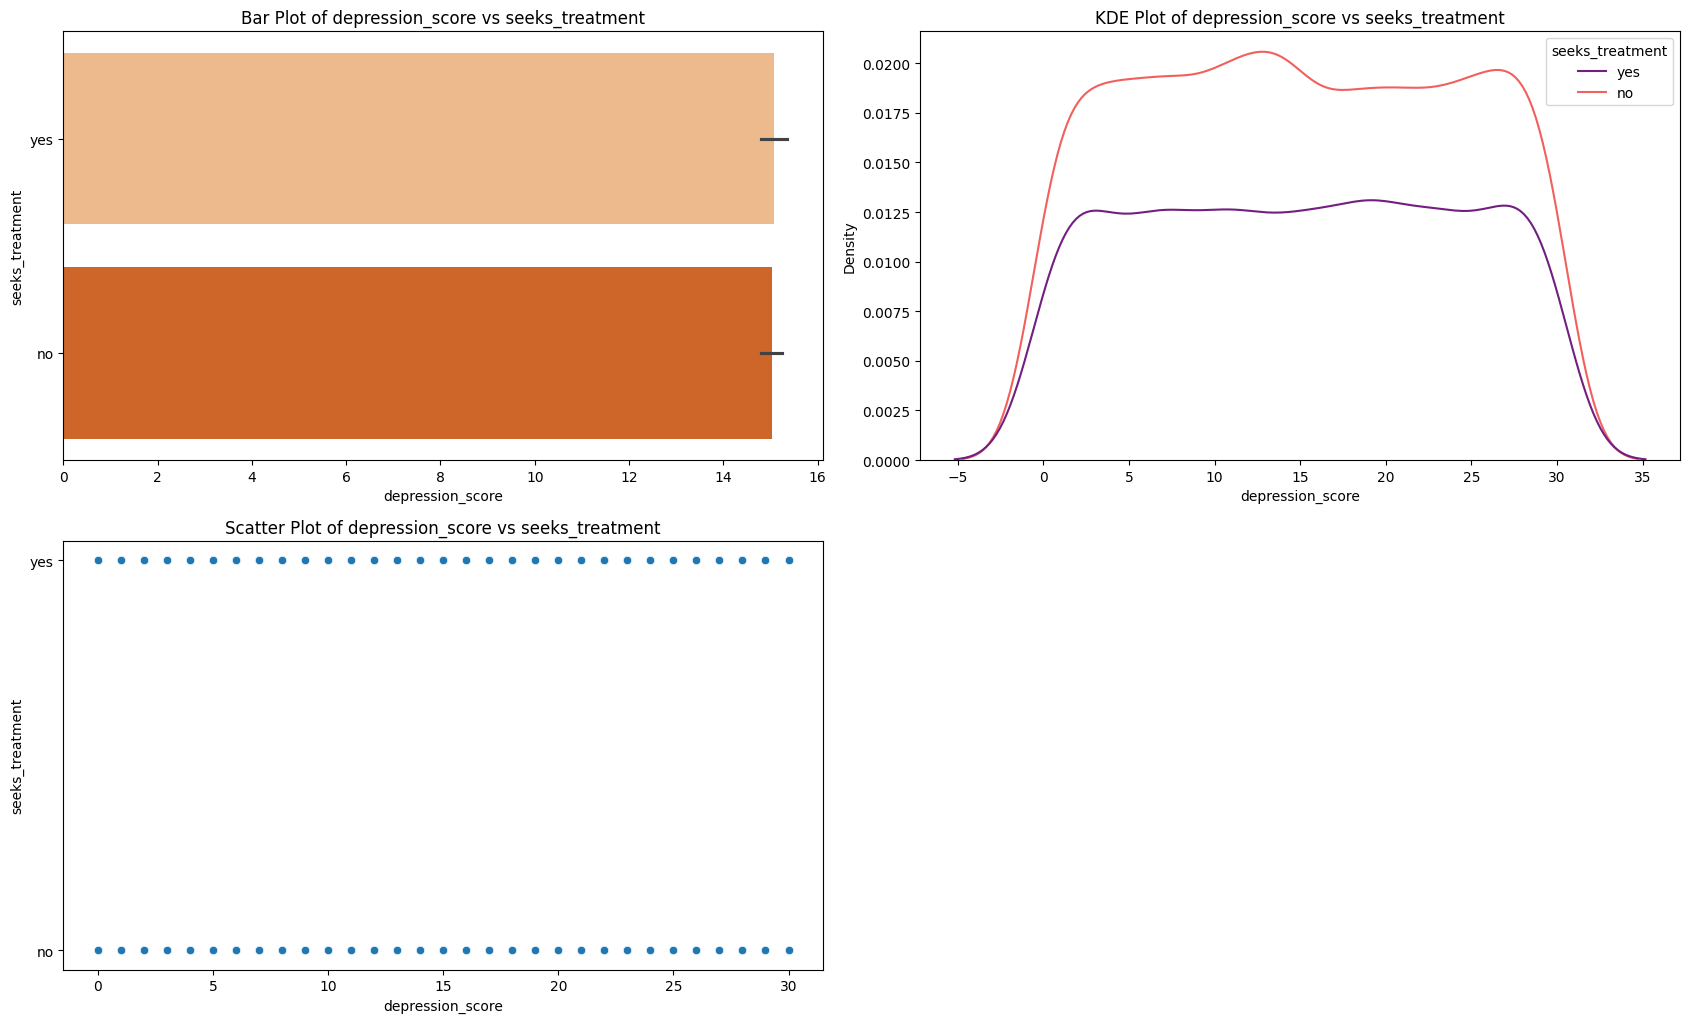

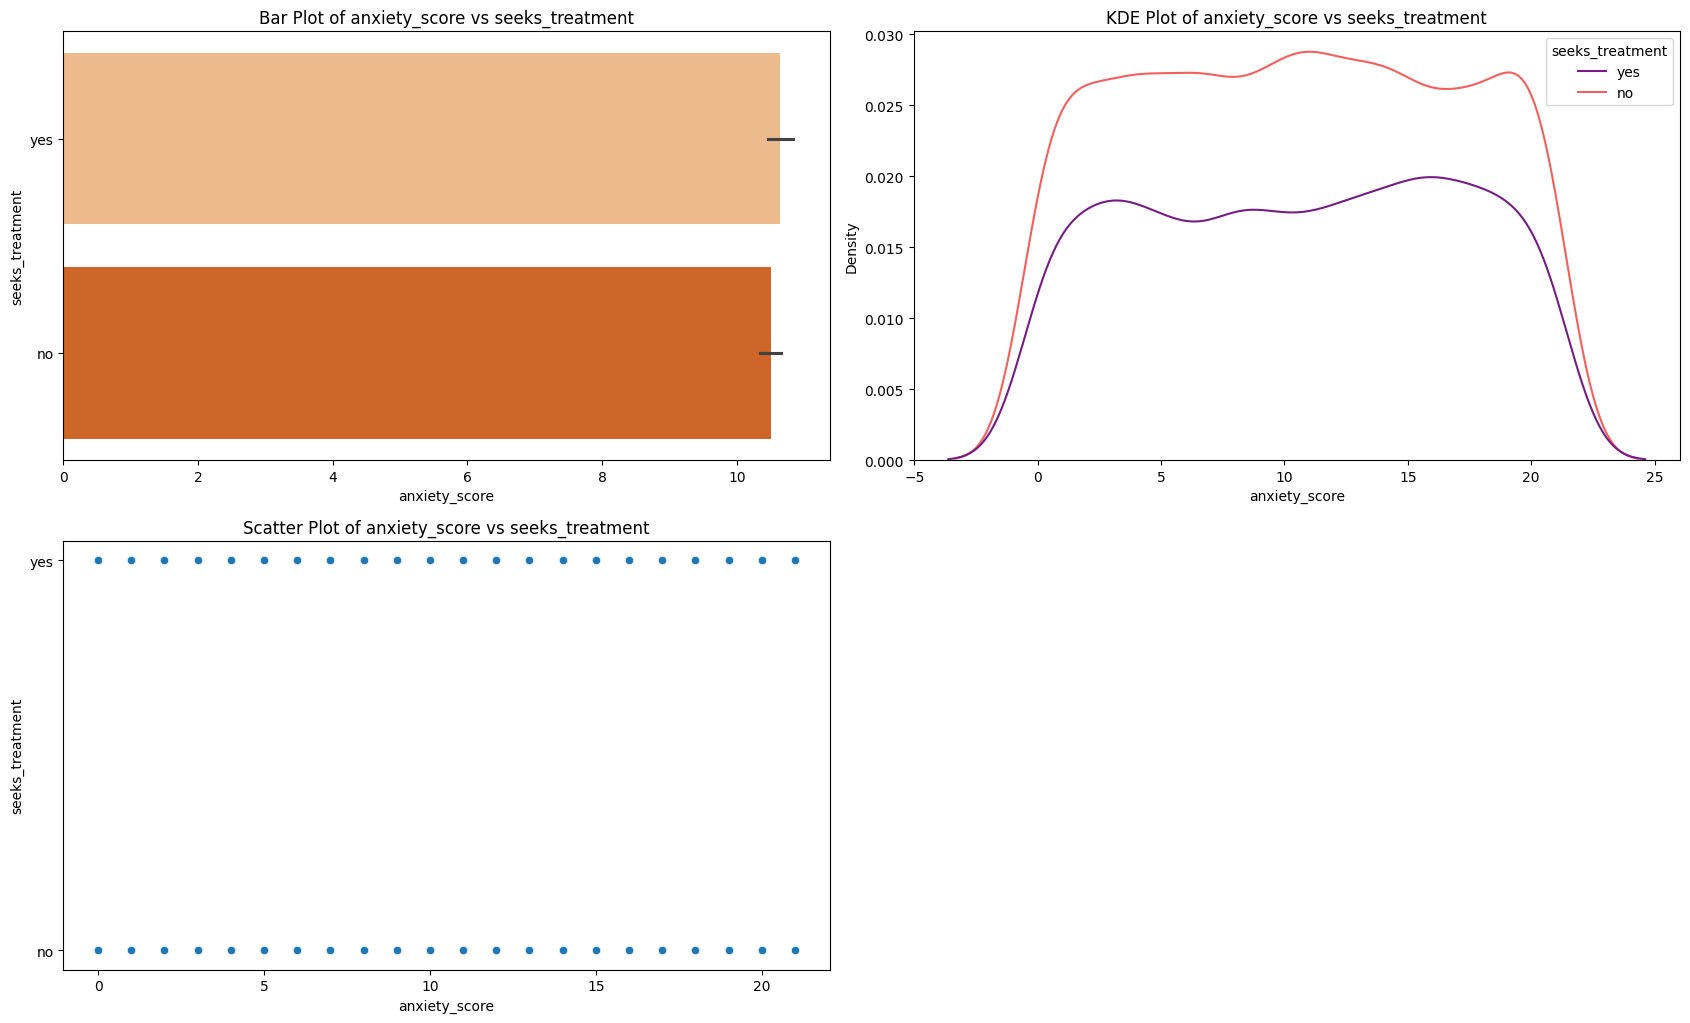

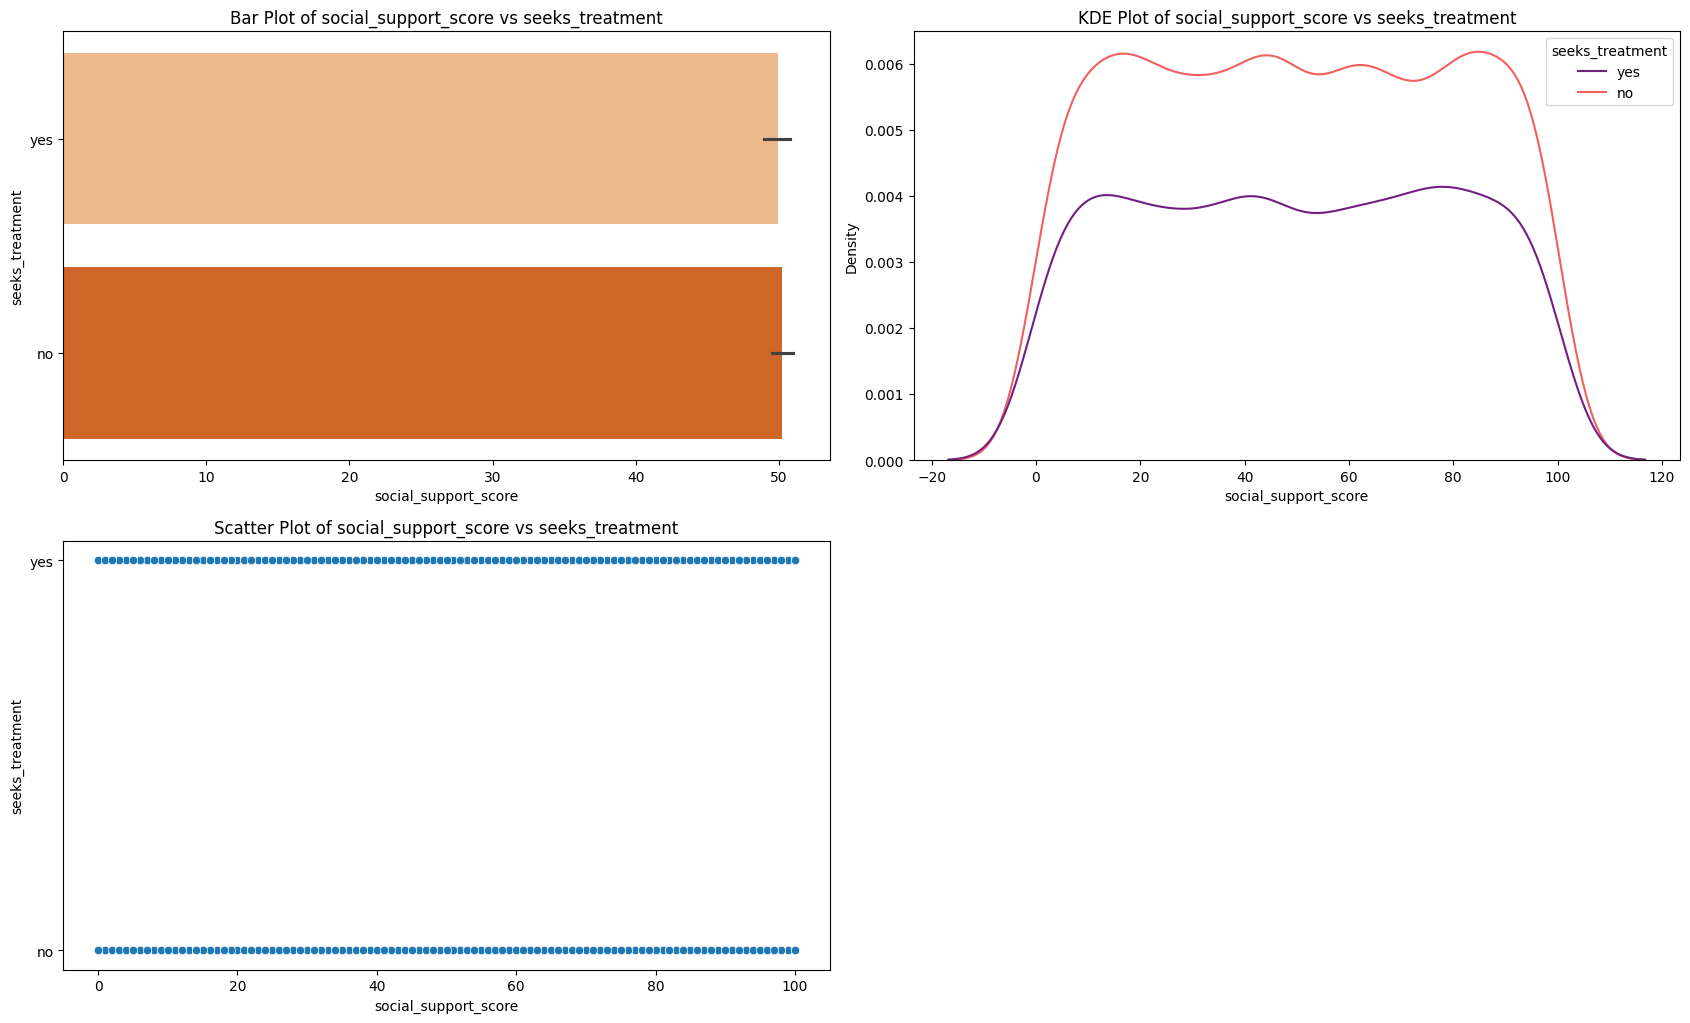

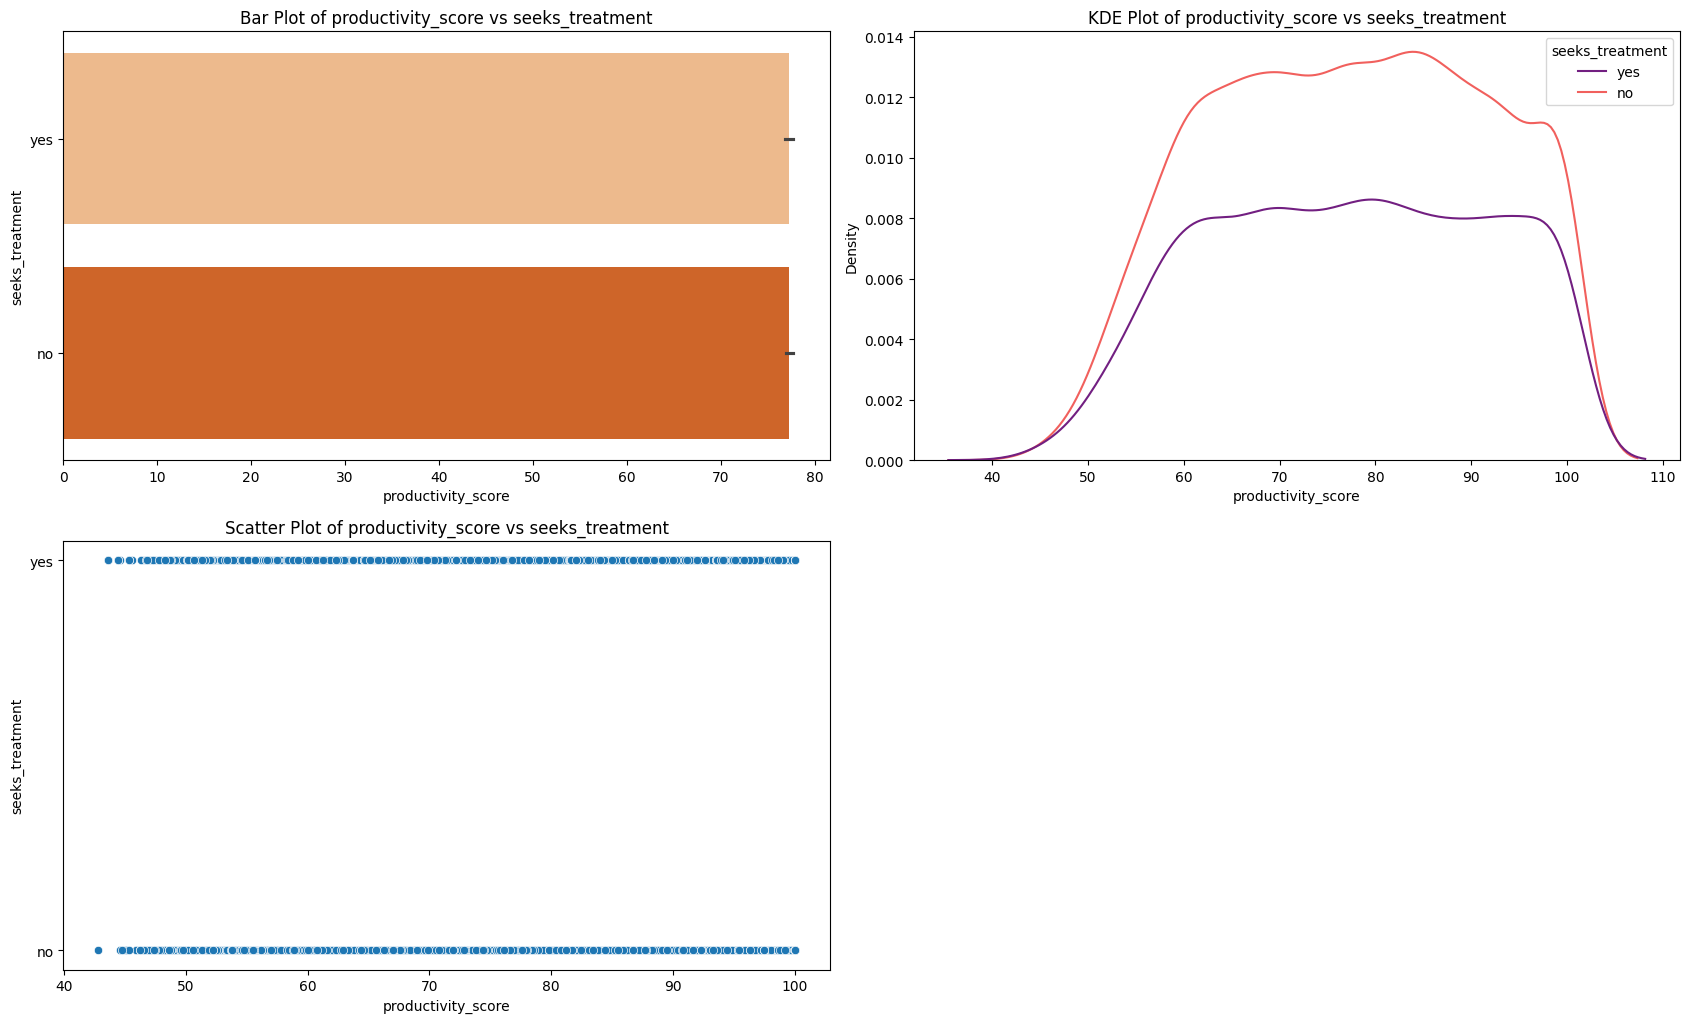

In [40]:
cat_num(df,num_df, "seeks_treatment")

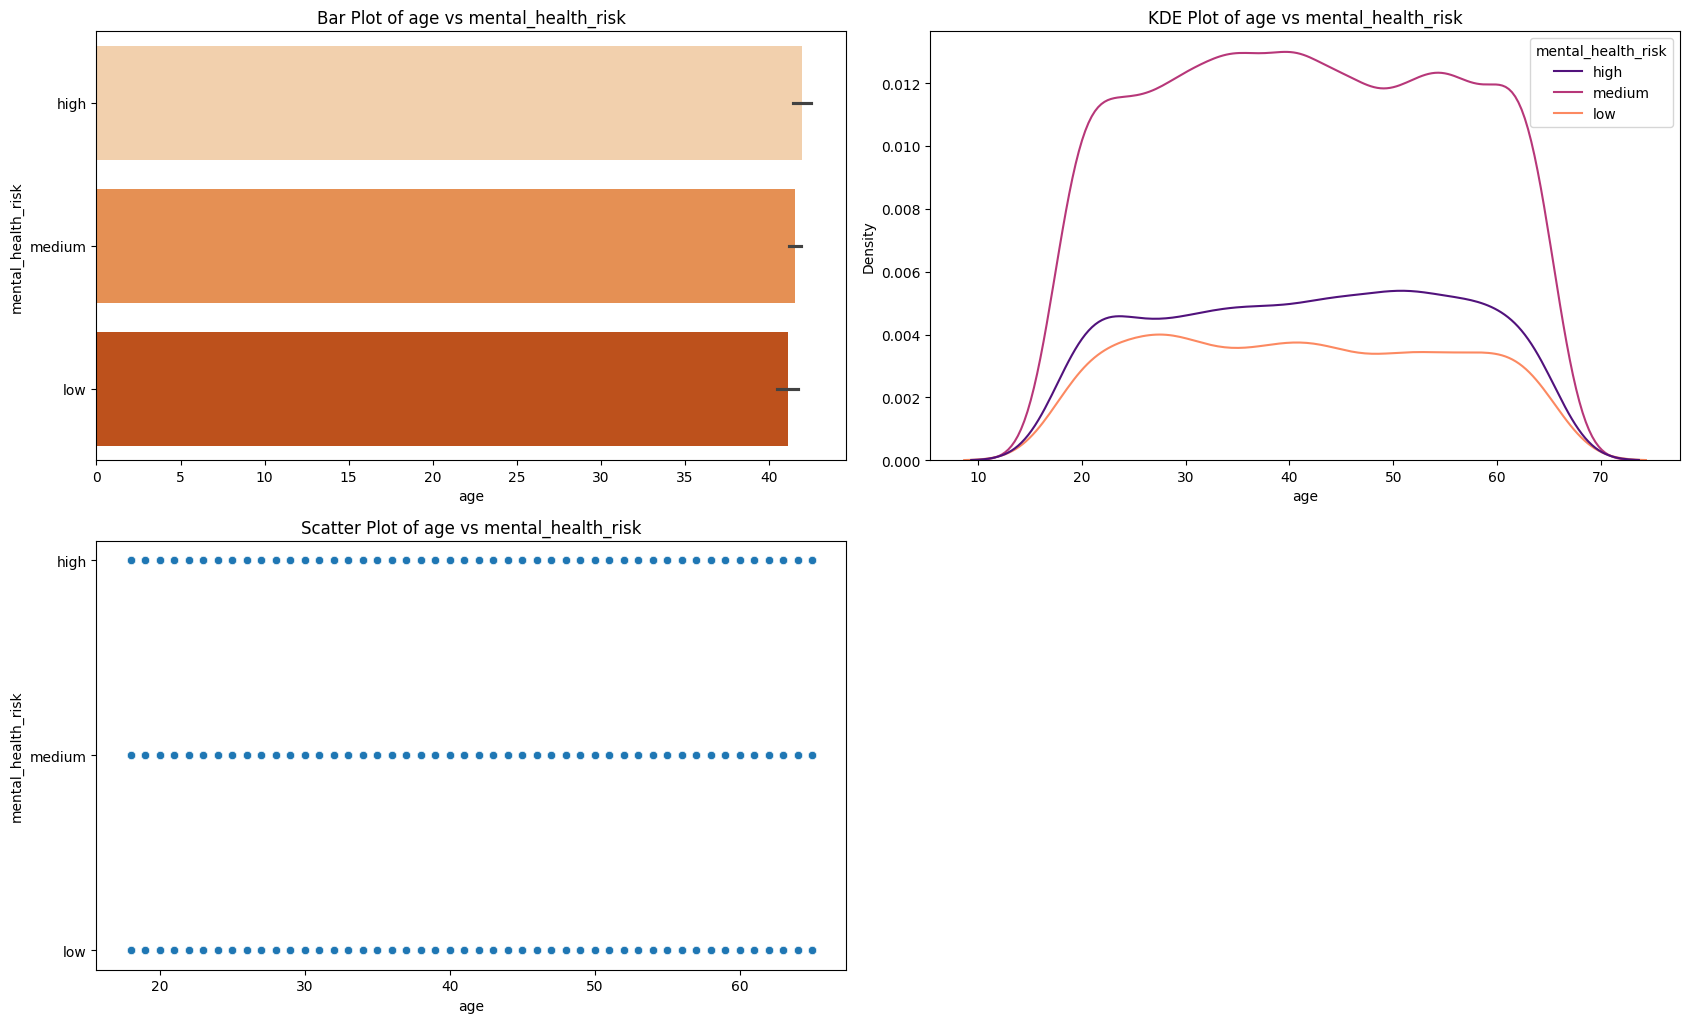

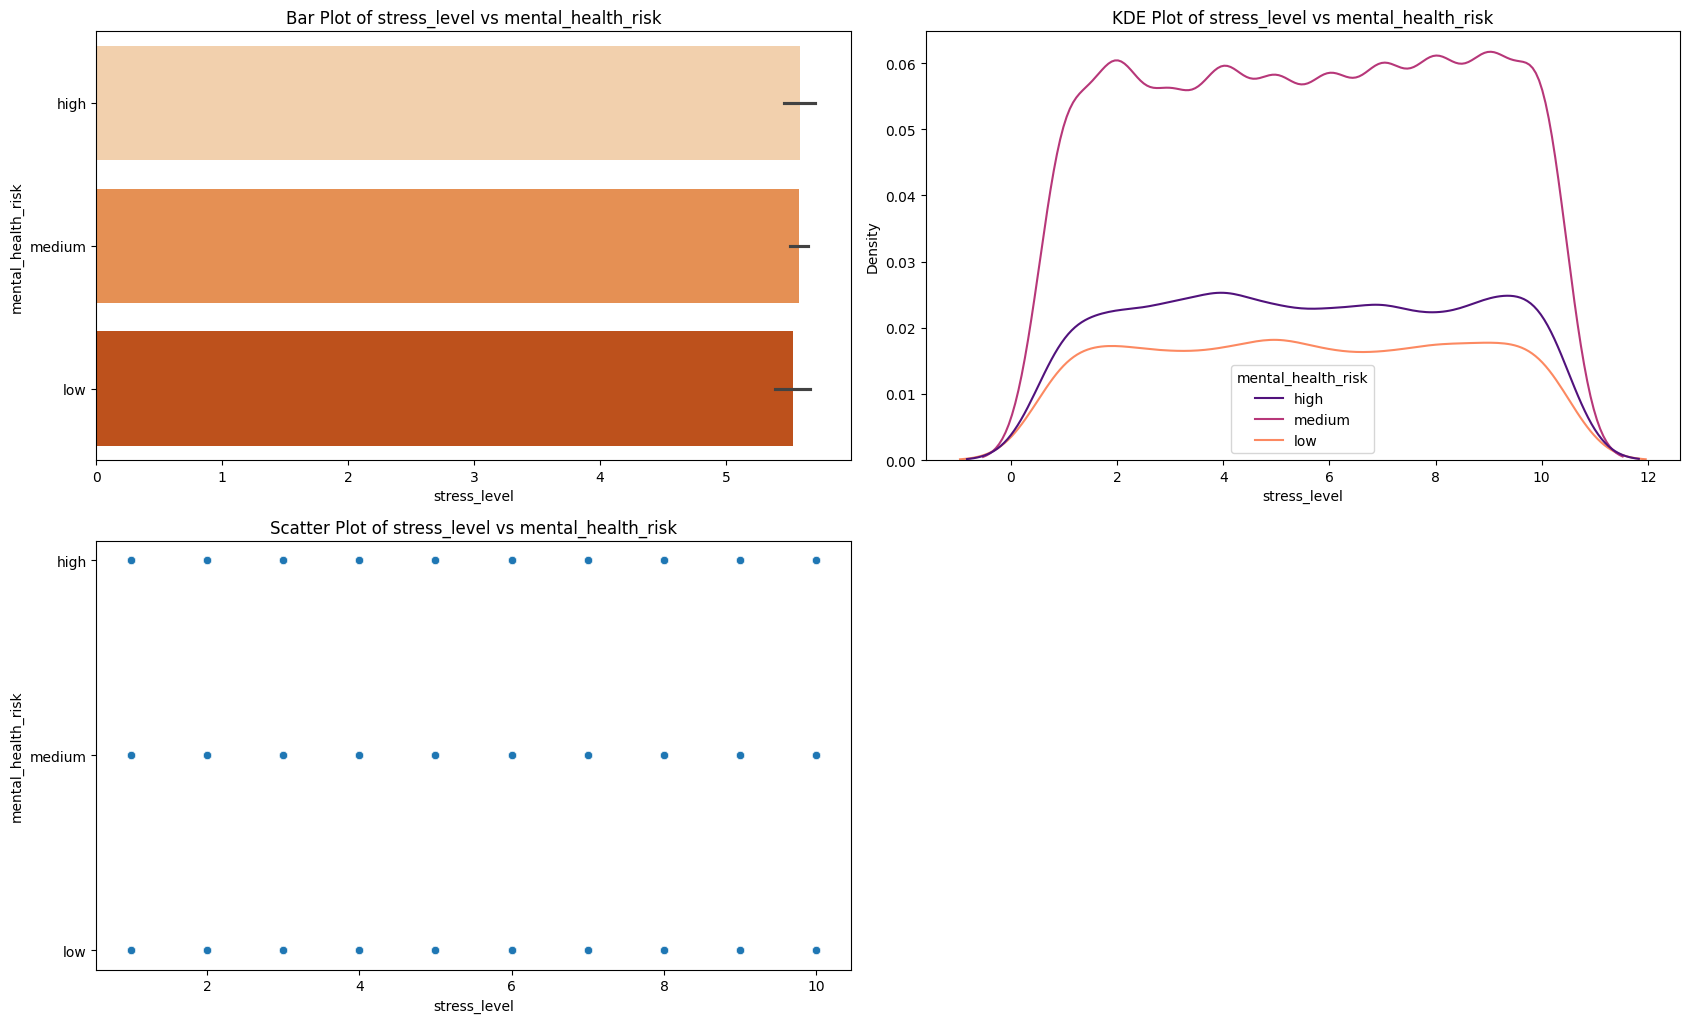

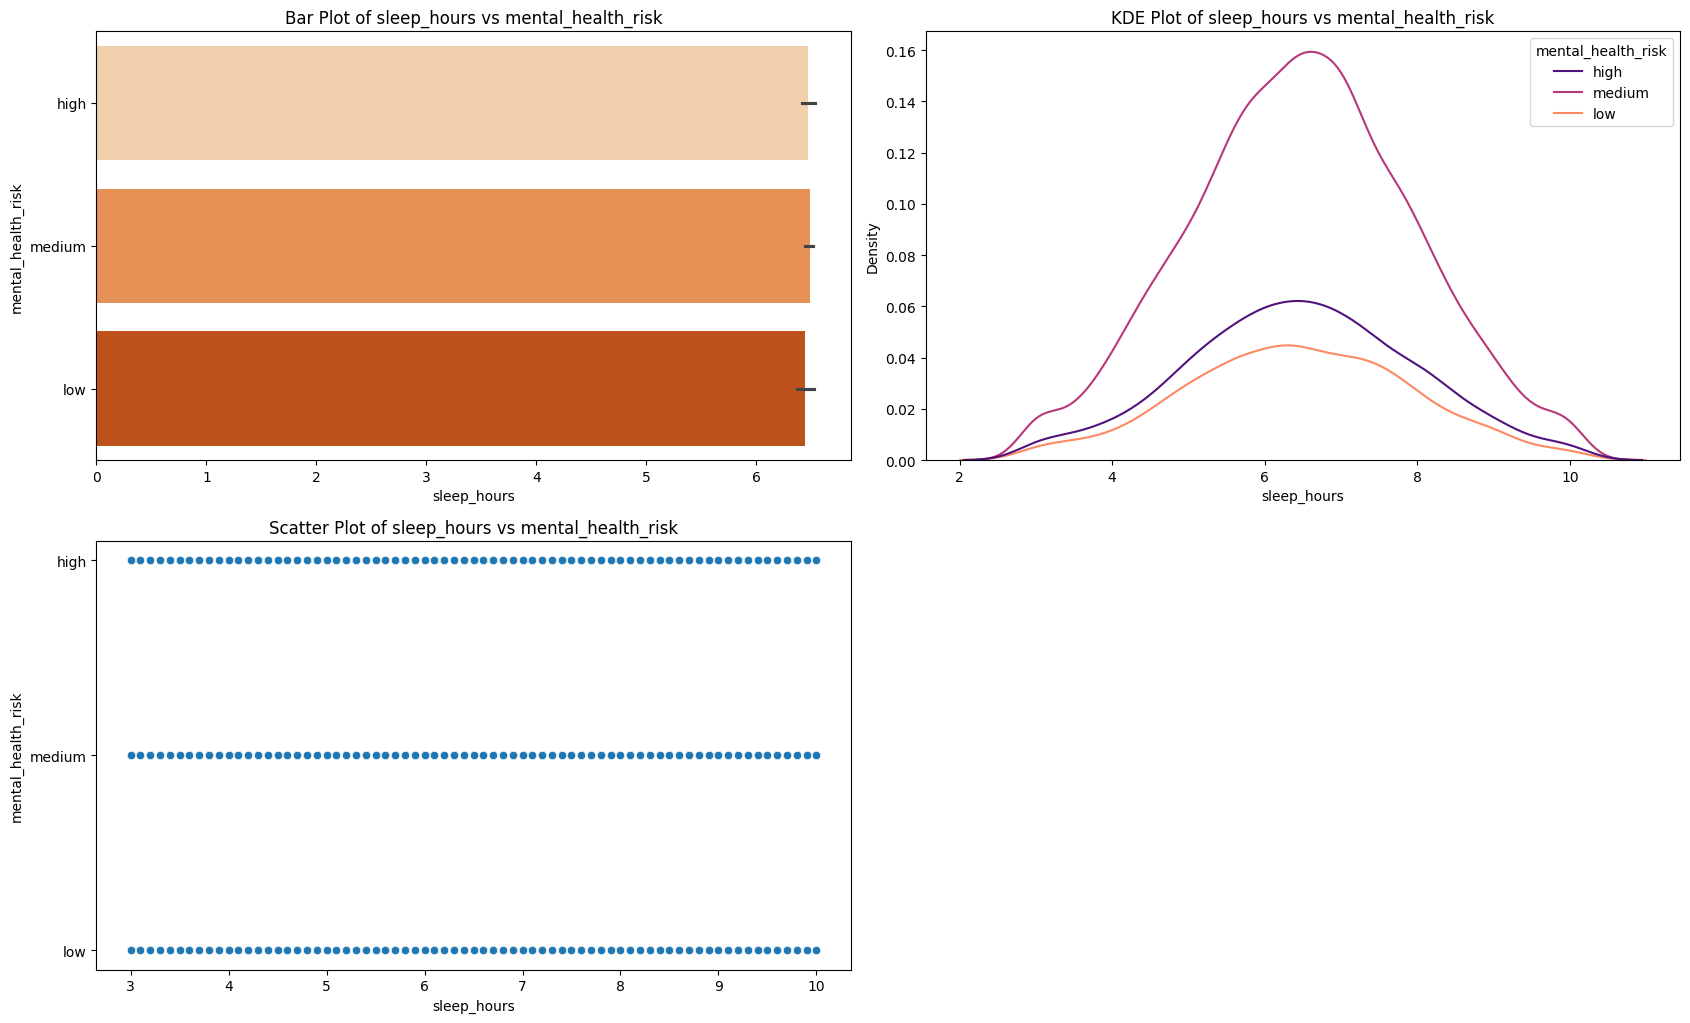

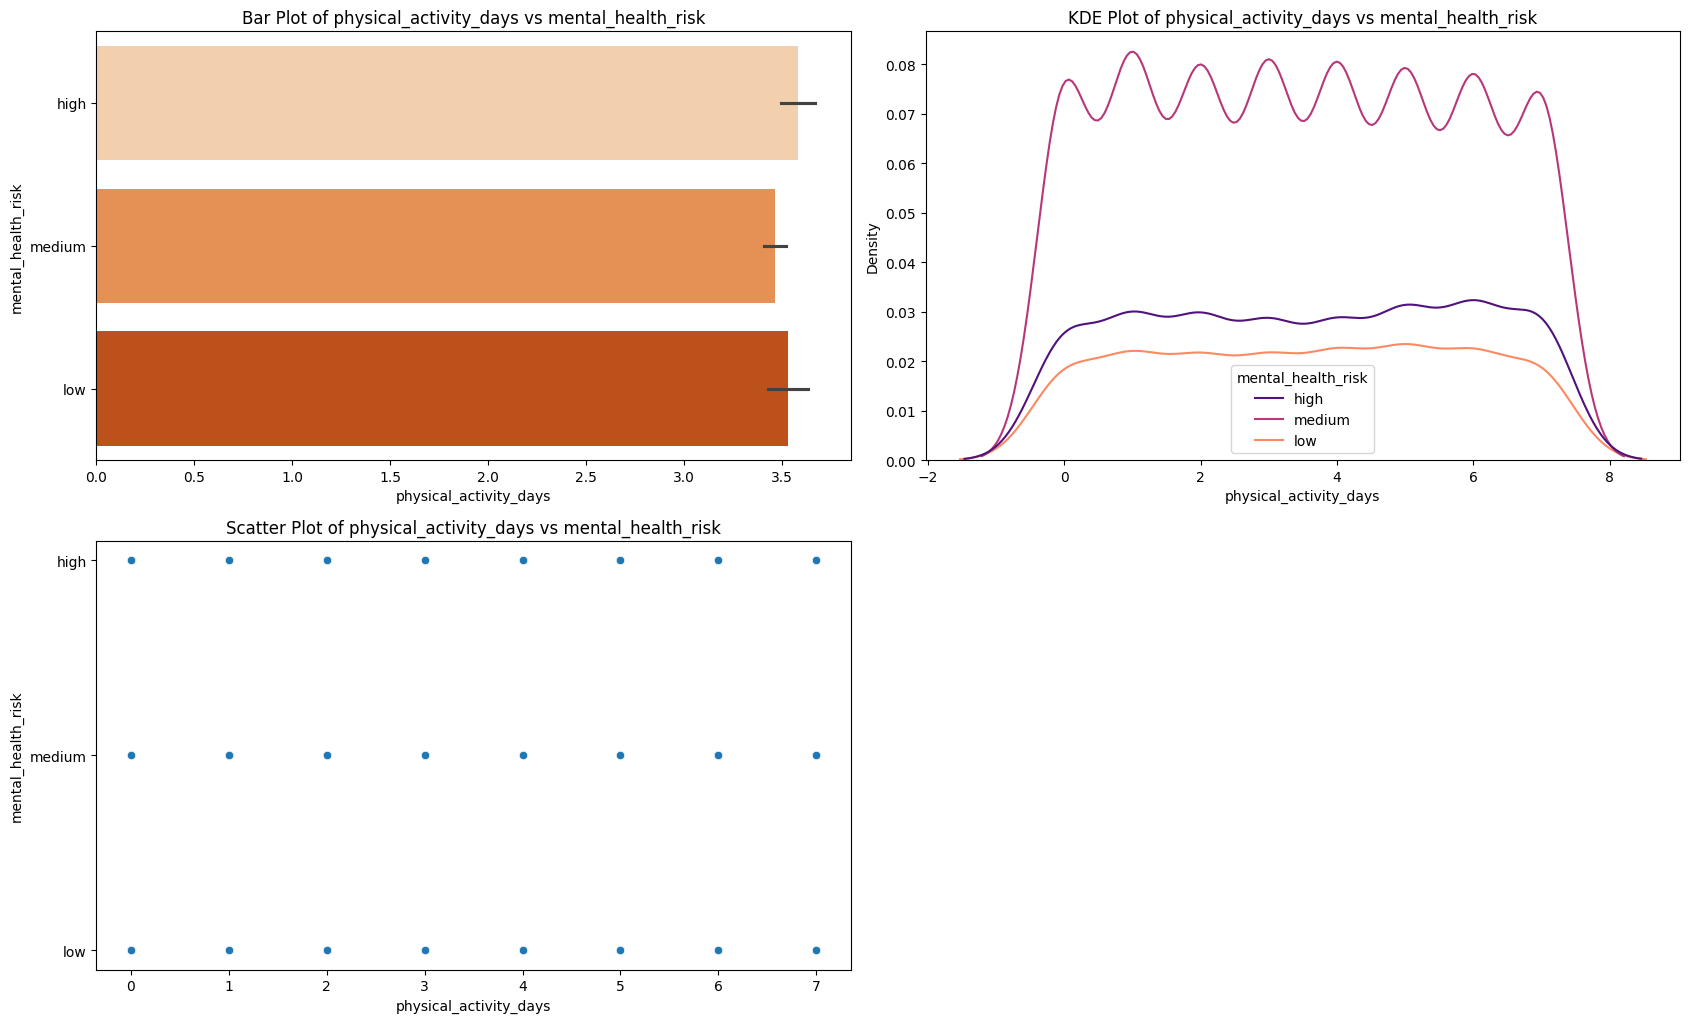

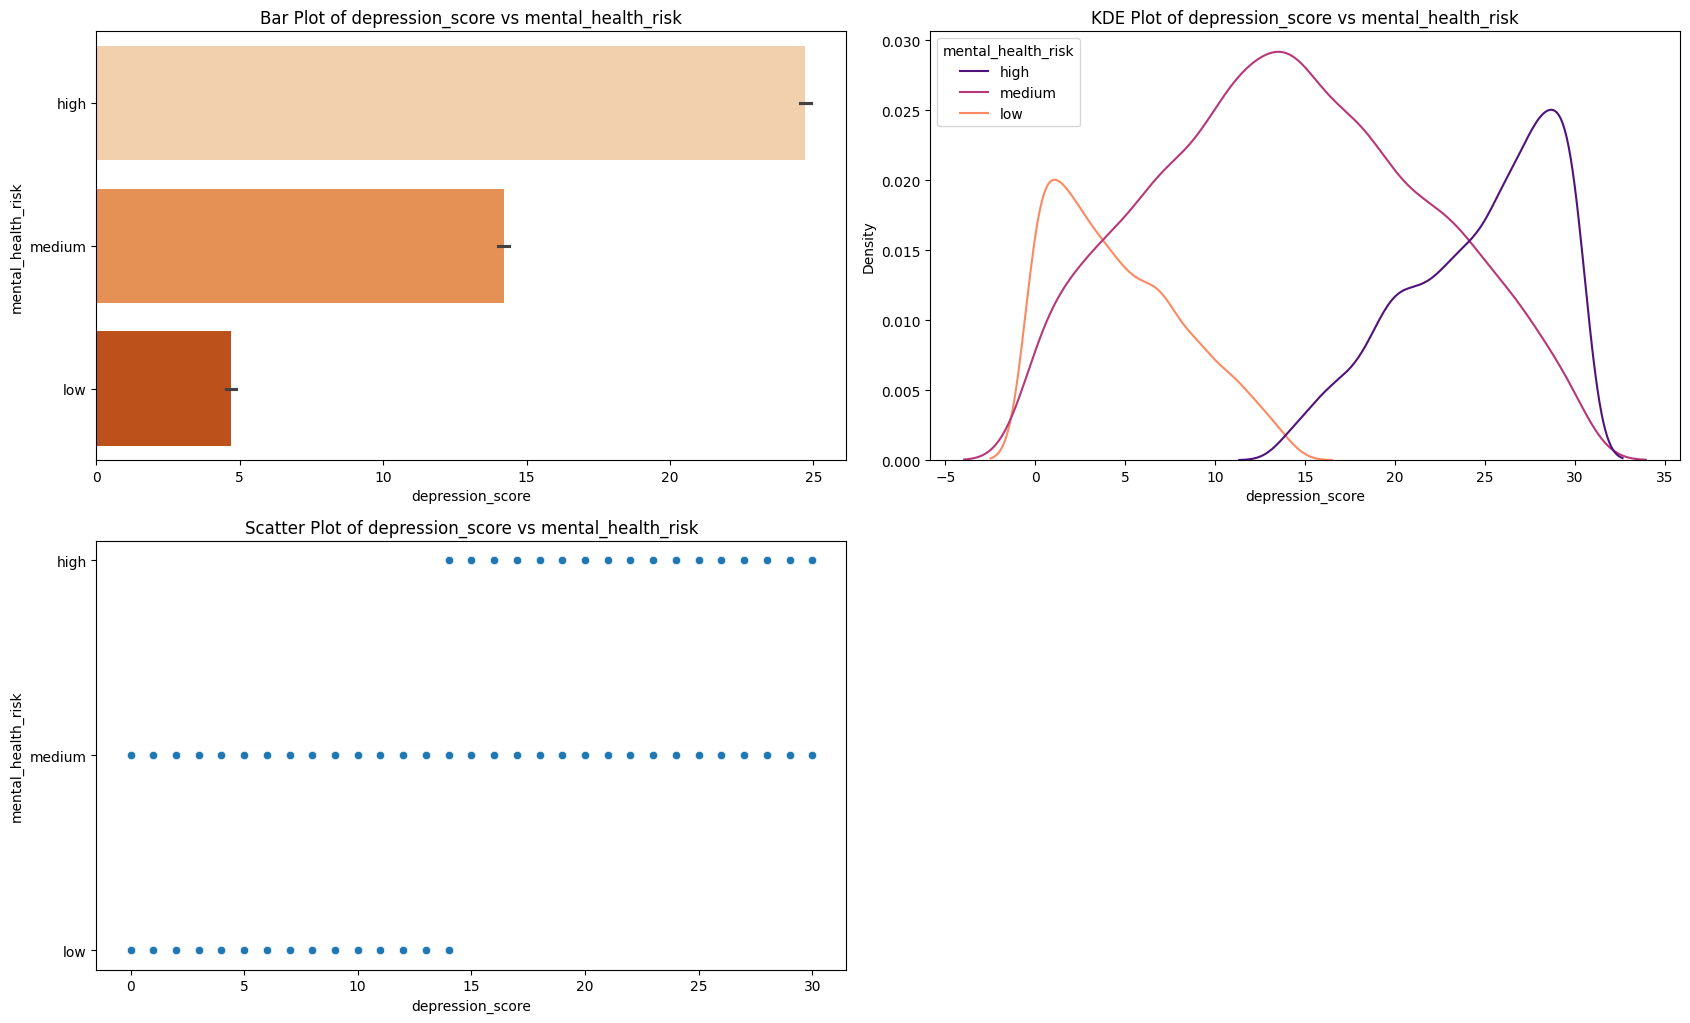

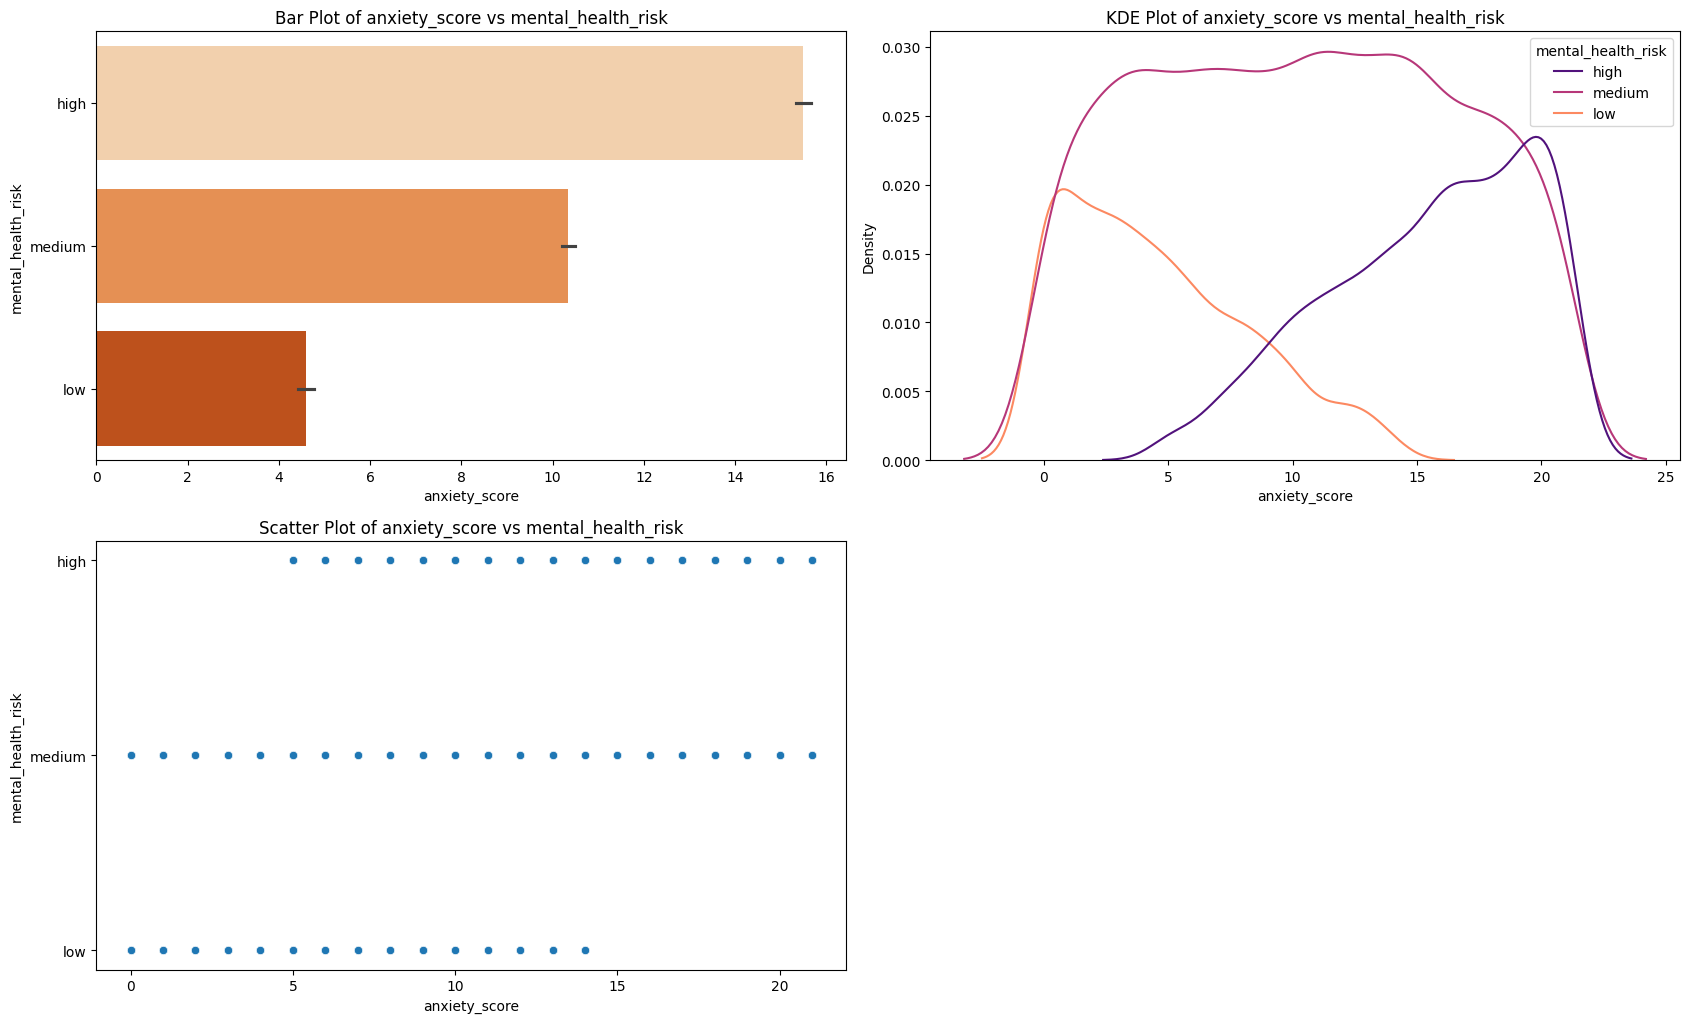

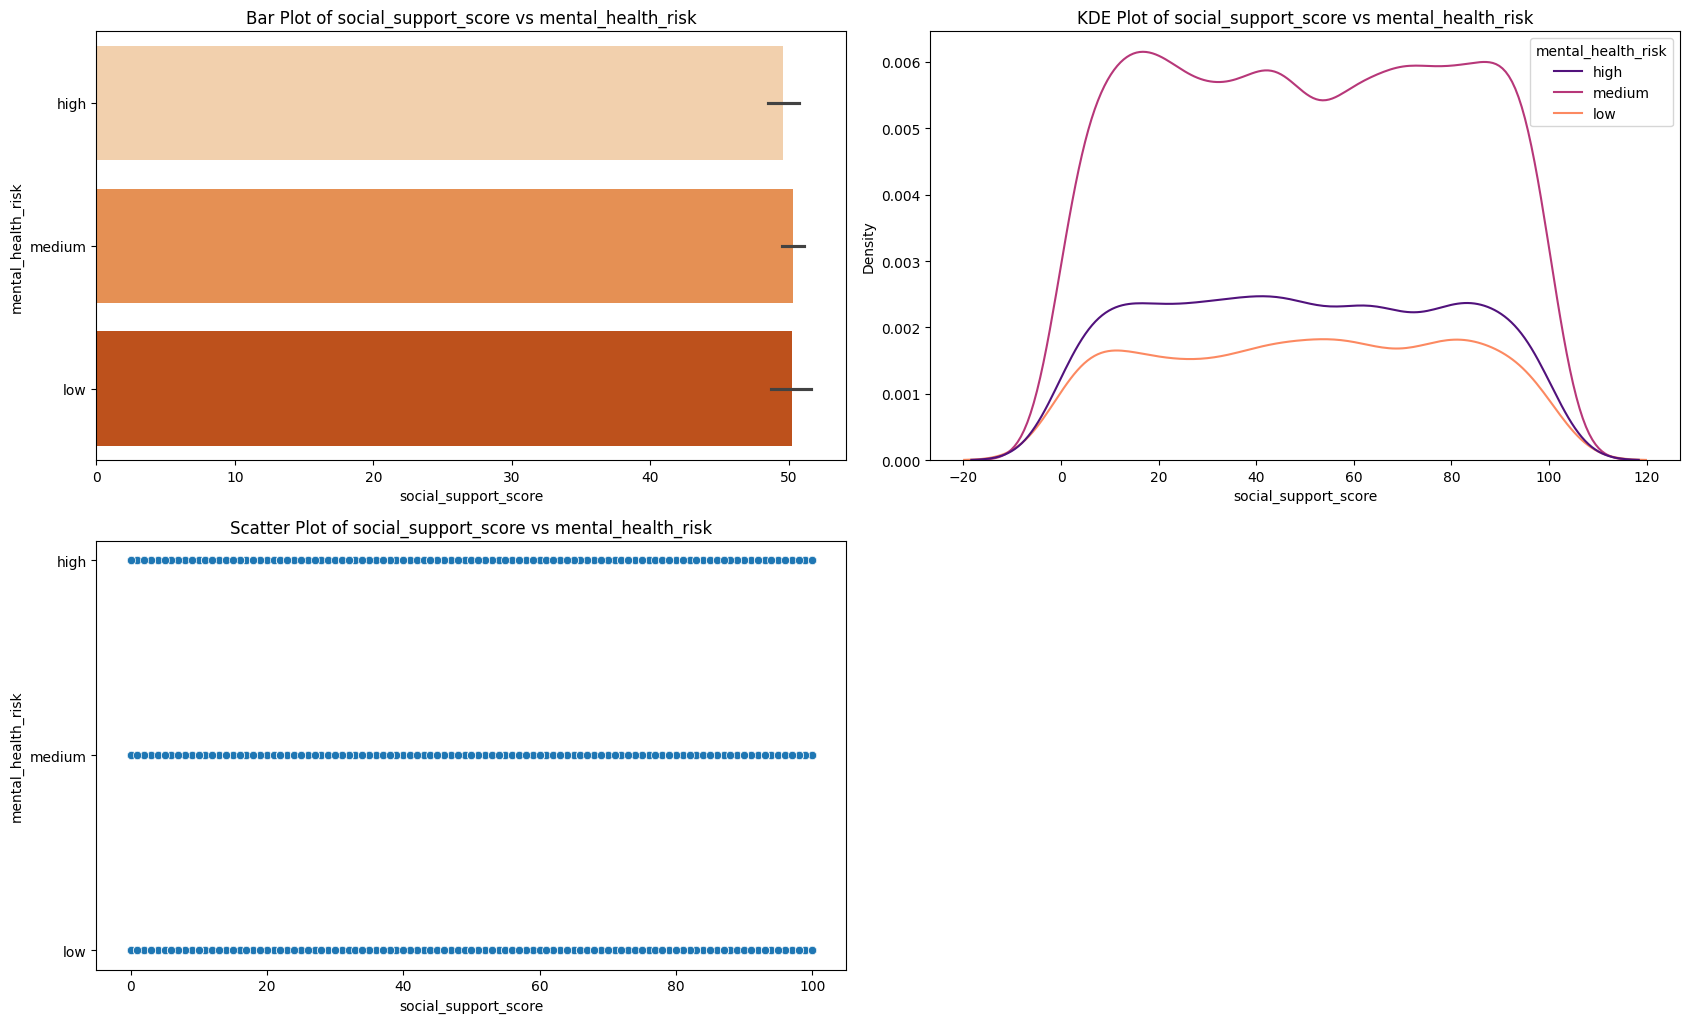

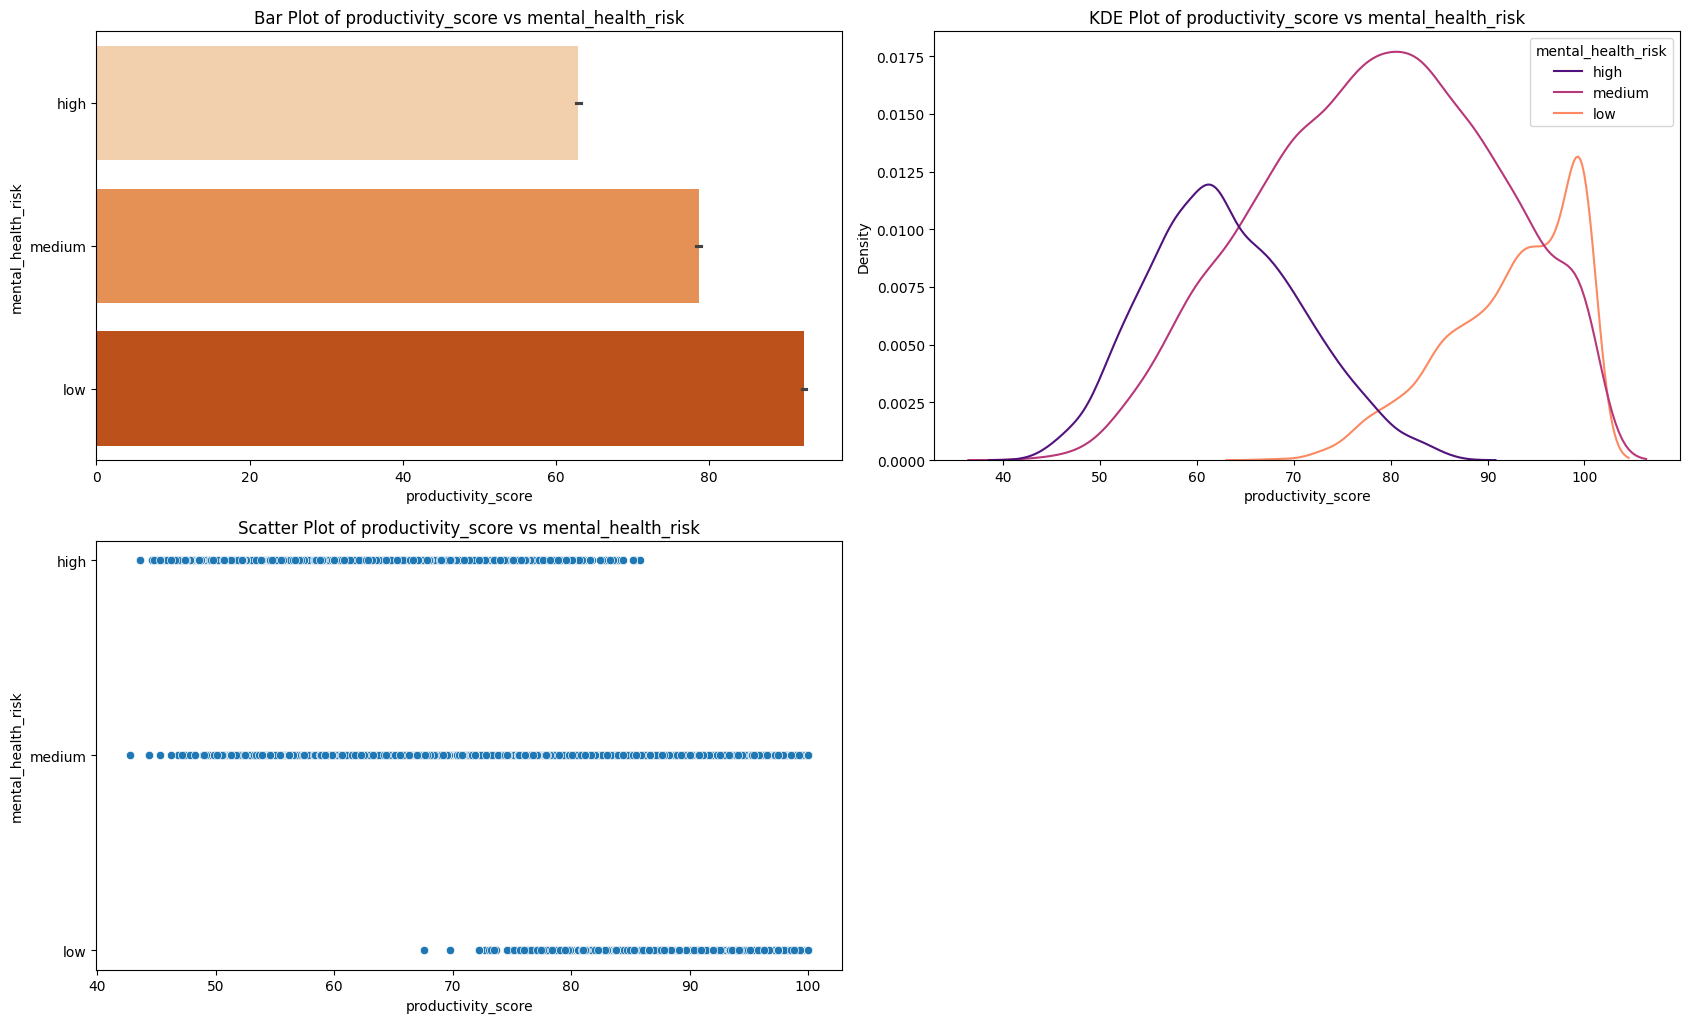

In [41]:
cat_num(df,num_df, "mental_health_risk")

Categorical vs Categorical

In [42]:
def cat_cat(df , col1 , col2 , head = 10):
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    top_values = contingency_table.sum(axis=1).nlargest(head).index
    contingency_table = contingency_table.loc[top_values]
    
    contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100 # Convert contingency table to percentages
    print(contingency_table_percent)

    plt.figure(figsize = (15,6))


    #Heat Map
    plt.subplot(1,2,2)
    sns.heatmap(contingency_table_percent , annot = True , fmt = '.2f' , cmap = 'coolwarm' , cbar_kws = {'label' : 'Percentage'})
    plt.xlabel(f'{col2}')
    plt.ylabel(f'{col1}')
    plt.title(f'Heatmap of {col1} vs {col2}')
    plt.show()

employment_status   employed  self-employed    student  unemployed
gender                                                            
male               58.218126      10.621023  20.956770   10.204082
female             59.165358      10.590083  19.878842   10.365717
non-binary         58.653846       8.269231  21.153846   11.923077
prefer not to say  58.583691       9.871245  19.742489   11.802575


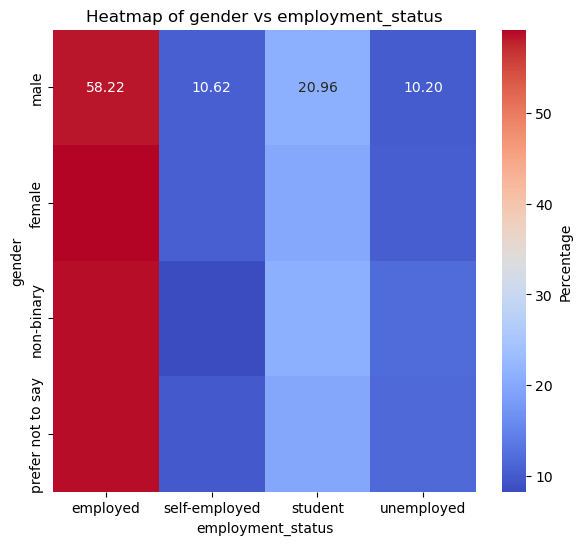

In [43]:
cat_cat(df, "gender","employment_status")

work_environment      hybrid    on-site     remote
gender                                            
male               20.057055  49.462366  30.480579
female             18.779448  51.492035  29.728517
non-binary         20.192308  49.038462  30.769231
prefer not to say  19.527897  51.502146  28.969957


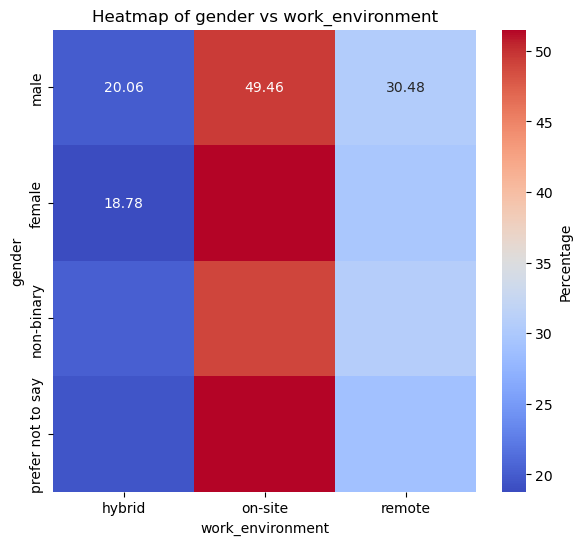

In [44]:

cat_cat(df, "gender","work_environment")

mental_health_history         no        yes
gender                                     
male                   69.958306  30.041694
female                 69.172089  30.827911
non-binary             69.423077  30.576923
prefer not to say      72.317597  27.682403


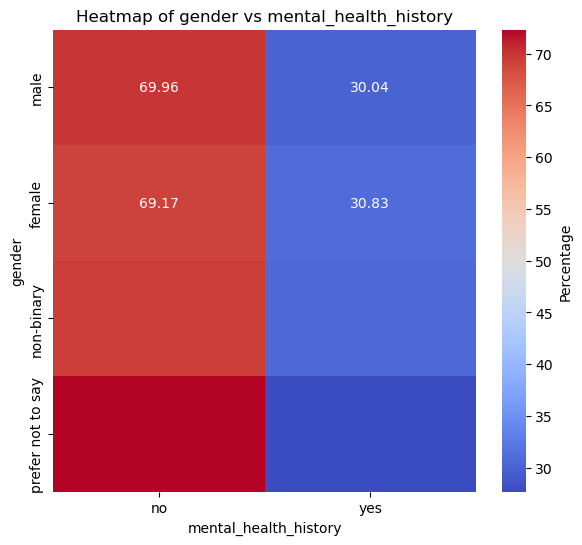

In [45]:
cat_cat(df, "gender","mental_health_history")

seeks_treatment           no        yes
gender                                 
male               59.885890  40.114110
female             59.748710  40.251290
non-binary         64.038462  35.961538
prefer not to say  61.587983  38.412017


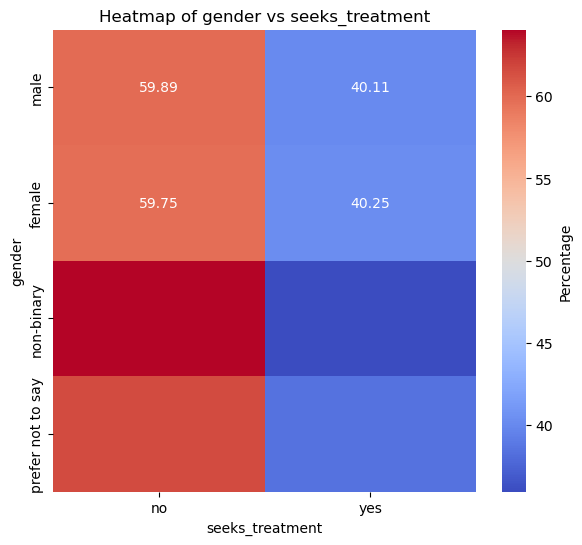

In [46]:
cat_cat(df, "gender","seeks_treatment")


mental_health_risk       high        low     medium
gender                                             
male                24.050911  16.831249  59.117841
female              23.132152  17.971730  58.896118
non-binary          25.000000  17.692308  57.307692
prefer not to say   24.034335  16.952790  59.012876


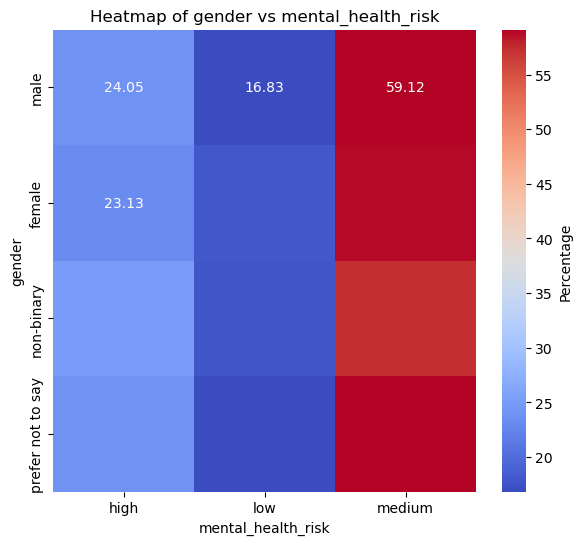

In [47]:
cat_cat(df, "gender","mental_health_risk")

work_environment      hybrid    on-site     remote
employment_status                                 
employed           19.887526  50.221541  29.890934
student            18.306412  50.122369  31.571219
self-employed      18.564593  52.822967  28.612440
unemployed         20.306513  49.904215  29.789272


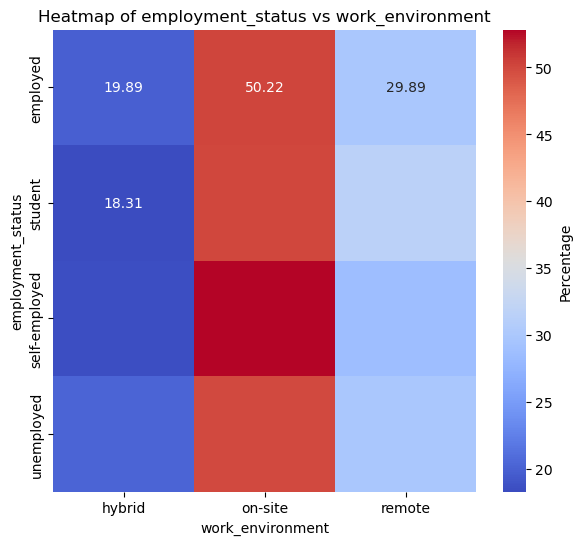

In [48]:
cat_cat(df,"employment_status","work_environment")


mental_health_history         no        yes
employment_status                          
employed               70.006817  29.993183
student                69.114048  30.885952
self-employed          69.569378  30.430622
unemployed             69.157088  30.842912


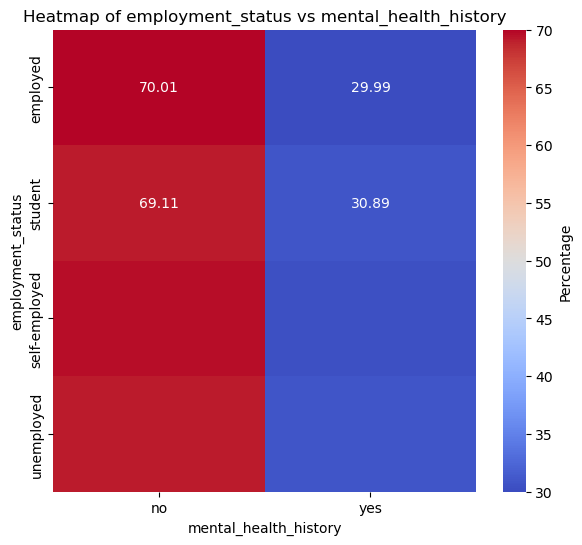

In [49]:
cat_cat(df,"employment_status","mental_health_history")

seeks_treatment           no        yes
employment_status                      
employed           59.884117  40.115883
student            60.450318  39.549682
self-employed      59.234450  40.765550
unemployed         61.685824  38.314176


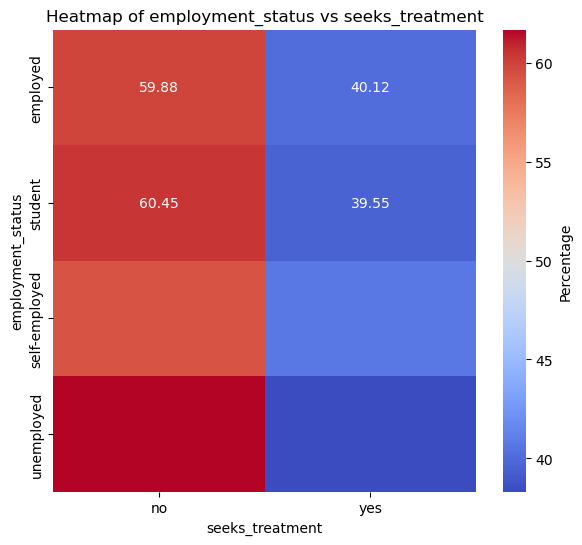

In [50]:
cat_cat(df,"employment_status","seeks_treatment")

mental_health_risk       high        low     medium
employment_status                                  
employed            23.909339  17.331288  58.759373
student             24.865394  17.180617  57.953989
self-employed       22.488038  19.138756  58.373206
unemployed          21.360153  16.379310  62.260536


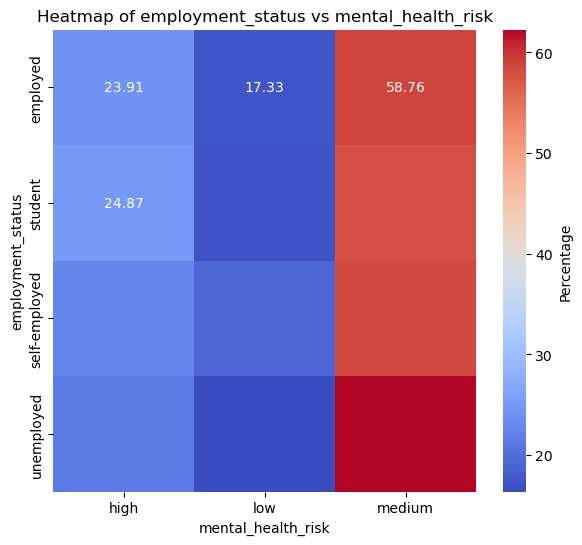

In [51]:
cat_cat(df,"employment_status","mental_health_risk")

mental_health_history         no        yes
work_environment                           
on-site                69.290246  30.709754
remote                 69.923563  30.076437
hybrid                 70.364664  29.635336


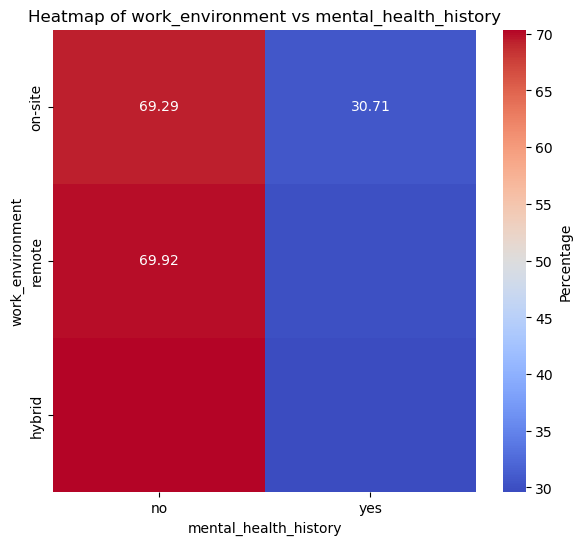

In [52]:
cat_cat(df,"work_environment", "mental_health_history")


seeks_treatment          no        yes
work_environment                      
on-site           60.388580  39.611420
remote            59.654370  40.345630
hybrid            60.143811  39.856189


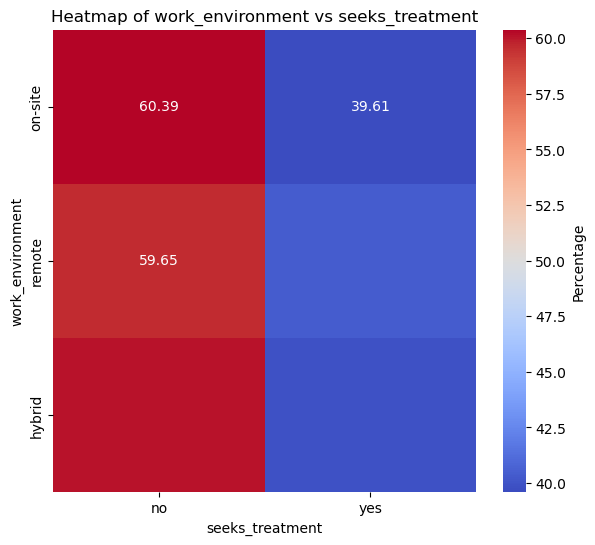

In [53]:

cat_cat(df,"work_environment", "seeks_treatment")

mental_health_risk       high        low     medium
work_environment                                   
on-site             22.660587  17.961935  59.377478
remote              24.891991  16.650050  58.457959
hybrid              24.499230  17.051875  58.448896


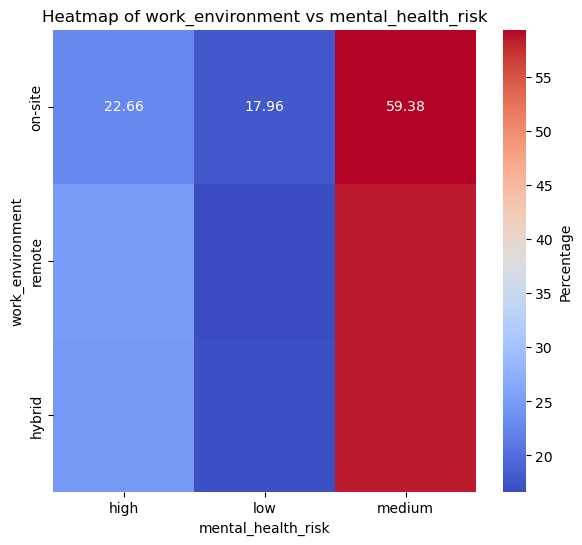

In [54]:
cat_cat(df,"work_environment", "mental_health_risk")


seeks_treatment               no        yes
mental_health_history                      
no                     59.649878  40.350122
yes                    61.200924  38.799076


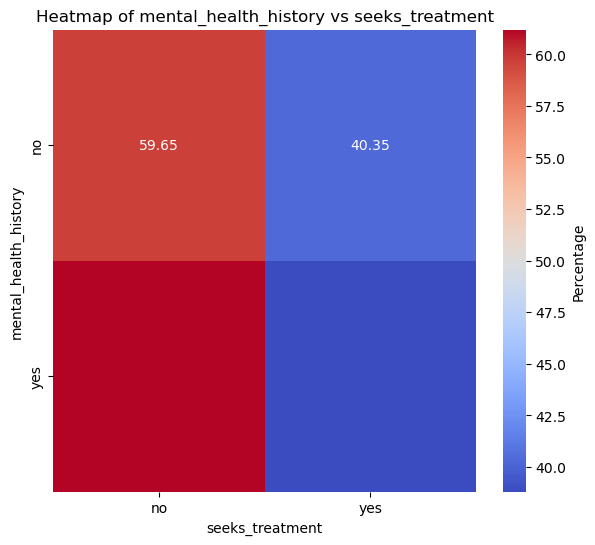

In [55]:
cat_cat(df, "mental_health_history", "seeks_treatment")

mental_health_risk          high        low     medium
mental_health_history                                 
no                     24.092409  17.362606  58.544985
yes                    22.764764  17.452986  59.782250


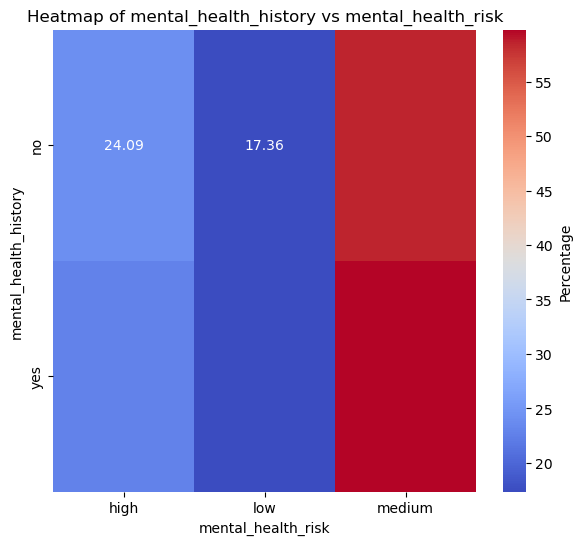

In [56]:
cat_cat(df, "mental_health_history", "mental_health_risk")

mental_health_risk       high        low     medium
seeks_treatment                                    
no                  22.737858  17.115768  60.146374
yes                 25.125376  17.803410  57.071214


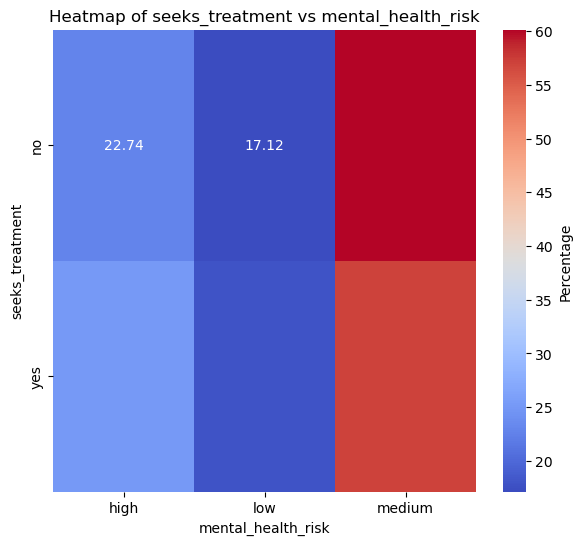

In [57]:

cat_cat(df,"seeks_treatment", "mental_health_risk")


Numerical vs Numerical

<Axes: xlabel='age', ylabel='stress_level'>

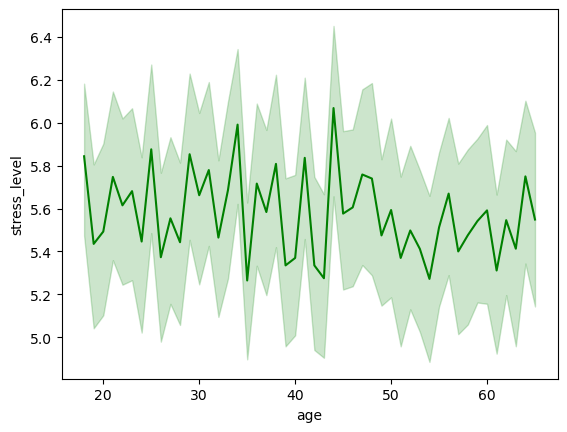

In [58]:
sns.lineplot(data= df, x="age", y="stress_level", color="green")

observation:

we can say mid age peoples like 45 has the highest stress level

<Axes: xlabel='age', ylabel='sleep_hours'>

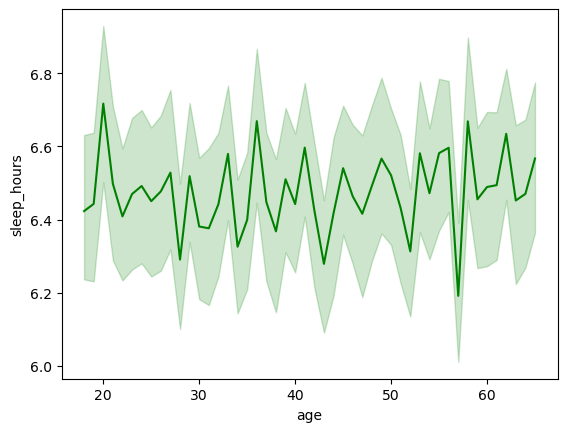

In [59]:

sns.lineplot(data= df, x="age", y="sleep_hours", color="green")

observation:

younger peoples sleeps more and peoples in between 55-60 sleeps less comparatively

<Axes: xlabel='age', ylabel='physical_activity_days'>

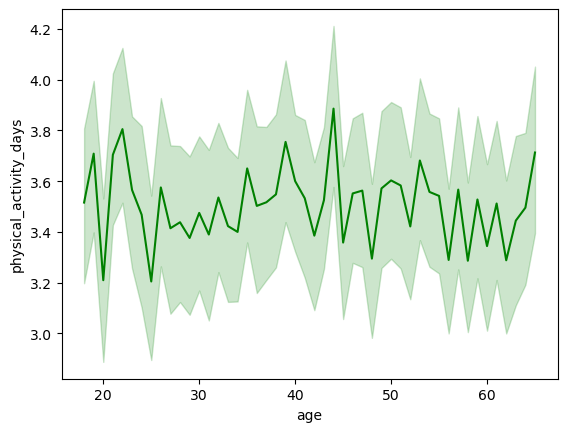

In [60]:

sns.lineplot(data= df, x="age", y="physical_activity_days", color="green")


<Axes: xlabel='stress_level', ylabel='sleep_hours'>

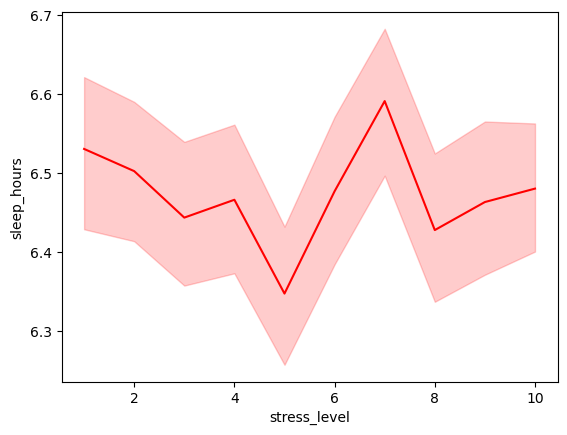

In [61]:

sns.lineplot(data= df, x="stress_level", y="sleep_hours", color="red")


<Axes: xlabel='stress_level', ylabel='physical_activity_days'>

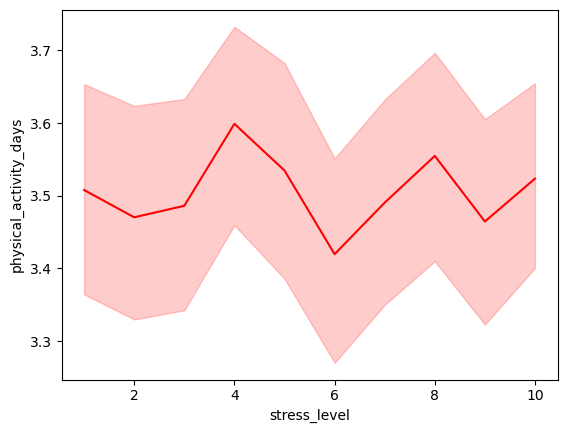

In [62]:
sns.lineplot(data= df, x="stress_level", y="physical_activity_days", color="red")

<Axes: xlabel='stress_level', ylabel='anxiety_score'>

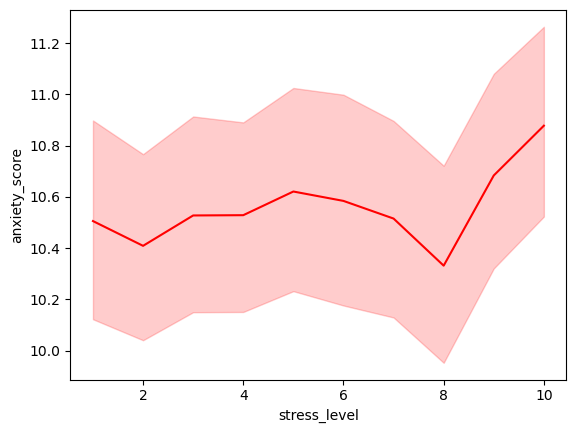

In [63]:
sns.lineplot(data= df, x="stress_level", y="anxiety_score", color="red")

<Axes: xlabel='stress_level', ylabel='productivity_score'>

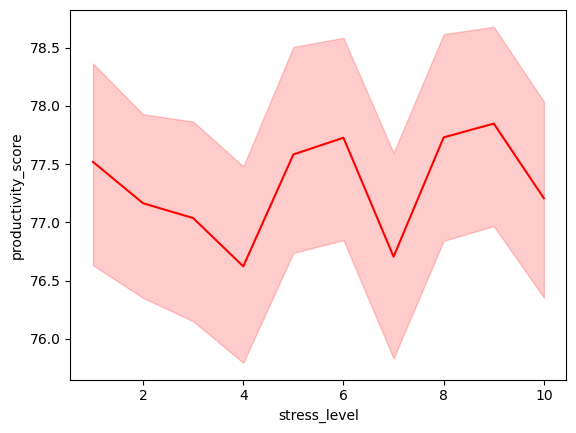

In [64]:
sns.lineplot(data= df, x="stress_level", y="productivity_score", color="red")

<Axes: xlabel='physical_activity_days', ylabel='depression_score'>

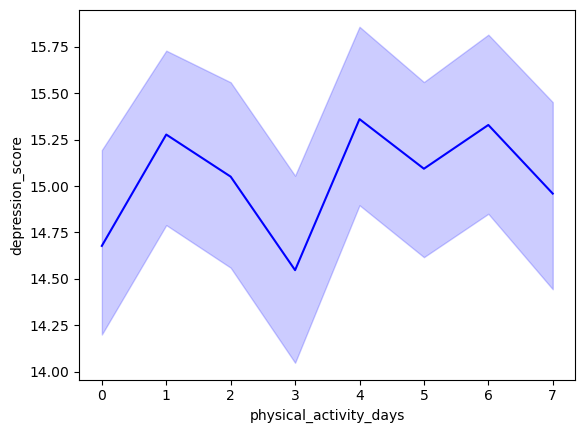

In [65]:
sns.lineplot(data= df, x="physical_activity_days", y="depression_score", color="blue")

<Axes: xlabel='physical_activity_days', ylabel='anxiety_score'>

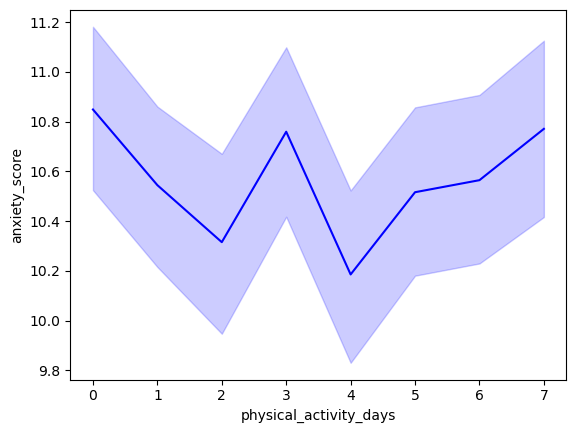

In [66]:
sns.lineplot(data= df, x="physical_activity_days", y="anxiety_score", color="blue")

<Axes: xlabel='physical_activity_days', ylabel='productivity_score'>

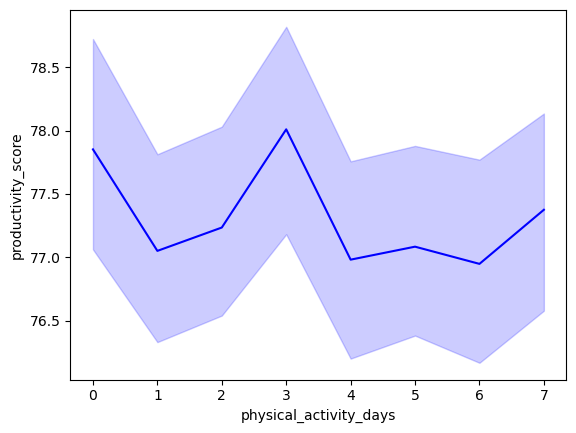

In [67]:
sns.lineplot(data= df, x="physical_activity_days", y="productivity_score", color="blue")

<Axes: xlabel='depression_score', ylabel='productivity_score'>

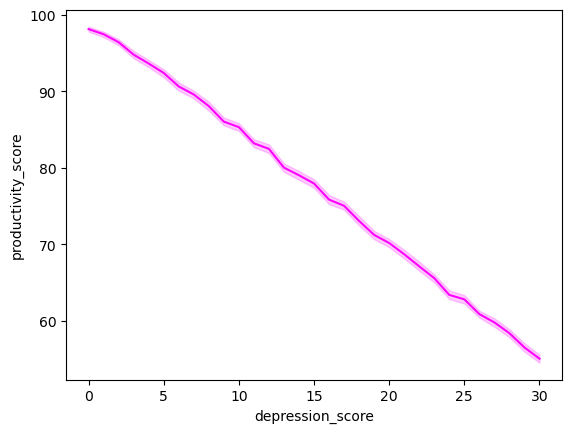

In [68]:
sns.lineplot(data= df, x="depression_score", y="productivity_score", color="magenta")

<Axes: xlabel='anxiety_score', ylabel='social_support_score'>

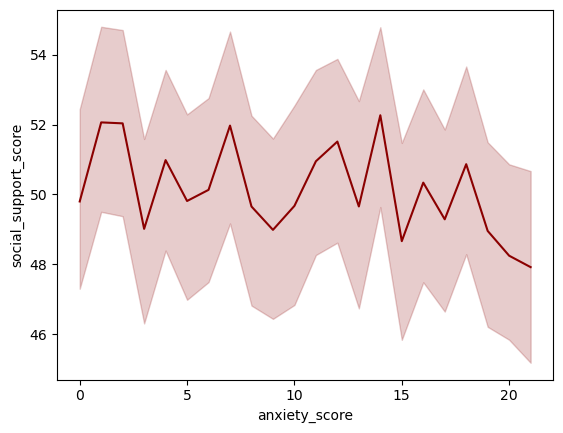

In [69]:
sns.lineplot(data= df, x="anxiety_score", y="social_support_score", color="darkred")

<Axes: xlabel='anxiety_score', ylabel='productivity_score'>

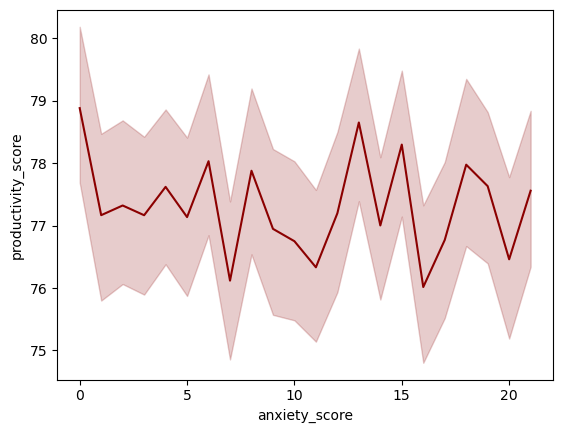

In [70]:
sns.lineplot(data= df, x="anxiety_score", y="productivity_score", color="darkred")


Multivariate Analaysis

Grouped Bar Chart

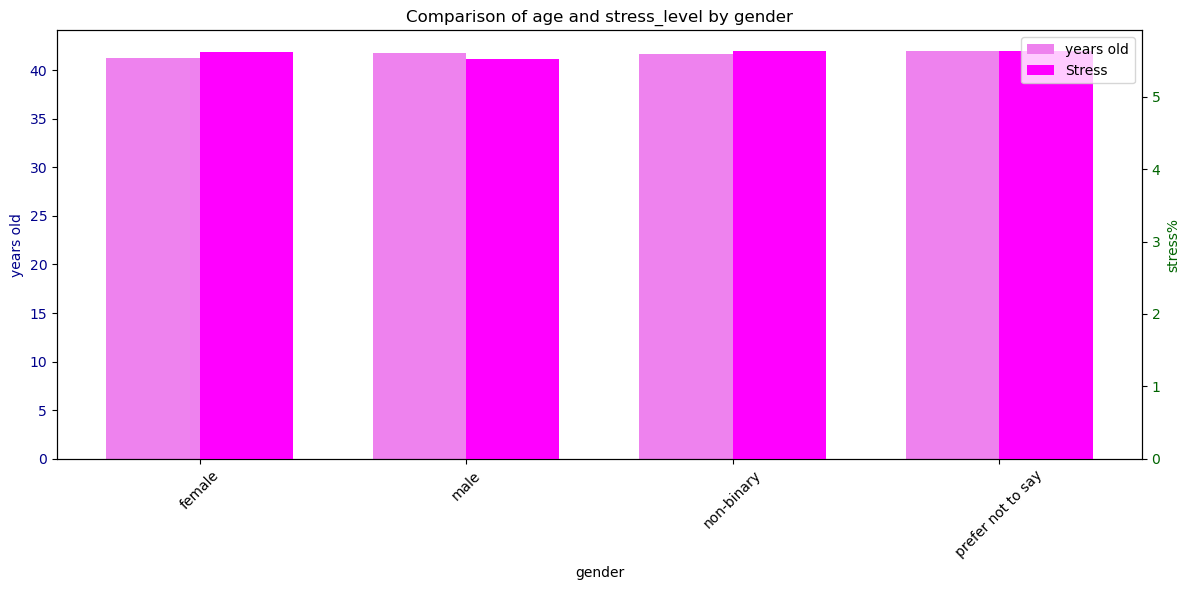

In [71]:
grouped = df.groupby('gender')[['age', 'stress_level']].mean().reset_index()

# Set position of bars on X axis
gender = grouped['gender']
x = np.arange(len(gender))
width = 0.35

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis for Price
bar1 = ax1.bar(x - width/2, grouped['age'], width, label='years old', color='violet')
ax1.set_ylabel('years old', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Secondary axis for ABV%
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, grouped['stress_level'], width, label='Stress', color='magenta')
ax2.set_ylabel('stress%', color='DARKGREEN')
ax2.tick_params(axis='y', labelcolor='DARKGREEN')

# X-axis settings
ax1.set_xlabel('gender')
ax1.set_xticks(x)
ax1.set_xticklabels(gender, rotation=45)

# Title
plt.title('Comparison of age and stress_level by gender')

# Legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


Observation:

we can see percentage of stress level is mostly equal for every gender
for females: stress level is more than other three

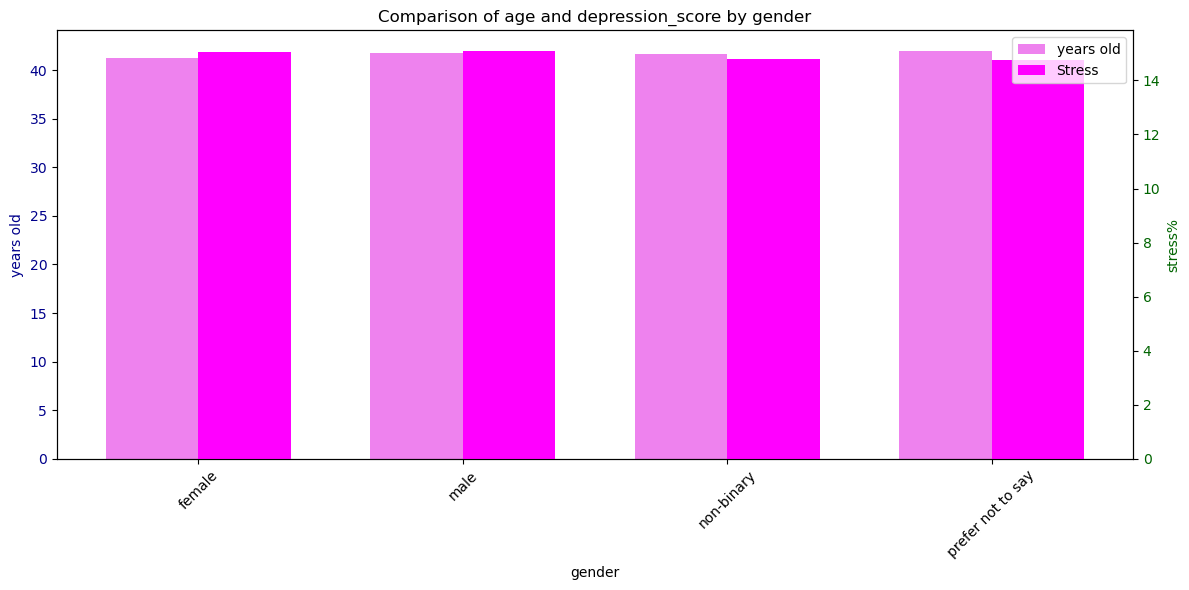

In [72]:
grouped = df.groupby('gender')[['age', 'depression_score']].mean().reset_index()

# Set position of bars on X axis
gender = grouped['gender']
x = np.arange(len(gender))
width = 0.35

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis for Price
bar1 = ax1.bar(x - width/2, grouped['age'], width, label='years old', color='violet')
ax1.set_ylabel('years old', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Secondary axis for ABV%
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, grouped['depression_score'], width, label='Stress', color='magenta')
ax2.set_ylabel('stress%', color='DARKGREEN')
ax2.tick_params(axis='y', labelcolor='DARKGREEN')

# X-axis settings
ax1.set_xlabel('gender')
ax1.set_xticks(x)
ax1.set_xticklabels(gender, rotation=45)

# Title
plt.title('Comparison of age and depression_score by gender')

# Legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()

Observation:

People in all gender groups are roughly the same age — around 41 to 42 years old on average
Depression scores are also very similar for everyone, around 15 on the scale.
This means gender doesn’t seem to make much difference in either age or depression levels in this group.

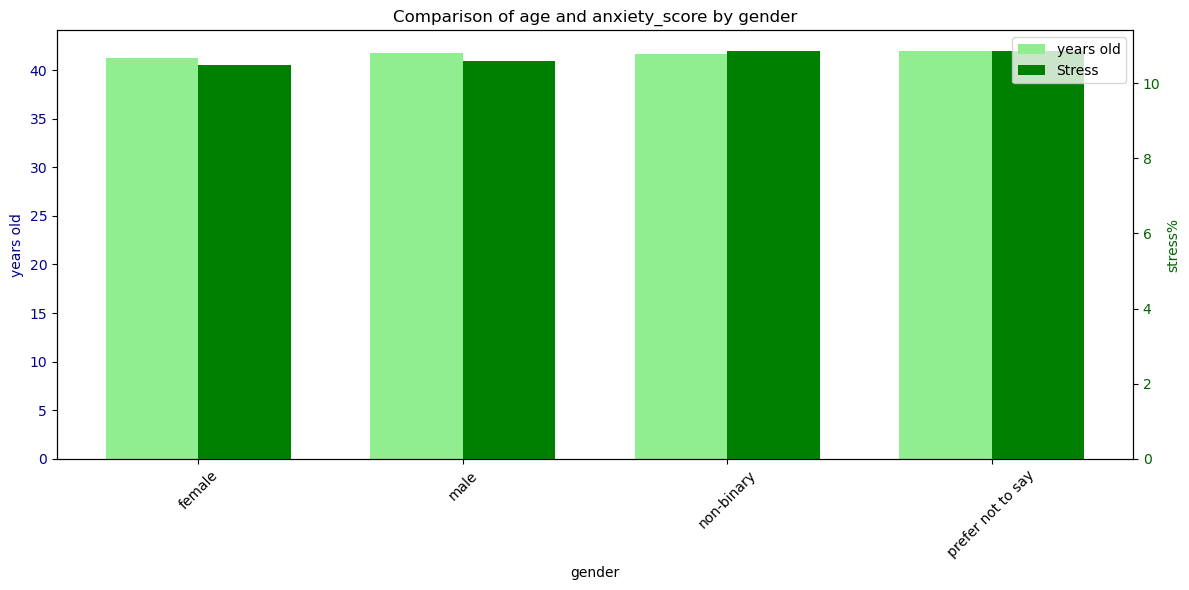

In [73]:
grouped = df.groupby('gender')[['age', 'anxiety_score']].mean().reset_index()

# Set position of bars on X axis
gender = grouped['gender']
x = np.arange(len(gender))
width = 0.35

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis for Price
bar1 = ax1.bar(x - width/2, grouped['age'], width, label='years old', color='lightgreen')
ax1.set_ylabel('years old', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Secondary axis for ABV%
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, grouped['anxiety_score'], width, label='Stress', color='green')
ax2.set_ylabel('stress%', color='DARKGREEN')
ax2.tick_params(axis='y', labelcolor='DARKGREEN')

# X-axis settings
ax1.set_xlabel('gender')
ax1.set_xticks(x)
ax1.set_xticklabels(gender, rotation=45)

# Title
plt.title('Comparison of age and anxiety_score by gender')

# Legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()

Observation:

The average age is almost the same for all gender groups — around 41 to 42 years.
Anxiety scores are also quite similar for everyone, around 10–11 on the scale.
This means gender doesn’t seem to have much impact on either age or anxiety levels.

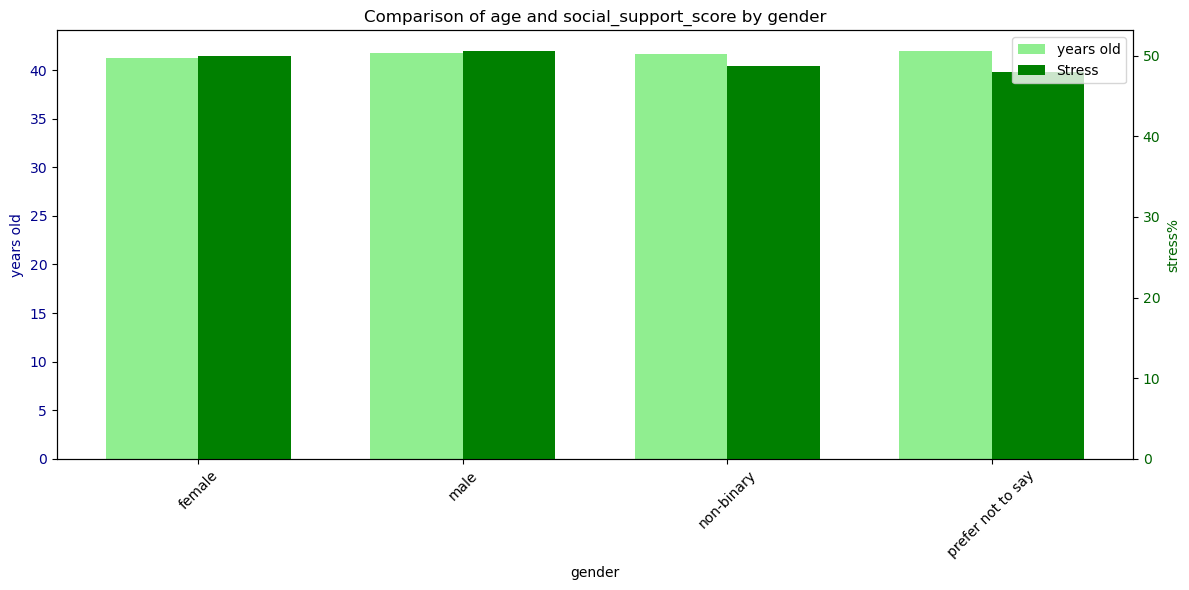

In [74]:
grouped = df.groupby('gender')[['age', 'social_support_score']].mean().reset_index()

# Set position of bars on X axis
gender = grouped['gender']
x = np.arange(len(gender))
width = 0.35

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis for Price
bar1 = ax1.bar(x - width/2, grouped['age'], width, label='years old', color='lightgreen')
ax1.set_ylabel('years old', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Secondary axis for ABV%
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, grouped['social_support_score'], width, label='Stress', color='green')
ax2.set_ylabel('stress%', color='DARKGREEN')
ax2.tick_params(axis='y', labelcolor='DARKGREEN')

# X-axis settings
ax1.set_xlabel('gender')
ax1.set_xticks(x)
ax1.set_xticklabels(gender, rotation=45)

# Title
plt.title('Comparison of age and social_support_score by gender')

# Legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()

Observation:

Social support scores are also fairly similar, ranging roughly between 49 and 50 for most groups, with a slight drop for “prefer not to say

<Axes: xlabel='gender', ylabel='depression_score'>

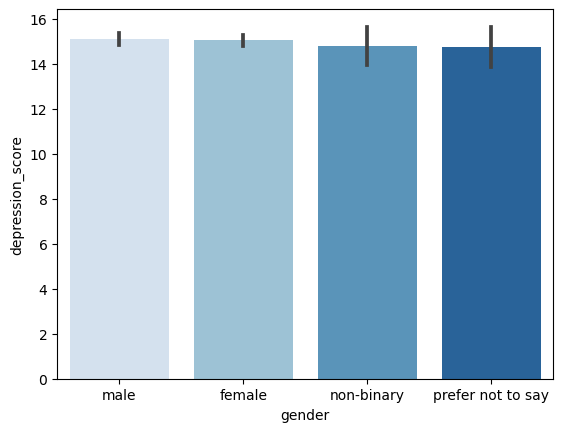

In [75]:
sns.barplot(data=df, x="gender", y="depression_score", palette= "Blues")


Observation:

Depression scores are very close for all gender groups, around 14.7 to 15.1 on average.
This means there’s no big difference in depression levels between genders.

Splitting the Dataset

In [76]:
df.columns

Index(['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score',
       'mental_health_risk'],
      dtype='object')

In [77]:
x= df[['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score']]
y= df["mental_health_risk"]

In [78]:
# split into train and test 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,random_state=100)

In [79]:

x_train.head()

age  gender employment_status work_environment mental_health_history  \
1191   18  female          employed          on-site                   yes   
4458   29    male          employed           remote                   yes   
1131   29    male          employed           hybrid                    no   
9562   32  female          employed          on-site                    no   
6579   33  female     self-employed           remote                    no   

     seeks_treatment  stress_level  sleep_hours  physical_activity_days  \
1191             yes             2          5.8                       1   
4458              no            10          6.7                       6   
1131              no             5          8.2                       7   
9562              no             8          9.4                       1   
6579              no             7          9.0                       3   

      depression_score  anxiety_score  social_support_score  \
1191                 0              6                    73   
4458                19              5                    80   
1131                16             17                    54   
9562                 9             18                     8   
6579                 3              6                    52   

      productivity_score  
1191               100.0  
4458                64.6  
1131                76.2  
9562                84.4  
6579                84.4

In [80]:
y_train.head()

1191       low
4458    medium
1131    medium
9562    medium
6579       low
Name: mental_health_risk, dtype: object

In [81]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(7000, 13) (7000,)
(3000, 13) (3000,)


Feature Scaling and Train the Model

Scaling Numerical Fetures for training data

In [82]:
x_train_num = x_train.select_dtypes(include = [int , float])
x_train_num.head()

age  stress_level  sleep_hours  physical_activity_days  \
1191   18             2          5.8                       1   
4458   29            10          6.7                       6   
1131   29             5          8.2                       7   
9562   32             8          9.4                       1   
6579   33             7          9.0                       3   

      depression_score  anxiety_score  social_support_score  \
1191                 0              6                    73   
4458                19              5                    80   
1131                16             17                    54   
9562                 9             18                     8   
6579                 3              6                    52   

      productivity_score  
1191               100.0  
4458                64.6  
1131                76.2  
9562                84.4  
6579                84.4

Applyingn Standard Scaler

In [83]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_num_rescaled = pd.DataFrame(scalar.fit_transform(x_train_num) , 
                                    columns = x_train_num.columns , 
                                    index = x_train_num.index)

x_train_num_rescaled.head()

age  stress_level  sleep_hours  physical_activity_days  \
1191 -1.713299     -1.245444    -0.455139               -1.094260   
4458 -0.914858      1.523308     0.155149                1.081578   
1131 -0.914858     -0.207162     1.172294                1.516745   
9562 -0.697101      0.831120     1.986011               -1.094260   
6579 -0.624516      0.485026     1.714772               -0.223925   

      depression_score  anxiety_score  social_support_score  \
1191         -1.672206      -0.723938              0.771573   
4458          0.441091      -0.882240              1.010057   
1131          0.107413       1.017385              0.124260   
9562         -0.671170       1.175687             -1.442920   
6579         -1.338527      -0.723938              0.056122   

      productivity_score  
1191            1.614207  
4458           -0.903363  
1131           -0.078396  
9562            0.504770  
6579            0.504770

In [84]:

x_train_num_rescaled.describe()

age  stress_level   sleep_hours  physical_activity_days  \
count  7.000000e+03  7.000000e+03  7.000000e+03            7.000000e+03   
mean  -1.086115e-16 -6.699403e-17  8.628019e-16           -6.090366e-17   
std    1.000071e+00  1.000071e+00  1.000071e+00            1.000071e+00   
min   -1.713299e+00 -1.591538e+00 -2.353810e+00           -1.529428e+00   
25%   -8.422724e-01 -8.993498e-01 -6.585678e-01           -1.094260e+00   
50%    2.875425e-02  1.389320e-01  1.952919e-02            2.112428e-01   
75%    8.271953e-01  8.311198e-01  6.976262e-01            1.081578e+00   
max    1.698222e+00  1.523308e+00  2.392869e+00            1.516745e+00   

       depression_score  anxiety_score  social_support_score  \
count      7.000000e+03   7.000000e+03          7.000000e+03   
mean       7.917476e-17   4.466269e-17          2.131628e-17   
std        1.000071e+00   1.000071e+00          1.000071e+00   
min       -1.672206e+00  -1.673751e+00         -1.715473e+00   
25%       -8.936226e-01  -8.822402e-01         -8.637448e-01   
50%       -3.813468e-03   6.757238e-02         -1.201667e-02   
75%        8.859957e-01   8.590829e-01          8.737806e-01   
max        1.664579e+00   1.650593e+00          1.691440e+00   

       productivity_score  
count        7.000000e+03  
mean        -2.801569e-16  
std          1.000071e+00  
min         -2.453731e+00  
25%         -8.180213e-01  
50%          2.828050e-02  
75%          8.461352e-01  
max          1.614207e+00

In [85]:
print('Number of Numerical Features:' , scalar.n_features_in_)
print('Mean of each column:' , scalar.mean_)
print('Std of each column:' , np.sqrt(scalar.var_))

Number of Numerical Features: 8
Mean of each column: [41.60385714  5.59857143  6.4712      3.51457143 15.03428571 10.57314286
 50.35271429 77.30234286]
Std of each column: [13.7768465   2.8893891   1.47471517  2.29796536  8.99069179  6.31703537
 29.3520896  14.06117817]


Scaling Categorical Features for training data

In [86]:
x_train_cat = x_train.select_dtypes(include = ['object'])
x_train_cat.head()

gender employment_status work_environment mental_health_history  \
1191  female          employed          on-site                   yes   
4458    male          employed           remote                   yes   
1131    male          employed           hybrid                    no   
9562  female          employed          on-site                    no   
6579  female     self-employed           remote                    no   

     seeks_treatment  
1191             yes  
4458              no  
1131              no  
9562              no  
6579              no


Applying OneHotEncoding

In [88]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output = False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(x_train_cat) , 
                               columns = encoder_.get_feature_names_out(x_train_cat.columns) , 
                               index = x_train_cat.index)

X_train_cat_ohe.head()

gender_female  gender_male  gender_non-binary  gender_prefer not to say  \
1191            1.0          0.0                0.0                       0.0   
4458            0.0          1.0                0.0                       0.0   
1131            0.0          1.0                0.0                       0.0   
9562            1.0          0.0                0.0                       0.0   
6579            1.0          0.0                0.0                       0.0   

      employment_status_employed  employment_status_self-employed  \
1191                         1.0                              0.0   
4458                         1.0                              0.0   
1131                         1.0                              0.0   
9562                         1.0                              0.0   
6579                         0.0                              1.0   

      employment_status_student  employment_status_unemployed  \
1191                        0.0                           0.0   
4458                        0.0                           0.0   
1131                        0.0                           0.0   
9562                        0.0                           0.0   
6579                        0.0                           0.0   

      work_environment_hybrid  work_environment_on-site  \
1191                      0.0                       1.0   
4458                      0.0                       0.0   
1131                      1.0                       0.0   
9562                      0.0                       1.0   
6579                      0.0                       0.0   

      work_environment_remote  mental_health_history_no  \
1191                      0.0                       0.0   
4458                      1.0                       0.0   
1131                      0.0                       1.0   
9562                      0.0                       1.0   
6579                      1.0                       1.0   

      mental_health_history_yes  seeks_treatment_no  seeks_treatment_yes  
1191                        1.0                 0.0                  1.0  
4458                        1.0                 1.0                  0.0  
1131                        0.0                 1.0                  0.0  
9562                        0.0                 1.0                  0.0  
6579                        0.0                 1.0                  0.0

In [89]:

encoder_.categories_

[array(['female', 'male', 'non-binary', 'prefer not to say'], dtype=object),
 array(['employed', 'self-employed', 'student', 'unemployed'], dtype=object),
 array(['hybrid', 'on-site', 'remote'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

Concatinating the Encoded Categorical Features and Rescaled Numerical Features (Train Data)

In [90]:
x_train_transformed = pd.concat([x_train_num_rescaled , X_train_cat_ohe] , axis = 1)

x_train_transformed.head()

age  stress_level  sleep_hours  physical_activity_days  \
1191 -1.713299     -1.245444    -0.455139               -1.094260   
4458 -0.914858      1.523308     0.155149                1.081578   
1131 -0.914858     -0.207162     1.172294                1.516745   
9562 -0.697101      0.831120     1.986011               -1.094260   
6579 -0.624516      0.485026     1.714772               -0.223925   

      depression_score  anxiety_score  social_support_score  \
1191         -1.672206      -0.723938              0.771573   
4458          0.441091      -0.882240              1.010057   
1131          0.107413       1.017385              0.124260   
9562         -0.671170       1.175687             -1.442920   
6579         -1.338527      -0.723938              0.056122   

      productivity_score  gender_female  gender_male  ...  \
1191            1.614207            1.0          0.0  ...   
4458           -0.903363            0.0          1.0  ...   
1131           -0.078396            0.0          1.0  ...   
9562            0.504770            1.0          0.0  ...   
6579            0.504770            1.0          0.0  ...   

      employment_status_self-employed  employment_status_student  \
1191                              0.0                        0.0   
4458                              0.0                        0.0   
1131                              0.0                        0.0   
9562                              0.0                        0.0   
6579                              1.0                        0.0   

      employment_status_unemployed  work_environment_hybrid  \
1191                           0.0                      0.0   
4458                           0.0                      0.0   
1131                           0.0                      1.0   
9562                           0.0                      0.0   
6579                           0.0                      0.0   

      work_environment_on-site  work_environment_remote  \
1191                       1.0                      0.0   
4458                       0.0                      1.0   
1131                       0.0                      0.0   
9562                       1.0                      0.0   
6579                       0.0                      1.0   

      mental_health_history_no  mental_health_history_yes  seeks_treatment_no  \
1191                       0.0                        1.0                 0.0   
4458                       0.0                        1.0                 1.0   
1131                       1.0                        0.0                 1.0   
9562                       1.0                        0.0                 1.0   
6579                       1.0                        0.0                 1.0   

      seeks_treatment_yes  
1191                  1.0  
4458                  0.0  
1131                  0.0  
9562                  0.0  
6579                  0.0  

[5 rows x 23 columns]


Preparing Test Data

In [91]:
x_test.head()

age  gender employment_status work_environment mental_health_history  \
8018   25    male          employed          on-site                    no   
9225   64    male          employed           hybrid                    no   
3854   25  female        unemployed           remote                    no   
2029   37    male        unemployed          on-site                    no   
3539   61  female     self-employed           hybrid                   yes   

     seeks_treatment  stress_level  sleep_hours  physical_activity_days  \
8018             yes             3          4.7                       2   
9225             yes             9          4.5                       3   
3854             yes             5          4.3                       4   
2029             yes             6          7.4                       2   
3539              no             2          9.1                       4   

      depression_score  anxiety_score  social_support_score  \
8018                16             19                     0   
9225                29             14                    41   
3854                 7              3                    38   
2029                24              9                    38   
3539                16             10                    33   

      productivity_score  
8018                83.3  
9225                55.7  
3854                86.3  
2029                58.7  
3539                78.8

In [92]:
y_test.head()

8018      high
9225      high
3854       low
2029    medium
3539    medium
Name: mental_health_risk, dtype: object


Scaling Numerical Features for test data

In [93]:
x_test_num = x_test.select_dtypes(include = [int , float])

x_test_num.head()

age  stress_level  sleep_hours  physical_activity_days  \
8018   25             3          4.7                       2   
9225   64             9          4.5                       3   
3854   25             5          4.3                       4   
2029   37             6          7.4                       2   
3539   61             2          9.1                       4   

      depression_score  anxiety_score  social_support_score  \
8018                16             19                     0   
9225                29             14                    41   
3854                 7              3                    38   
2029                24              9                    38   
3539                16             10                    33   

      productivity_score  
8018                83.3  
9225                55.7  
3854                86.3  
2029                58.7  
3539                78.8


Applying Standard Scalar

In [94]:
x_test_num_rescaled = pd.DataFrame(scalar.transform(x_test_num) , 
                                   columns = x_test_num.columns , 
                                   index = x_test_num.index)

x_train_num_rescaled.head()

age  stress_level  sleep_hours  physical_activity_days  \
1191 -1.713299     -1.245444    -0.455139               -1.094260   
4458 -0.914858      1.523308     0.155149                1.081578   
1131 -0.914858     -0.207162     1.172294                1.516745   
9562 -0.697101      0.831120     1.986011               -1.094260   
6579 -0.624516      0.485026     1.714772               -0.223925   

      depression_score  anxiety_score  social_support_score  \
1191         -1.672206      -0.723938              0.771573   
4458          0.441091      -0.882240              1.010057   
1131          0.107413       1.017385              0.124260   
9562         -0.671170       1.175687             -1.442920   
6579         -1.338527      -0.723938              0.056122   

      productivity_score  
1191            1.614207  
4458           -0.903363  
1131           -0.078396  
9562            0.504770  
6579            0.504770

Scaling Categorical Features for test data

In [95]:
x_test_cat = x_test.select_dtypes(include = ['object'])
x_test_cat.head()

gender employment_status work_environment mental_health_history  \
8018    male          employed          on-site                    no   
9225    male          employed           hybrid                    no   
3854  female        unemployed           remote                    no   
2029    male        unemployed          on-site                    no   
3539  female     self-employed           hybrid                   yes   

     seeks_treatment  
8018             yes  
9225             yes  
3854             yes  
2029             yes  
3539              no

In [96]:

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output = False)
encoder_.fit(x_train_cat)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

x_test_cat_ohe = pd.DataFrame(encoder_.transform(x_test_cat) , 
                               columns = encoder_.get_feature_names_out(x_test_cat.columns) , 
                               index = x_test_cat.index)

x_test_cat_ohe.head()

gender_female  gender_male  gender_non-binary  gender_prefer not to say  \
8018            0.0          1.0                0.0                       0.0   
9225            0.0          1.0                0.0                       0.0   
3854            1.0          0.0                0.0                       0.0   
2029            0.0          1.0                0.0                       0.0   
3539            1.0          0.0                0.0                       0.0   

      employment_status_employed  employment_status_self-employed  \
8018                         1.0                              0.0   
9225                         1.0                              0.0   
3854                         0.0                              0.0   
2029                         0.0                              0.0   
3539                         0.0                              1.0   

      employment_status_student  employment_status_unemployed  \
8018                        0.0                           0.0   
9225                        0.0                           0.0   
3854                        0.0                           1.0   
2029                        0.0                           1.0   
3539                        0.0                           0.0   

      work_environment_hybrid  work_environment_on-site  \
8018                      0.0                       1.0   
9225                      1.0                       0.0   
3854                      0.0                       0.0   
2029                      0.0                       1.0   
3539                      1.0                       0.0   

      work_environment_remote  mental_health_history_no  \
8018                      0.0                       1.0   
9225                      0.0                       1.0   
3854                      1.0                       1.0   
2029                      0.0                       1.0   
3539                      0.0                       0.0   

      mental_health_history_yes  seeks_treatment_no  seeks_treatment_yes  
8018                        0.0                 0.0                  1.0  
9225                        0.0                 0.0                  1.0  
3854                        0.0                 0.0                  1.0  
2029                        0.0                 0.0                  1.0  
3539                        1.0                 1.0                  0.0

Concatinating the Encoded Categorical Features and Rescaled Numerical Features(Test Data)

In [97]:
x_test_transformed = pd.concat([x_test_num_rescaled , x_test_cat_ohe] , axis = 1)

x_test_transformed.head()

age  stress_level  sleep_hours  physical_activity_days  \
8018 -1.205200     -0.899350    -1.201045               -0.659092   
9225  1.625636      1.177214    -1.336665               -0.223925   
3854 -1.205200     -0.207162    -1.472284                0.211243   
2029 -0.334174      0.138932     0.629817               -0.659092   
3539  1.407880     -1.245444     1.782582                0.211243   

      depression_score  anxiety_score  social_support_score  \
8018          0.107413       1.333989             -1.715473   
9225          1.553353       0.542479             -0.318639   
3854         -0.893623      -1.198844             -0.420846   
2029          0.997222      -0.249032             -0.420846   
3539          0.107413      -0.090730             -0.591192   

      productivity_score  gender_female  gender_male  ...  \
8018            0.426540            0.0          1.0  ...   
9225           -1.536311            0.0          1.0  ...   
3854            0.639894            1.0          0.0  ...   
2029           -1.322958            0.0          1.0  ...   
3539            0.106510            1.0          0.0  ...   

      employment_status_self-employed  employment_status_student  \
8018                              0.0                        0.0   
9225                              0.0                        0.0   
3854                              0.0                        0.0   
2029                              0.0                        0.0   
3539                              1.0                        0.0   

      employment_status_unemployed  work_environment_hybrid  \
8018                           0.0                      0.0   
9225                           0.0                      1.0   
3854                           1.0                      0.0   
2029                           1.0                      0.0   
3539                           0.0                      1.0   

      work_environment_on-site  work_environment_remote  \
8018                       1.0                      0.0   
9225                       0.0                      0.0   
3854                       0.0                      1.0   
2029                       1.0                      0.0   
3539                       0.0                      0.0   

      mental_health_history_no  mental_health_history_yes  seeks_treatment_no  \
8018                       1.0                        0.0                 0.0   
9225                       1.0                        0.0                 0.0   
3854                       1.0                        0.0                 0.0   
2029                       1.0                        0.0                 0.0   
3539                       0.0                        1.0                 1.0   

      seeks_treatment_yes  
8018                  1.0  
9225                  1.0  
3854                  1.0  
2029                  1.0  
3539                  0.0  

[5 rows x 23 columns]

Make Prediction


KNN Classifier

In [98]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train_transformed , y_train)

KNeighborsClassifier()

In [99]:
y_test_pred = classifier.predict(x_test_transformed)
temp_df = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_test_pred})

temp_df

Actual Predicted
8018    high    medium
9225    high      high
3854     low       low
2029  medium      high
3539  medium    medium
...      ...       ...
4208  medium    medium
5335    high      high
2554    high      high
13       low       low
4468  medium    medium

[3000 rows x 2 columns]

<Axes: xlabel='mental_health_risk', ylabel='Count'>

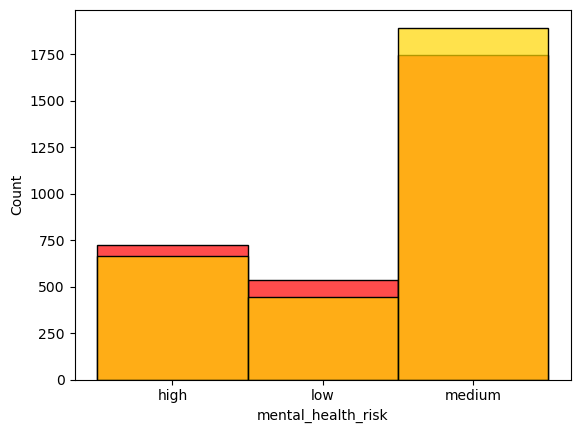

In [100]:
sns.histplot(y_test , color = 'red' , alpha = 0.7)
sns.histplot(y_test_pred , color = 'gold' , alpha = 0.7)